###IMPORTAMOS LIBRERIAS Y PREPARAMOS EL ENTORNO

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

#from google.colab import files 

plt.style.use('ggplot')

In [2]:
import random
import json
from pandas.io.json import json_normalize
from scipy import stats
from datetime import datetime
from sklearn import model_selection

#gradient boosting 

import xgboost as xgb
pd.set_option('display.float_format','{:.3f}'.format) 

In [3]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [4]:
### Exploracion de columnas
def explore_columns(df, column):
    print(f"Value_counts:\n{df[column].value_counts().sum()}")
    print(f"Unique elements:\n{df[column].nunique()}")
    print(f"Total nulls:\n{df[column].isnull().sum()}")
    print(f"Column info:\n{df[column].describe()}")

In [5]:
### eje: explore_columns(df,"LocaleEnglishNameIdentifier")

###IMPORTAMOS DATOS

In [6]:

#from google.colab import files
#uploaded = files.upload()

In [7]:
file_dir = '/content/gdrive/MyDrive/datasets/'
file_name = 'sample_mmp.csv'

In [8]:
df = pd.read_csv("C:/Users/Admin/Desktop/sample_mmp.csv", low_memory=False)

In [9]:
random.seed(10) #siempre cargamos misma particion aleatoria
p= 1 #cogemos el 100p % del dataset, por si la máquina se ahoga, trabajar con algo más pequeño

def read(df):

 
  data_frame = file_dir + df
  #read csv con una proporcion p
  df = pd.read_csv(data_frame,
                   #converters = {column: json.loads for column in columns},
                   #dtype = {'fullVisitorId': 'str'},
                   skiprows = lambda i: i> 0 and random.random( ) > p
      
  )

  # desjesonizando las columnas
  #for column in columns:

    #column_as_df = json_normalize(df[column])
    #column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
    #df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

  #print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")

  return df 

In [10]:
#columns = ['']

In [11]:
#%%time
#df = read(file_name)

In [12]:
df[df.duplicated(keep=False)]

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections


###### Aunque no hay duplicados, aplicamos código por si al concatenar más datasets con más observaciones o si empezamos con una parte del dataset y después ampliar la proporción, aparecen duplicados

In [13]:
df=df.drop_duplicates().copy()
df.reset_index(drop=True, inplace=True)

##DATA UNDERSTANDING

###TAMAÑO

In [14]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 84 entries, Unnamed: 0 to HasDetections
dtypes: float64(36), int64(18), object(30)
memory usage: 320.4+ MB


###VISUALIZAR DATOS

In [15]:
#pd.set_option('max_rows', 84)
pd.options.display.max_rows = 100

In [16]:
df.head().T

,0,1,2,3,4
Unnamed: 0,8427007,8829090,2731904,1359513,236059
MachineIdentifier,f1cd864e97bae82bdf96523e1a539121,fd5ba6f5b75325ec0423a6c67cc75942,4e628391e7cc7c482fb3286f486dbd25,270a2e9d028144a4df12a9e3da79fba5,06ca8fa8d32c2abdc5b3577d676b3269
ProductName,win8defender,win8defender,win8defender,win8defender,win8defender
EngineVersion,1.1.15100.1,1.1.15100.1,1.1.15100.1,1.1.15200.1,1.1.15200.1
AppVersion,4.18.1807.18075,4.18.1807.18075,4.9.10586.1106,4.18.1807.18075,4.18.1807.18075
AvSigVersion,1.273.1234.0,1.273.1282.0,1.273.781.0,1.275.1639.0,1.275.511.0
IsBeta,0,0,0,0,0
RtpStateBitfield,7.000,7.000,7.000,7.000,7.000
IsSxsPassiveMode,0,0,0,0,0
DefaultBrowsersIdentifier,NaN,NaN,NaN,NaN,NaN


In [17]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [18]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  500000 non-null  object 
 1   ProductName                                        500000 non-null  object 
 2   EngineVersion                                      500000 non-null  object 
 3   AppVersion                                         500000 non-null  object 
 4   AvSigVersion                                       500000 non-null  object 
 5   IsBeta                                             500000 non-null  int64  
 6   RtpStateBitfield                                   498168 non-null  float64
 7   IsSxsPassiveMode                                   500000 non-null  int64  
 8   DefaultBrowsersIdentifier                          24061 non-null   float6

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,500000.000,0.000,0.001,0.000,0.000,0.000,0.000,1.000
RtpStateBitfield,498168.000,6.846,1.023,0.000,7.000,7.000,7.000,35.000
IsSxsPassiveMode,500000.000,0.017,0.130,0.000,0.000,0.000,0.000,1.000
DefaultBrowsersIdentifier,24061.000,1652.825,1004.754,1.000,788.000,1632.000,2381.000,3209.000
AVProductStatesIdentifier,498062.000,47850.908,14023.085,3.000,49480.000,53447.000,53447.000,70492.000
AVProductsInstalled,498062.000,1.327,0.523,1.000,1.000,1.000,2.000,5.000
AVProductsEnabled,498062.000,1.021,0.167,0.000,1.000,1.000,1.000,4.000
HasTpm,500000.000,0.988,0.110,0.000,1.000,1.000,1.000,1.000
CountryIdentifier,500000.000,108.037,63.069,1.000,51.000,97.000,162.000,222.000
CityIdentifier,481760.000,81271.646,48985.130,7.000,36825.000,82373.000,123939.500,167958.000


In [20]:
df.describe(exclude=np.number).T

,count,unique,top,freq
MachineIdentifier,500000,500000,f1cd864e97bae82bdf96523e1a539121,1
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
Platform,500000,4,windows10,483048
Processor,500000,3,x64,454423
OsVer,500000,21,10.0.0.0,483830
OsPlatformSubRelease,500000,9,rs4,220779
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436


In [21]:
df['MachineIdentifier'].nunique()

500000

##### Detectamos que MachineIdentifier tiene tantas etiquetas como observaciones porque es irrelevante para el modelo, drop

Algunas variables numéricas son en realidad categóricas, ya que son identificadores y por tanto no ordenables (País, Idioma, CIudad...)

Hay varias variabes con nulos que hay que trabajar y varias con un exceso de etiquetas que habrá que ver si la varianza es relevante o no y reducirlas

El target es HasDetections y:

    - No tiene nulos
    - La media es 50% -> la mitad de las máquinas se infectan

In [22]:
df.drop('MachineIdentifier', axis = 1, inplace = True)

###ANALISIS DEL TARGET

In [23]:
TARGET = 'HasDetections'

In [24]:
df['HasDetections'].nunique()

2

In [25]:
df['HasDetections'].value_counts()

0    250047
1    249953
Name: HasDetections, dtype: int64

In [26]:
df[TARGET].value_counts(normalize=True)

0   0.500
1   0.500
Name: HasDetections, dtype: float64

In [27]:
df[TARGET].mean()

0.499906

<AxesSubplot: >

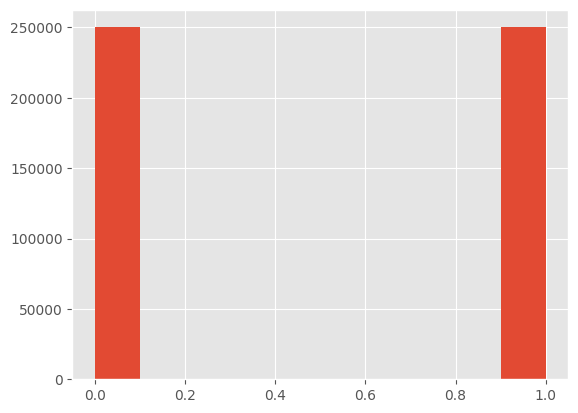

In [28]:
df[TARGET].hist()

El target es HasDetections y:

    - No tiene nulos
    - La media es 50% -> la mitad de las máquinas se infectan

In [29]:
df3=df.copy()

## ANALISIS DE VARIABLES, TIPOS, DESCRIPTIVOS Y NULOS


El data engineer (Microsoft) nos proporciona un listado de qué es cada variable para que lo entendamos mejor (Kaggle) y nos indica que ciertas variables son "Unavailable or self-documenting" y que están "marked with an "NA". Estas variables las eliminamos mediante .drop

In [30]:
na=['RtpStateBitfield','IsSxsPassiveMode','AVProductsInstalled','AVProductsEnabled','IeVerIdentifier','Census_OEMNameIdentifier','Census_OEMModelIdentifier',
    'Census_ProcessorManufacturerIdentifier','Census_ProcessorModelIdentifier','Census_InternalBatteryType','Census_InternalBatteryNumberOfCharges','Census_OSInstallLanguageIdentifier',
    'Census_OSUILocaleIdentifier','Census_IsFlightingInternal','Census_ThresholdOptIn','Census_FirmwareManufacturerIdentifier','Census_FirmwareVersionIdentifier','Census_IsWIMBootEnabled','Wdft_RegionIdentifier']

In [31]:
df3.drop(na, axis = 1, inplace = True)

###DETECCION Y ELIMINACION PRELIMINAR DE VARIABLES IRRELEVANTES CON NULA O CUASI NULA VARIANZA

In [32]:
df3.describe(exclude = np.number).T

,count,unique,top,freq
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
Platform,500000,4,windows10,483048
Processor,500000,3,x64,454423
OsVer,500000,21,10.0.0.0,483830
OsPlatformSubRelease,500000,9,rs4,220779
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436
SkuEdition,500000,8,Home,308567


#### Hay dos casos que llaman la atención en las categóricas. PuaMode parece un *booleano* "camuflado" pero con una proporción del 0,2/1000 por tanto irrelevante. CensusProcessorClass tiene tres valores posibles pero estos se reparten el 0,4% siendo el resto Nulos. Estas dos variables, son candidatas a ser eliminadas por varianza casi nula e irrelevante.

In [33]:
categoricas_sin_varianza = ['PuaMode','Census_ProcessorClass']

In [34]:
df3.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
IsBeta,500000.000,0.000,0.001,0.000,0.000,0.000,0.000,1.000
DefaultBrowsersIdentifier,24061.000,1652.825,1004.754,1.000,788.000,1632.000,2381.000,3209.000
AVProductStatesIdentifier,498062.000,47850.908,14023.085,3.000,49480.000,53447.000,53447.000,70492.000
HasTpm,500000.000,0.988,0.110,0.000,1.000,1.000,1.000,1.000
CountryIdentifier,500000.000,108.037,63.069,1.000,51.000,97.000,162.000,222.000
CityIdentifier,481760.000,81271.646,48985.130,7.000,36825.000,82373.000,123939.500,167958.000
OrganizationIdentifier,345437.000,24.870,5.614,1.000,18.000,27.000,27.000,52.000
GeoNameIdentifier,499984.000,169.730,89.325,1.000,89.000,181.000,267.000,296.000
LocaleEnglishNameIdentifier,500000.000,122.611,69.303,1.000,74.000,88.000,182.000,283.000
OsBuild,500000.000,15726.934,2188.646,7600.000,15063.000,16299.000,17134.000,18242.000


e:\Python\Lib\site-packages\pandas\plotting\_matplotlib\tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


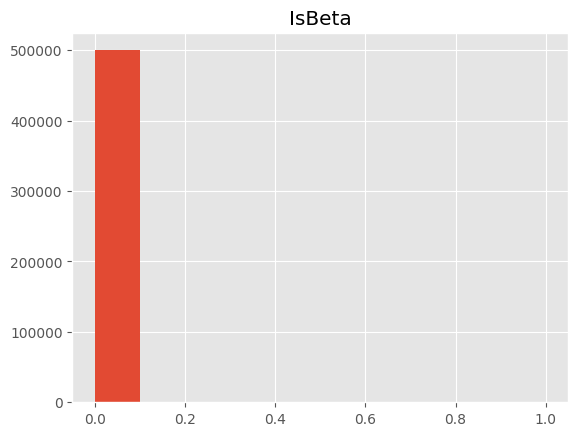

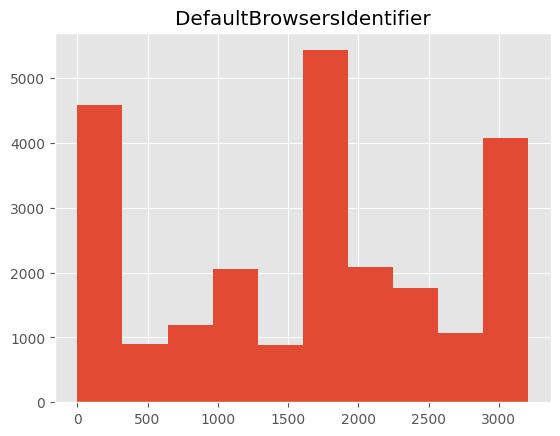

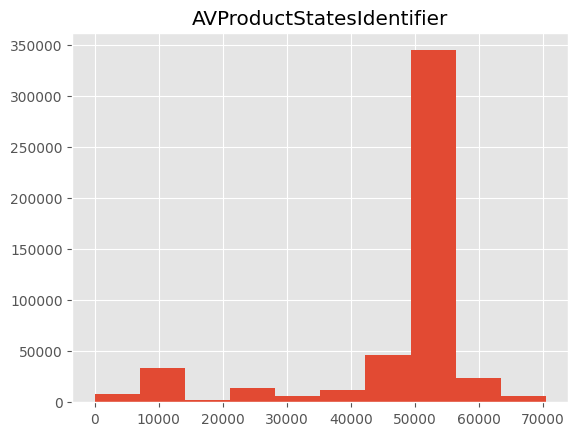

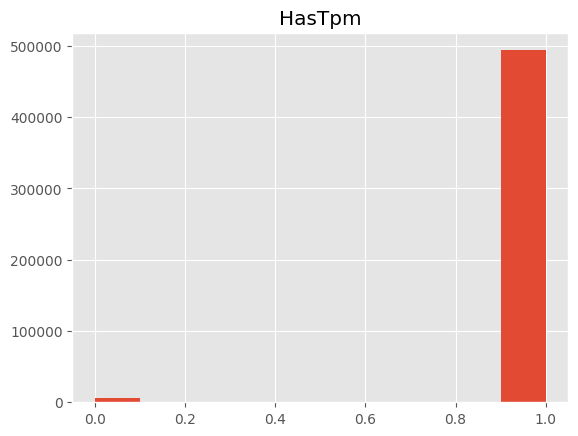

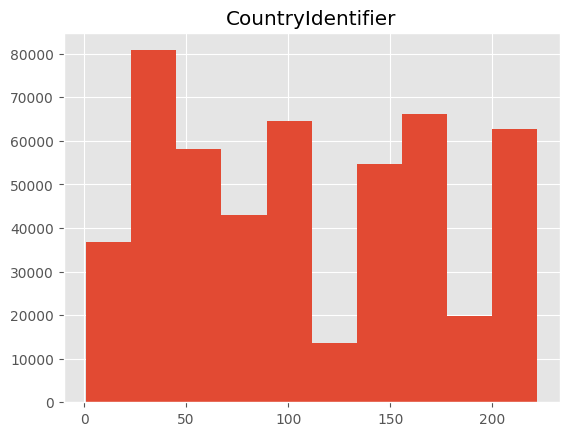

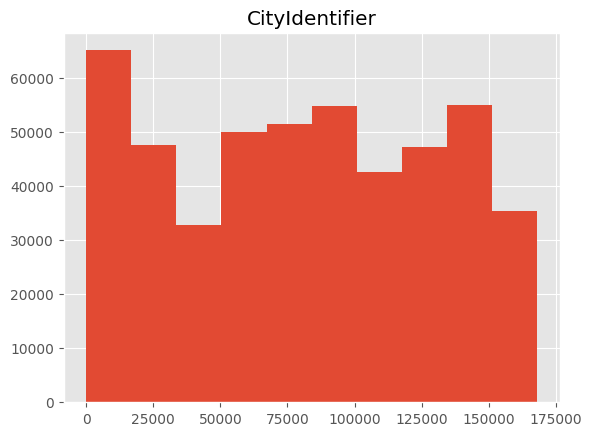

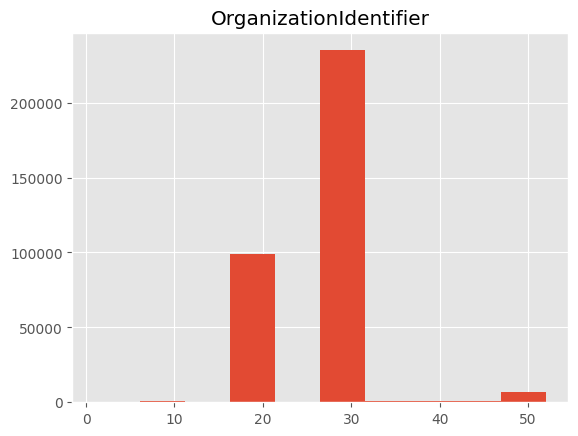

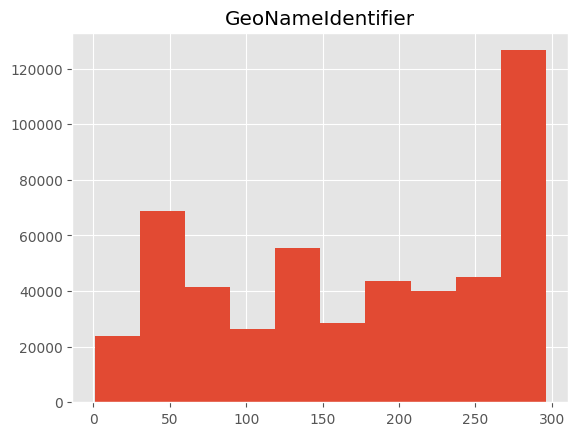

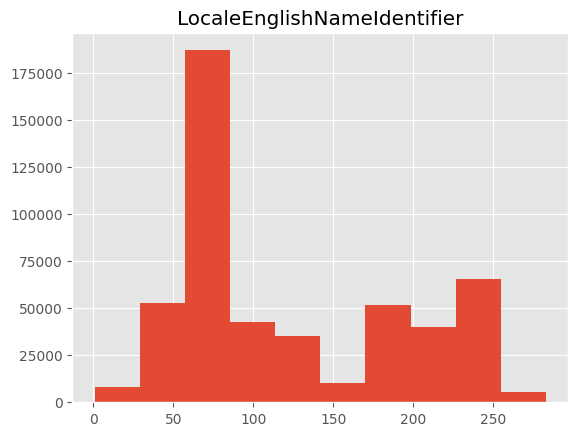

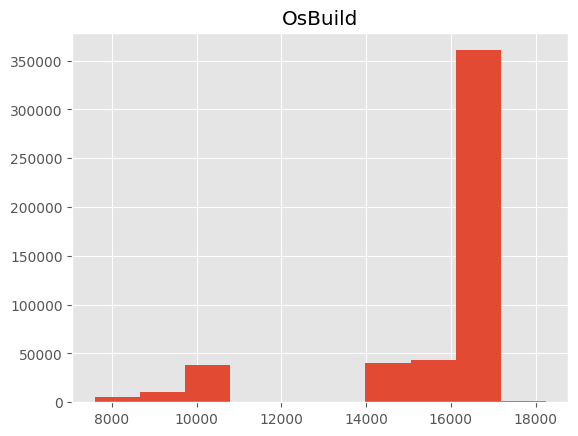

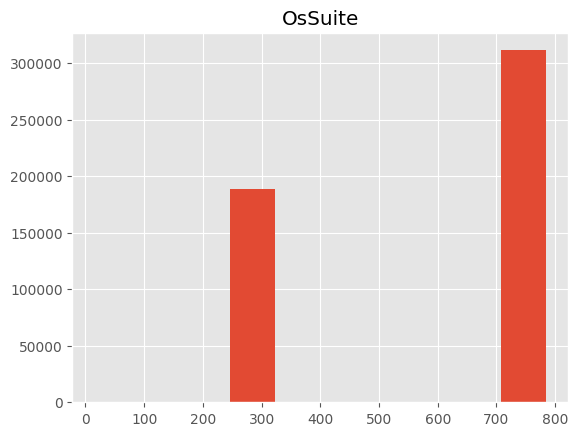

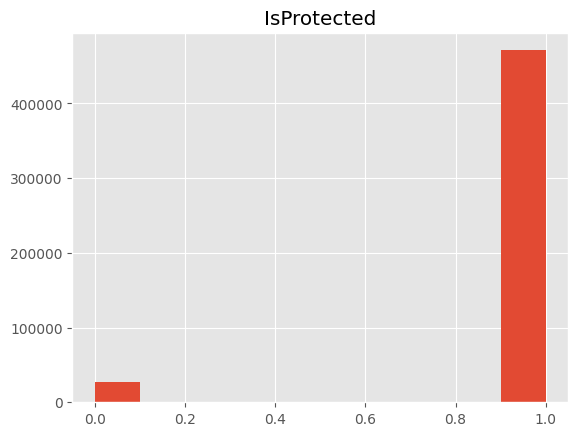

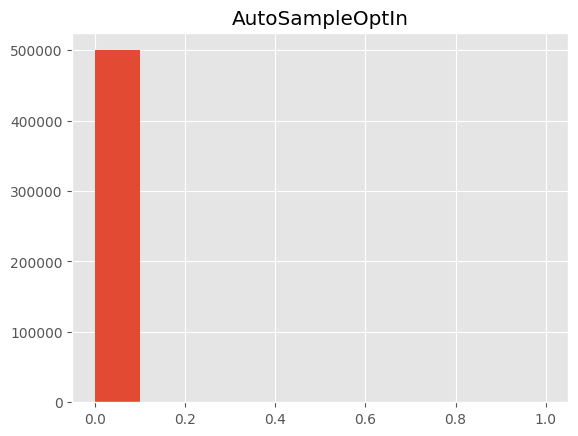

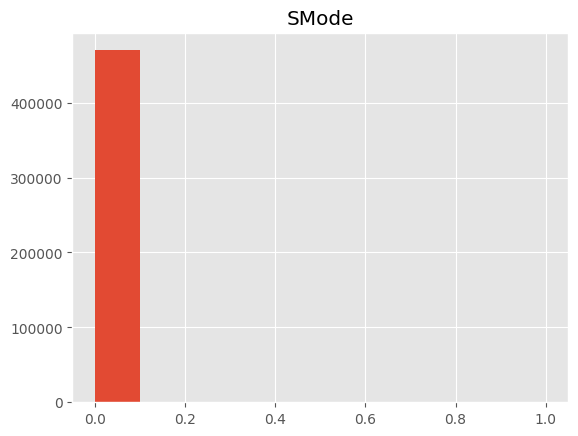

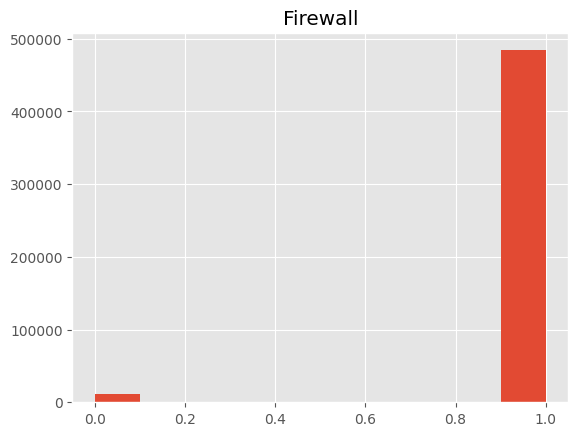

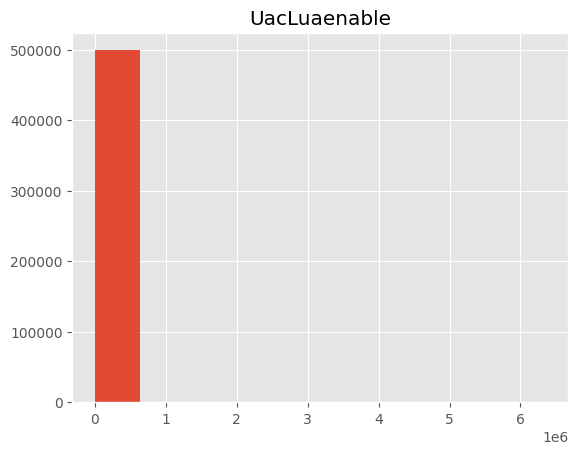

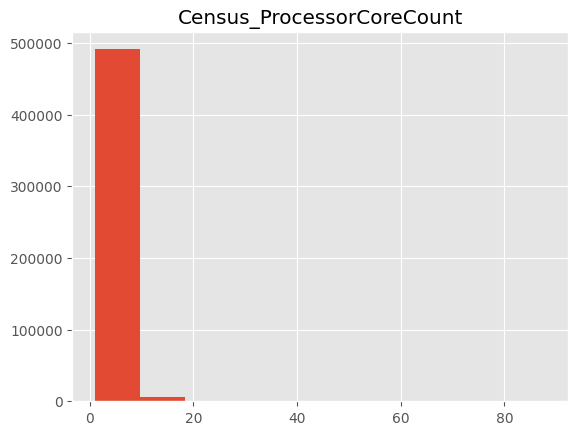

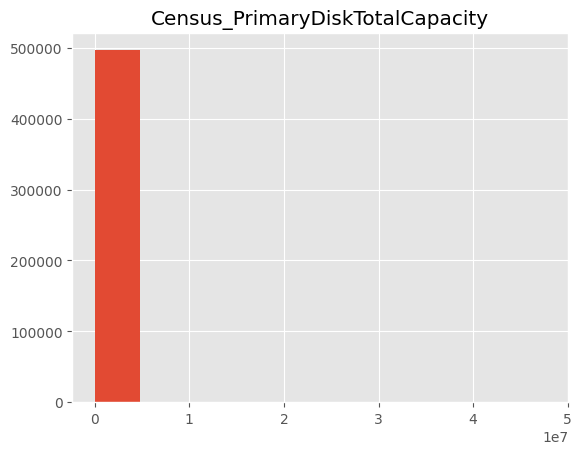

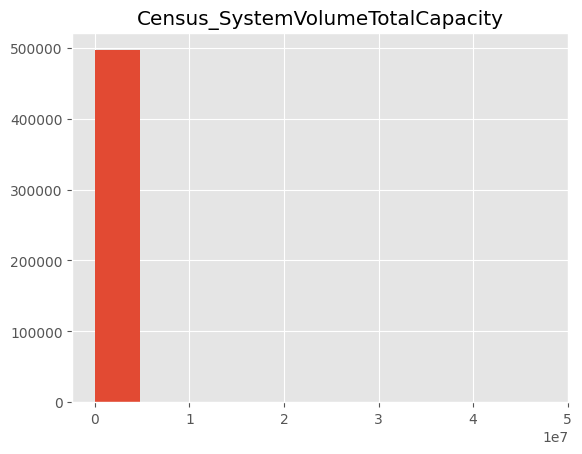

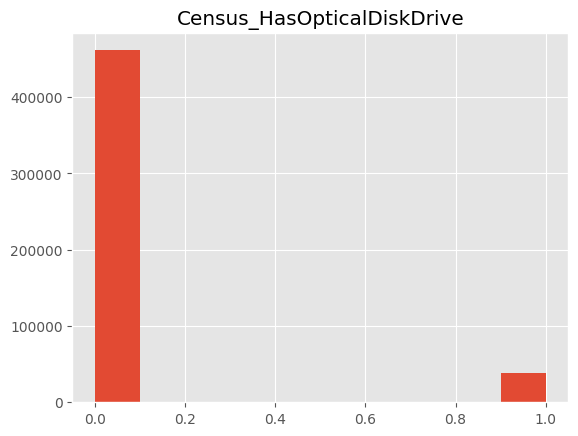

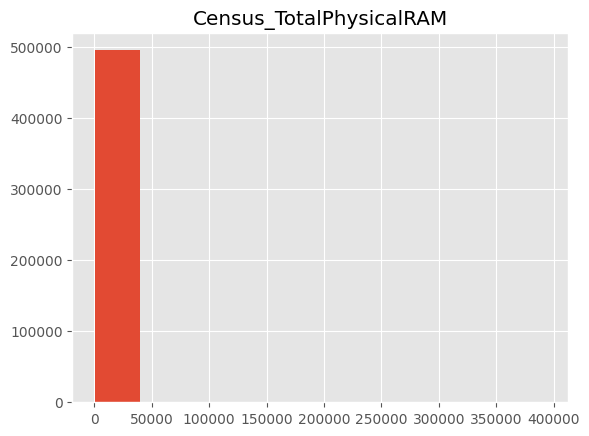

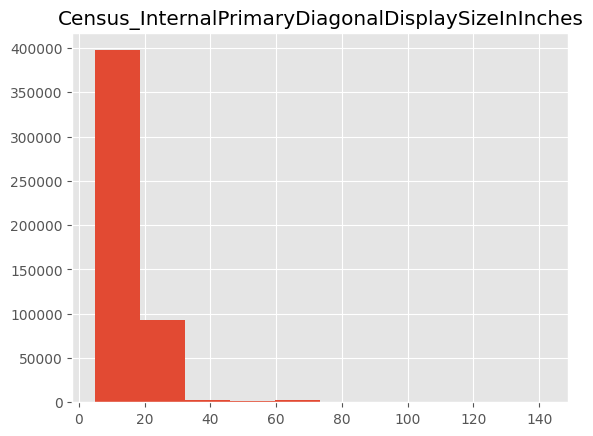

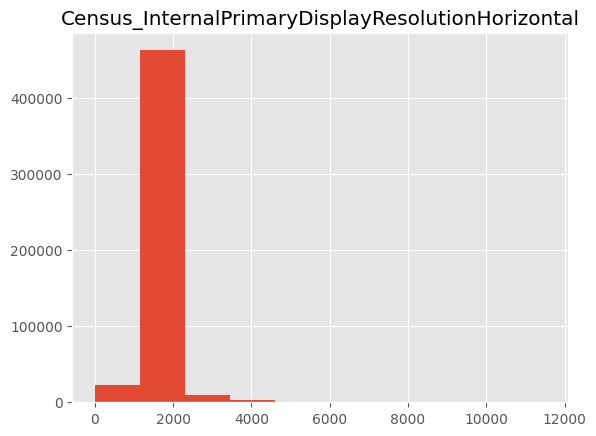

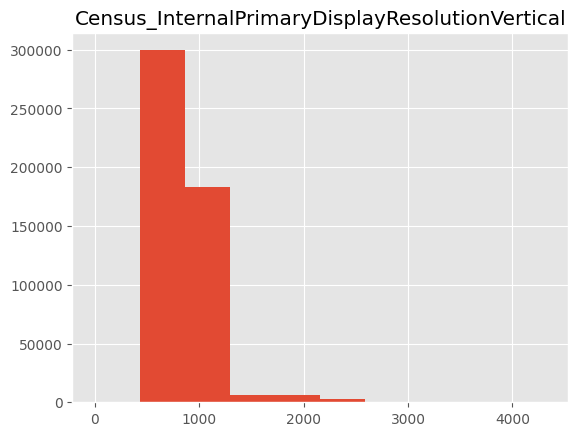

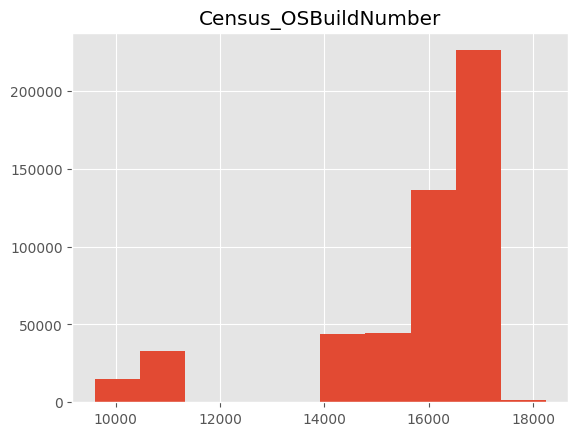

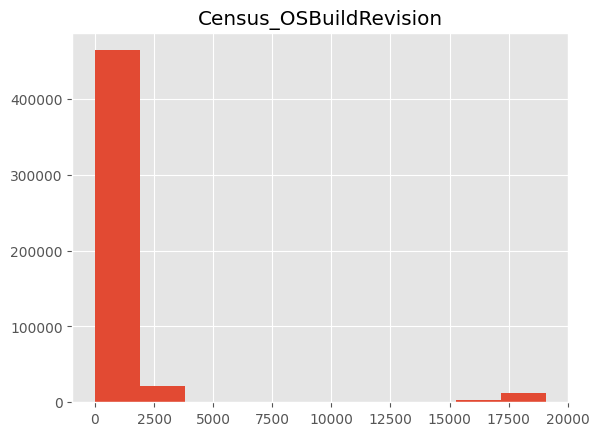

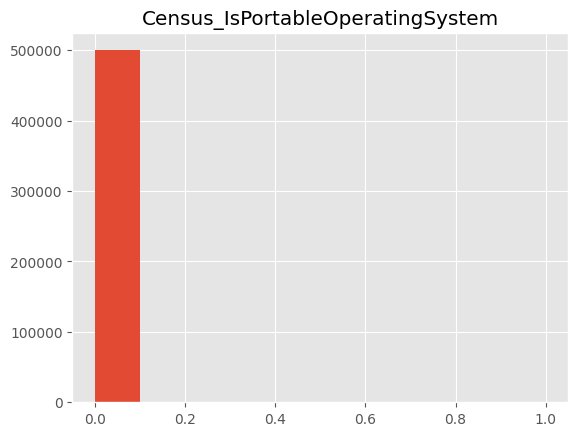

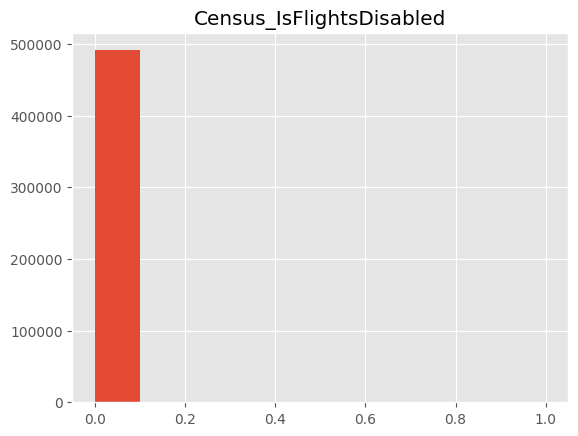

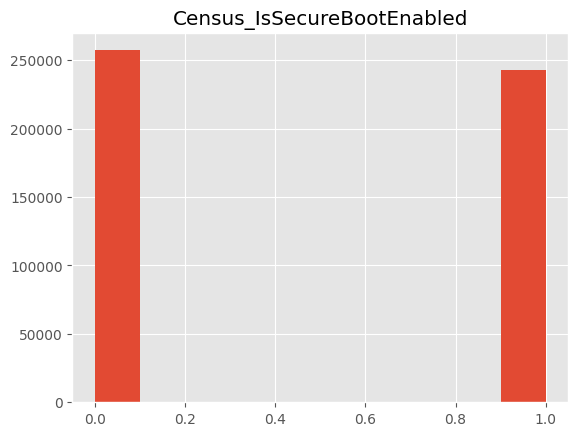

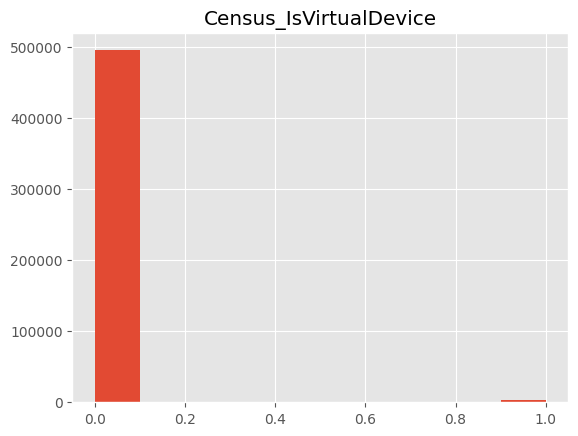

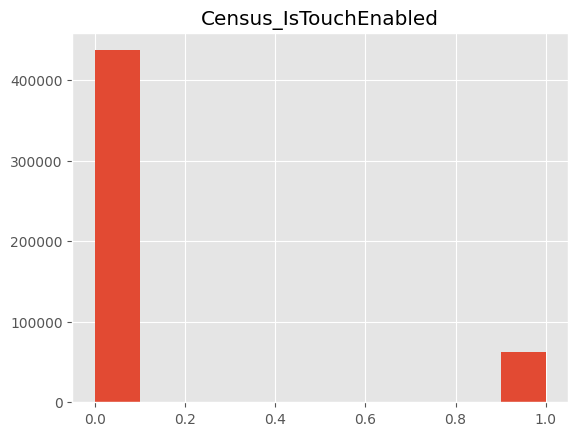

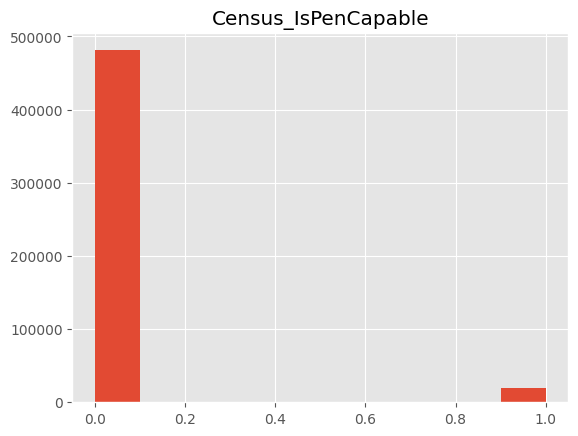

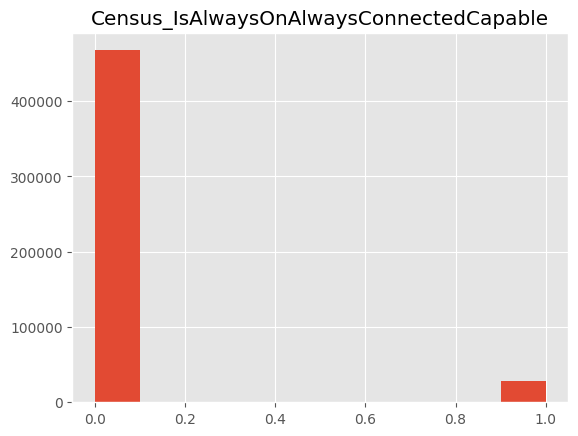

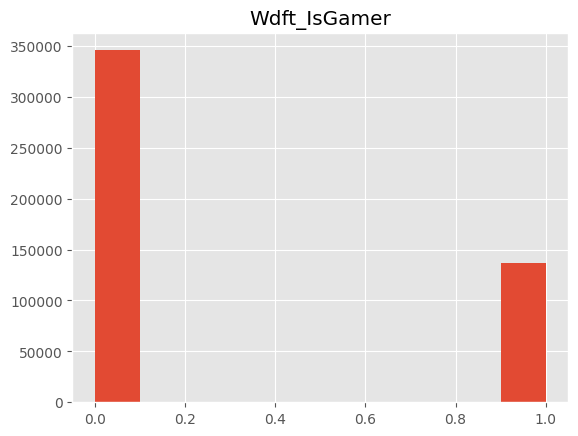

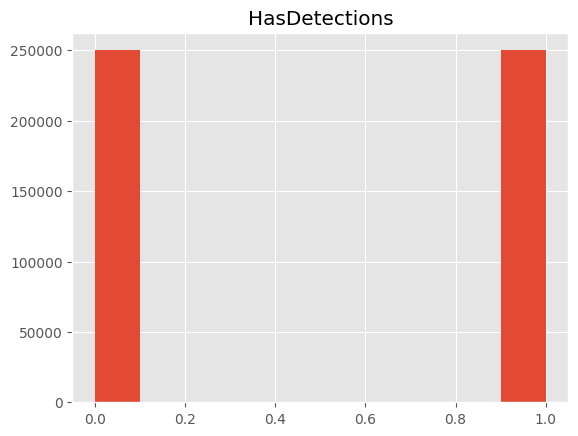

In [35]:
for i in df3:
    if  df3[i].dtype.kind=="f" or df3[i].dtype.kind=="i":
        df3.hist(column=i)

In [36]:
#Sospechosas = ['IsBeta','AutoSampleOptIn','SMode','UacLuaenable','Census_PrimaryDiskTotalCapacity','Census_SystemVolumeTotalCapacity','Census_TotalPhysicalRAM','Census_IsPortableOperatingSystem']

In [37]:
numericas_sin_varianza=[]

In [38]:
df3['IsBeta'].value_counts(normalize=True)

0   1.000
1   0.000
Name: IsBeta, dtype: float64

In [39]:
numericas_sin_varianza.append('IsBeta')

In [40]:
df3['AutoSampleOptIn'].value_counts(normalize=True)

0   1.000
1   0.000
Name: AutoSampleOptIn, dtype: float64

In [41]:
numericas_sin_varianza.append('AutoSampleOptIn')

In [42]:
df3['SMode'].value_counts(normalize=True)

0.000   1.000
1.000   0.000
Name: SMode, dtype: float64

In [43]:
numericas_sin_varianza.append('SMode')

In [44]:
df3['UacLuaenable'].value_counts(normalize=True)

1.000         0.994
0.000         0.006
48.000        0.000
2.000         0.000
6357062.000   0.000
Name: UacLuaenable, dtype: float64

In [45]:
numericas_sin_varianza.append('UacLuaenable')

In [46]:
df3['Census_PrimaryDiskTotalCapacity'].value_counts(normalize=True)

476940.000   0.319
953869.000   0.246
305245.000   0.054
122104.000   0.053
244198.000   0.051
              ... 
948333.000   0.000
20646.000    0.000
122069.000   0.000
190652.000   0.000
152499.000   0.000
Name: Census_PrimaryDiskTotalCapacity, Length: 1103, dtype: float64

Cierta varianza, pero muchos valores de peso irrisorio, habrá que investigar más y ver si agrupar valores o si la variable es prescindible

In [47]:
df3['Census_SystemVolumeTotalCapacity'].value_counts(normalize=True)

28542.000    0.006
926992.000   0.006
476389.000   0.005
476324.000   0.005
102400.000   0.005
              ... 
221517.000   0.000
580181.000   0.000
127615.000   0.000
236484.000   0.000
470309.000   0.000
Name: Census_SystemVolumeTotalCapacity, Length: 142051, dtype: float64

Cierta varianza, pero muchos valores de peso irrisorio, habrá que investigar más y ver si agrupar valores o si la variable es prescindible

In [48]:
df3['Census_TotalPhysicalRAM'].value_counts(normalize=True)

4096.000    0.462
8192.000    0.249
2048.000    0.125
16384.000   0.061
6144.000    0.045
             ... 
12963.000   0.000
5791.000    0.000
4124.000    0.000
5039.000    0.000
4120.000    0.000
Name: Census_TotalPhysicalRAM, Length: 552, dtype: float64

Cierta varianza, pero muchos valores de peso irrisorio, habrá que investigar más y ver si agrupar valores o si la variable es prescindible

In [49]:
df3['Census_IsPortableOperatingSystem'].value_counts(normalize=True)

0   0.999
1   0.001
Name: Census_IsPortableOperatingSystem, dtype: float64

In [50]:
numericas_sin_varianza.append('Census_IsPortableOperatingSystem')

In [51]:
numericas_sin_varianza

['IsBeta',
 'AutoSampleOptIn',
 'SMode',
 'UacLuaenable',
 'Census_IsPortableOperatingSystem']

In [52]:
col_no_varianza = categoricas_sin_varianza + numericas_sin_varianza

In [53]:
col_no_varianza

['PuaMode',
 'Census_ProcessorClass',
 'IsBeta',
 'AutoSampleOptIn',
 'SMode',
 'UacLuaenable',
 'Census_IsPortableOperatingSystem']

In [54]:
df4=df3.copy()

In [55]:
df4.drop(col_no_varianza, axis = 1, inplace = True)

Si en un parámetro concreto un valor supera el 90% desbalancea en exceso el dataset, por lo que creamos la siguiente función para eliminar esas columnas

In [56]:
cleaned_cols = list(df4.columns)
for col in df4.columns:
    rate = df4[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.9:
        cleaned_cols.remove(col)
df4 = df4[cleaned_cols]

##ANALISIS VARIABLES, LIMPIEZA, PREPARACIÓN Y CONVERSIÓN

In [57]:
def analisis (dataframe, column, target_column):
  results = dataframe[dataframe[target_column] == 1 ].pivot_table(index = column, values = TARGET, aggfunc = [len])
  results.columns = ['Infections']
  results['Users'] = dataframe[column].value_counts()
  results['% Infections'] = (results ['Infections']*100) / results['Users'] 
  
  return results

In [58]:
def plot (dataframe, column, target_column):

  x=dataframe[column].nunique()
  plt.figure(figsize = (25,x))
  sns.set_theme(style="whitegrid")
  sns.countplot(data=dataframe, y=column, hue=target_column)

In [59]:
def plot_num (dataframe, column, target_column):
  plt.figure(figsize = (15,8))
  sns.set_theme(style="whitegrid")
  ax1 = plt.subplot(2,1,1)
  ax1 = dataframe[column].plot(kind='box')
  ax2 = plt.subplot(2,1,2)
  ax2 = sns.violinplot(data=dataframe, x=target_column, y=column)

  plt.show()

###ANALISIS NUMERICAS, PREPARACIÓN Y CONVERSIÓN

#####No hay variables de tipo fecha
Transformaremos algunas a categóricas al ser en realidad identificadores no ordenables

Eliminaremos también ciertas variables que por conocimiento del tema consideramos que no van a influir, como la resolución de la pantalla o las pulgadas de ésta

Puesto que vamos a utilizar un decision tree, el tratamiento de nulos consistirá en sustituir por un outlier evidente a fin que el modelo lo ignore


In [60]:
######si tenemos tiempo, picar la manera para que chequee el nombre cada columna y si 

In [61]:
num_a_cat=['AVProductStatesIdentifier','CountryIdentifier','CityIdentifier','OrganizationIdentifier','GeoNameIdentifier','LocaleEnglishNameIdentifier']

In [62]:
for i in num_a_cat:
  df4[i] = df4[i].astype(object)

In [63]:
no_influye=['Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical']

In [64]:
df4.drop(no_influye, axis = 1, inplace = True)

In [65]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
OsBuild,500000.000,15726.934,2188.646,7600.000,15063.000,16299.000,17134.000,18242.000
OsSuite,500000.000,574.719,248.203,16.000,256.000,768.000,768.000,784.000
Census_ProcessorCoreCount,497653.000,3.994,2.071,1.000,2.000,4.000,4.000,88.000
Census_PrimaryDiskTotalCapacity,497024.000,514043.316,370446.816,10240.000,239372.000,476940.000,953869.000,47687668.000
Census_SystemVolumeTotalCapacity,497024.000,378054.639,338472.219,9689.000,120775.000,249450.000,475981.000,47687100.000
Census_TotalPhysicalRAM,495444.000,6129.232,4964.521,512.000,4096.000,4096.000,8192.000,393216.000
Census_OSBuildNumber,500000.000,15841.373,1959.440,9600.000,15063.000,16299.000,17134.000,18242.000
Census_OSBuildRevision,500000.000,967.225,2920.628,0.000,165.000,285.000,547.000,19069.000
Census_IsSecureBootEnabled,500000.000,0.485,0.500,0.000,0.000,0.000,1.000,1.000
Census_IsTouchEnabled,500000.000,0.125,0.331,0.000,0.000,0.000,0.000,1.000


####OsBuild

In [66]:
V='OsBuild'

explore_columns(df4,V)

Value_counts:
500000
Unique elements:
48
Total nulls:
0
Column info:
count   500000.000
mean     15726.934
std       2188.646
min       7600.000
25%      15063.000
50%      16299.000
75%      17134.000
max      18242.000
Name: OsBuild, dtype: float64


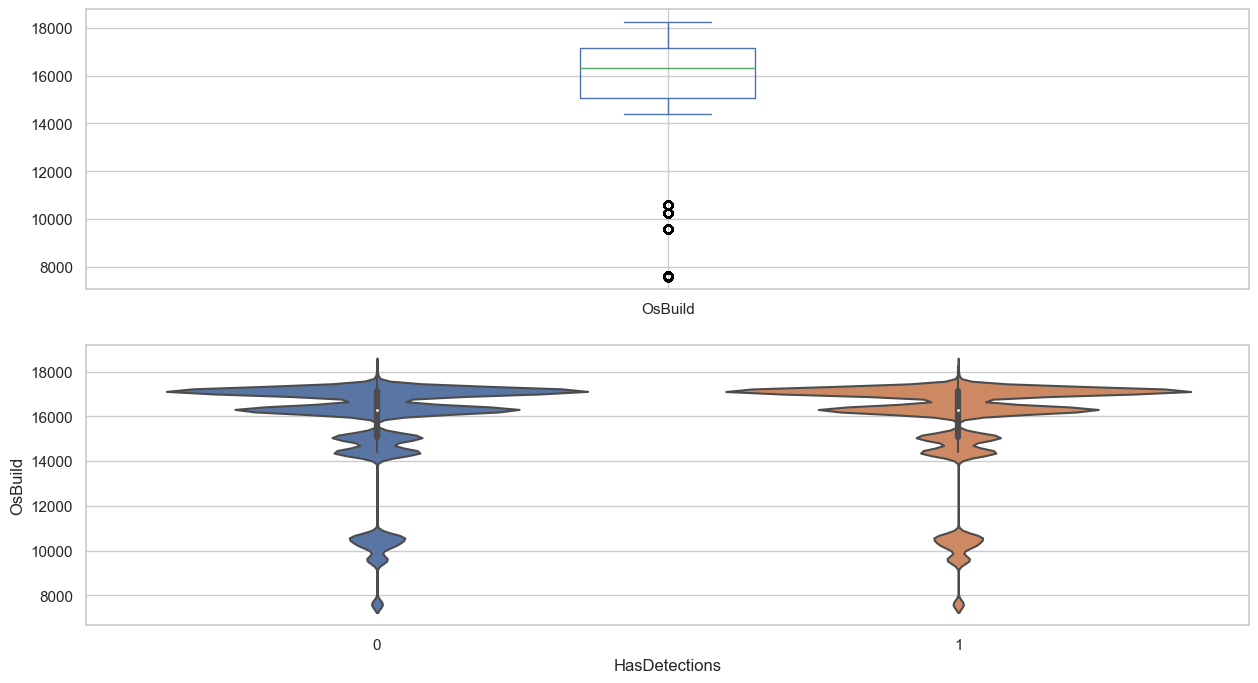

,Infections,Users,% Infections
OsBuild,,,
7600,10,33,30.303
7601,2552,5281,48.324
9600,5614,10825,51.861
10240,7309,15014,48.681
10586,10608,22955,46.212
14393,18848,40717,46.290
15063,20778,43352,47.929
16299,68735,139901,49.131
17134,114996,220779,52.086


In [67]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

In [68]:
df4['OsBuild'].value_counts(normalize=True) > 0.01

17134     True
16299     True
15063     True
14393     True
10586     True
10240     True
9600      True
7601      True
17692    False
17738    False
17744    False
17758    False
17746    False
17713    False
17754    False
17751    False
17741    False
17755    False
17735    False
17686    False
17733    False
17763    False
7600     False
17760    False
17682    False
17677    False
18234    False
17672    False
18242    False
18237    False
17661    False
17666    False
17723    False
17634    False
17639    False
17730    False
17618    False
17747    False
17655    False
17650    False
17753    False
17604    False
18214    False
17711    False
17704    False
18219    False
17623    False
17749    False
Name: OsBuild, dtype: bool

In [69]:
df4['OsBuild'].value_counts(normalize=True).head(8).sum()

0.997648

####OsSuite

In [70]:
V='OsSuite'

explore_columns(df4,V)

Value_counts:
500000
Unique elements:
9
Total nulls:
0
Column info:
count   500000.000
mean       574.719
std        248.203
min         16.000
25%        256.000
50%        768.000
75%        768.000
max        784.000
Name: OsSuite, dtype: float64


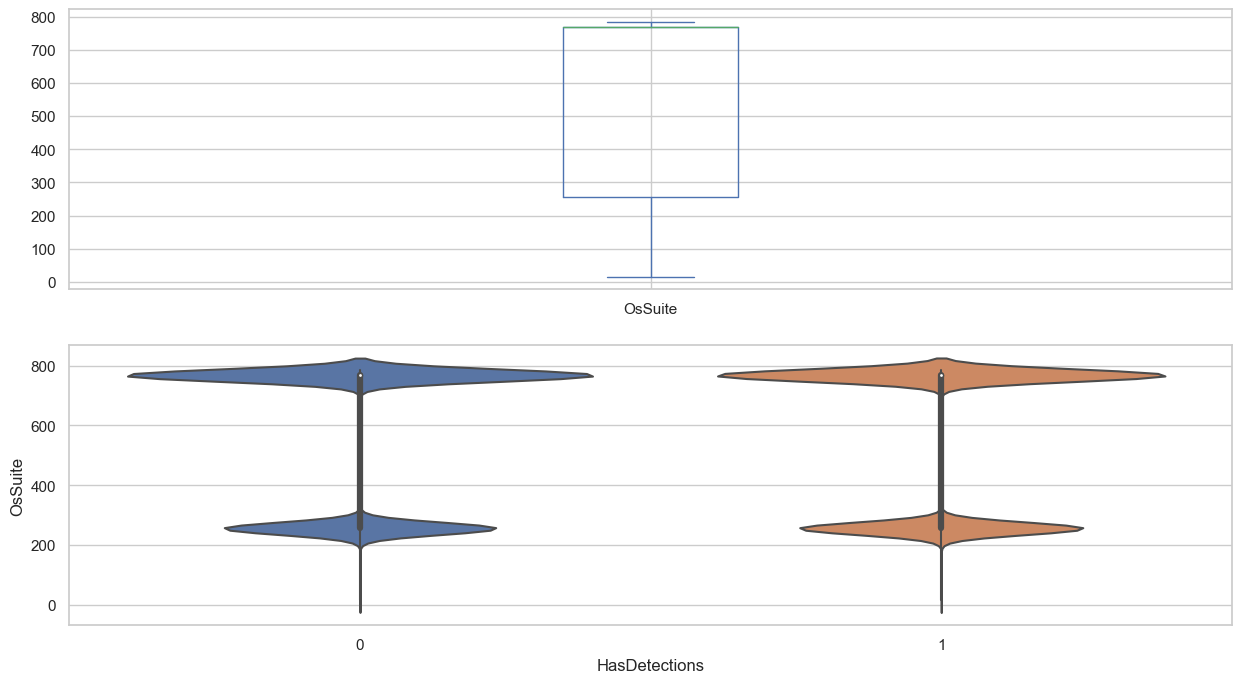

,Infections,Users,% Infections
OsSuite,,,
16,33,53,62.264
18,1,1,100.000
256,96463,187951,51.323
272,238,677,35.155
274,1,2,50.000
305,13,33,39.394
400,15,47,31.915
768,153185,311226,49.220
784,4,10,40.000


In [71]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

In [72]:
df4['OsSuite'].value_counts(normalize=True) > 0.01

768     True
256     True
272    False
16     False
400    False
305    False
784    False
274    False
18     False
Name: OsSuite, dtype: bool

In [73]:
df4['OsSuite'].value_counts(normalize=True).head(2).sum()

0.998354

####Census_ProcessorCoreCount

In [74]:
V='Census_ProcessorCoreCount'

explore_columns(df4,V)

Value_counts:
497653
Unique elements:
27
Total nulls:
2347
Column info:
count   497653.000
mean         3.994
std          2.071
min          1.000
25%          2.000
50%          4.000
75%          4.000
max         88.000
Name: Census_ProcessorCoreCount, dtype: float64


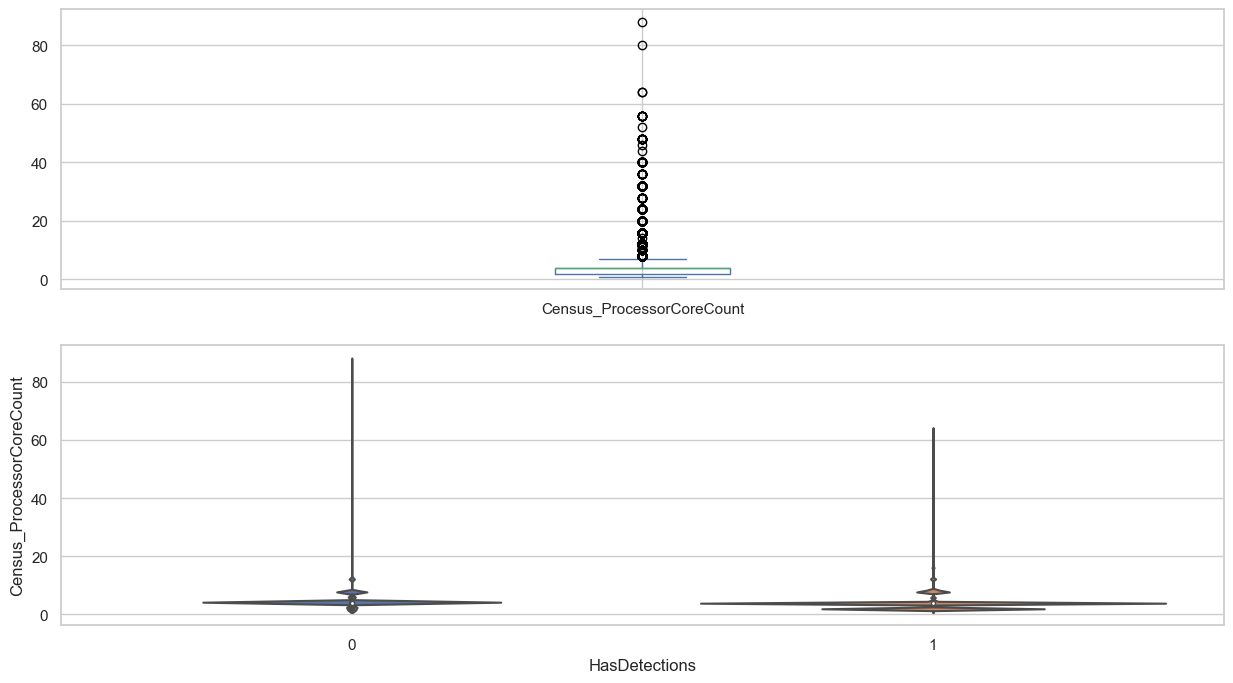

,Infections,Users,% Infections
Census_ProcessorCoreCount,,,
1.000,1207,3980,30.327
2.000,59122,129178,45.768
3.000,342,752,45.479
4.000,154734,304102,50.882
5.000,7,10,70.000
6.000,2290,4023,56.923
7.000,1,3,33.333
8.000,27121,48995,55.355
10.000,3,10,30.000


In [75]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

In [76]:
df4['Census_ProcessorCoreCount'].fillna(value=65 , inplace=True)

####Census_PrimaryDiskTotalCapacity

In [77]:
V='Census_PrimaryDiskTotalCapacity'

explore_columns(df4,V)

Value_counts:
497024
Unique elements:
1103
Total nulls:
2976
Column info:
count     497024.000
mean      514043.316
std       370446.816
min        10240.000
25%       239372.000
50%       476940.000
75%       953869.000
max     47687668.000
Name: Census_PrimaryDiskTotalCapacity, dtype: float64


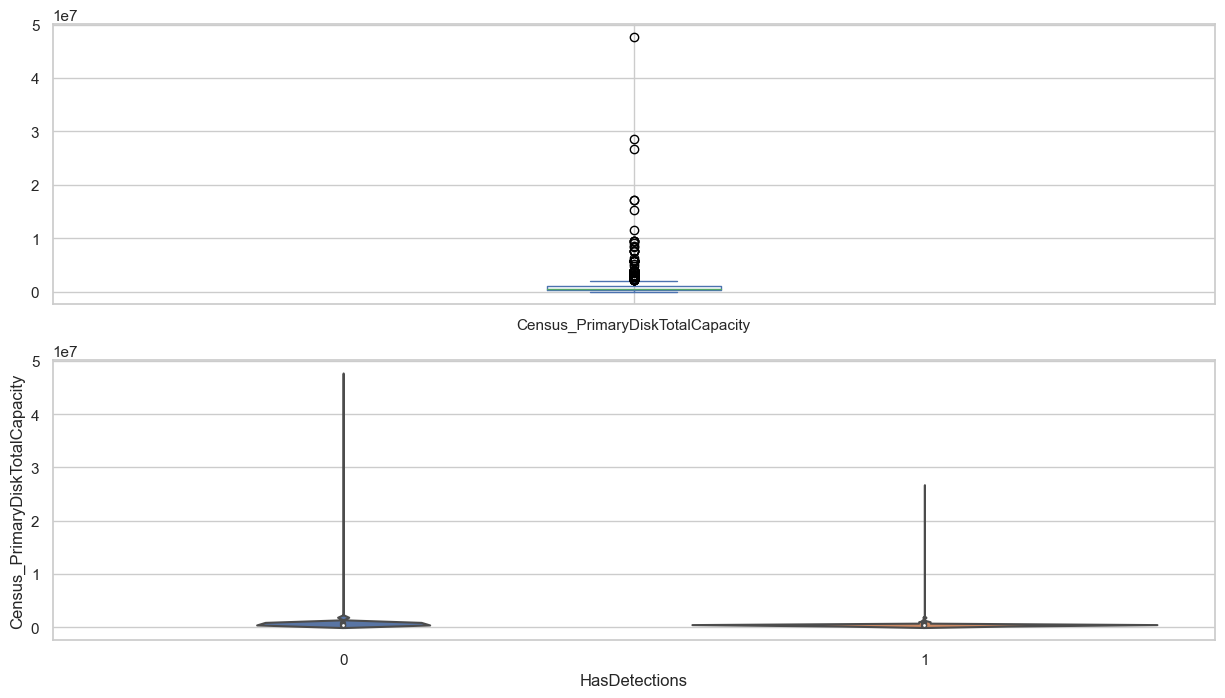

,Infections,Users,% Infections
Census_PrimaryDiskTotalCapacity,,,
13312.000,1,1,100.000
14800.000,38,232,16.379
14910.000,10,55,18.182
14912.000,16,71,22.535
14930.000,19,74,25.676
...,...,...,...
8583168.000,1,1,100.000
9154560.000,1,1,100.000
9537536.000,1,3,33.333


In [78]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

In [79]:
df4['Census_PrimaryDiskTotalCapacity'].fillna(value=-26707905.000 , inplace=True)

####Census_SystemVolumeTotalCapacity

In [80]:
V='Census_SystemVolumeTotalCapacity'

explore_columns(df4,V)

Value_counts:
497024
Unique elements:
142051
Total nulls:
2976
Column info:
count     497024.000
mean      378054.639
std       338472.219
min         9689.000
25%       120775.000
50%       249450.000
75%       475981.000
max     47687100.000
Name: Census_SystemVolumeTotalCapacity, dtype: float64


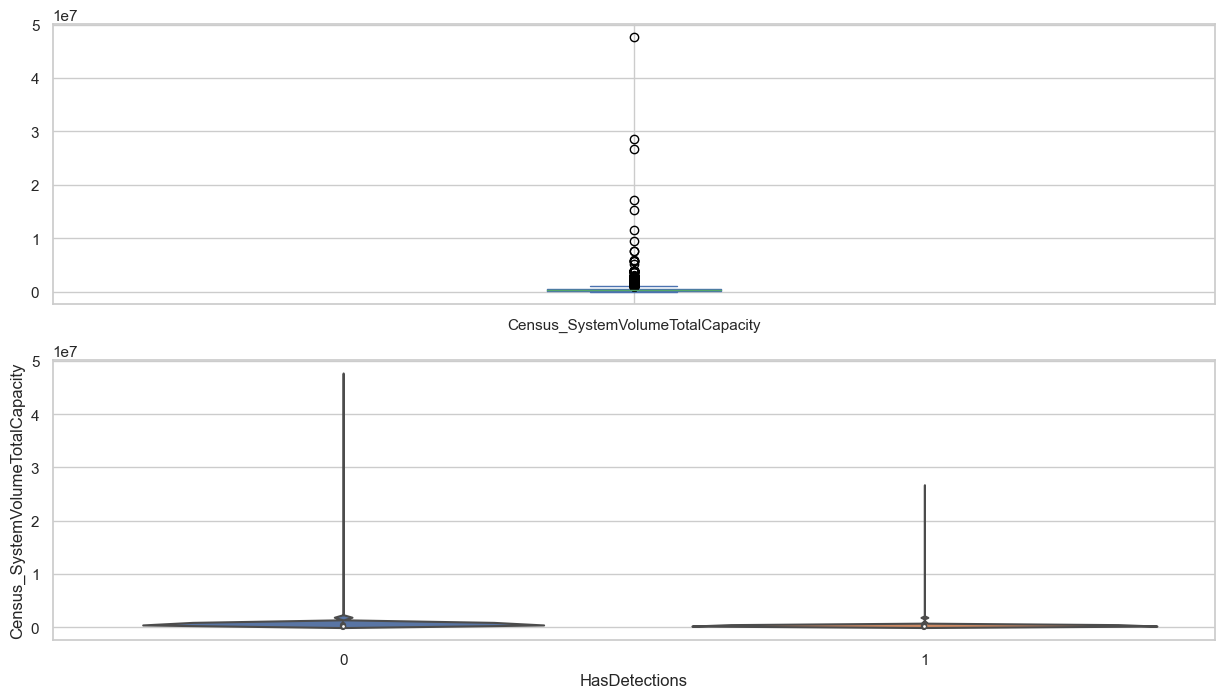

,Infections,Users,% Infections
Census_SystemVolumeTotalCapacity,,,
9899.000,1,1,100.000
9900.000,1,1,100.000
12224.000,1,1,100.000
12778.000,1,1,100.000
12810.000,1,1,100.000
...,...,...,...
5721002.000,1,1,100.000
5842416.000,1,1,100.000
7630319.000,1,2,50.000


In [81]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

In [82]:
df4['Census_SystemVolumeTotalCapacity'].fillna(value=48000000.000 , inplace=True)

####Census_TotalPhysicalRAM

In [83]:
V='Census_TotalPhysicalRAM'

explore_columns(df4,V)

Value_counts:
495444
Unique elements:
552
Total nulls:
4556
Column info:
count   495444.000
mean      6129.232
std       4964.521
min        512.000
25%       4096.000
50%       4096.000
75%       8192.000
max     393216.000
Name: Census_TotalPhysicalRAM, dtype: float64


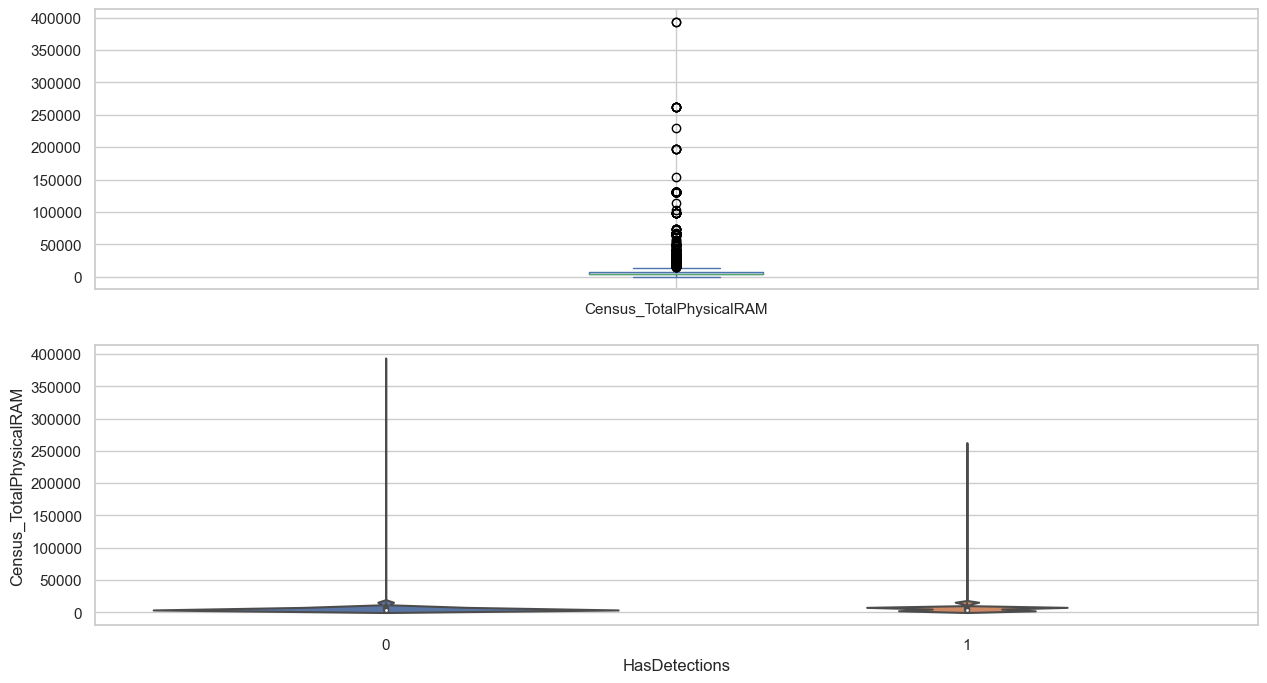

,Infections,Users,% Infections
Census_TotalPhysicalRAM,,,
512.000,1,6,16.667
768.000,2,3,66.667
1015.000,1,3,33.333
1023.000,2,20,10.000
1024.000,889,3603,24.674
...,...,...,...
98302.000,1,1,100.000
98304.000,1,8,12.500
131072.000,26,57,45.614


In [84]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

In [85]:
df4['Census_TotalPhysicalRAM'].fillna(value=400000.000 , inplace=True)

####Census_OSBuildNumber

In [86]:
V='Census_OSBuildNumber'

explore_columns(df4,V)

Value_counts:
500000
Unique elements:
61
Total nulls:
0
Column info:
count   500000.000
mean     15841.373
std       1959.440
min       9600.000
25%      15063.000
50%      16299.000
75%      17134.000
max      18242.000
Name: Census_OSBuildNumber, dtype: float64


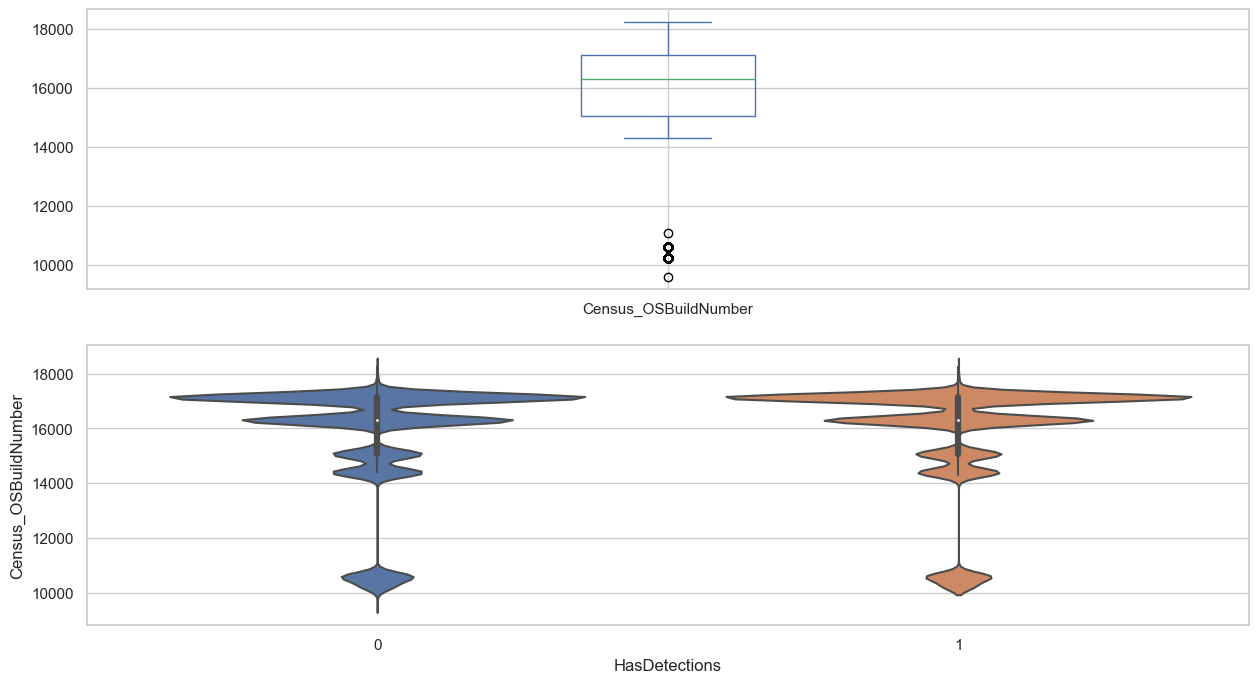

,Infections,Users,% Infections
Census_OSBuildNumber,,,
10240,7343,15106,48.610
10586,15660,33193,47.179
14295,1,1,100.000
14328,1,1,100.000
14393,20320,43702,46.497
14926,1,1,100.000
14946,1,1,100.000
14971,1,1,100.000
14986,2,2,100.000


In [87]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

####Census_OSBuildRevision

In [88]:
V='Census_OSBuildRevision'

explore_columns(df4,V)

Value_counts:
500000
Unique elements:
242
Total nulls:
0
Column info:
count   500000.000
mean       967.225
std       2920.628
min          0.000
25%        165.000
50%        285.000
75%        547.000
max      19069.000
Name: Census_OSBuildRevision, dtype: float64


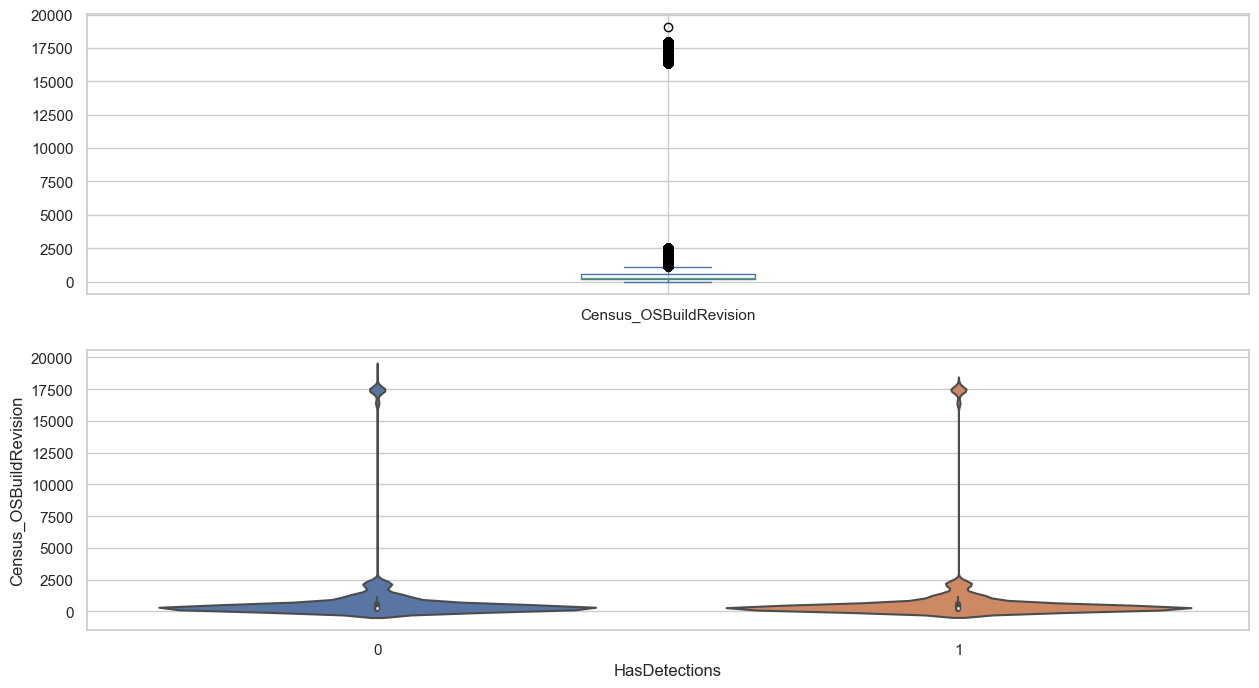

,Infections,Users,% Infections
Census_OSBuildRevision,,,
0,4695,9175,51.172
1,3126,5999,52.109
3,205,393,52.163
4,11,39,28.205
5,189,455,41.538
...,...,...,...
17889,64,103,62.136
17914,65,87,74.713
17918,17,28,60.714


In [89]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

####Census_IsSecureBootEnabled

In [90]:
V='Census_IsSecureBootEnabled'

explore_columns(df4,V)

Value_counts:
500000
Unique elements:
2
Total nulls:
0
Column info:
count   500000.000
mean         0.485
std          0.500
min          0.000
25%          0.000
50%          0.000
75%          1.000
max          1.000
Name: Census_IsSecureBootEnabled, dtype: float64


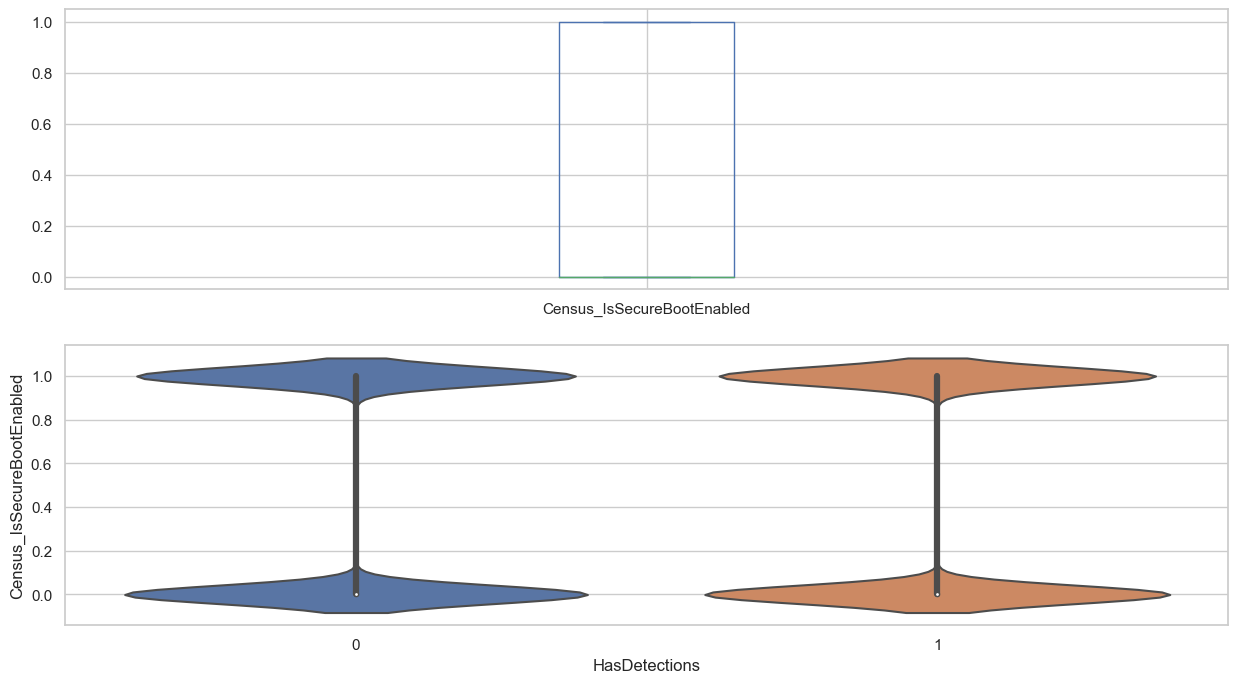

,Infections,Users,% Infections
Census_IsSecureBootEnabled,,,
0,128927,257281,50.111
1,121026,242719,49.863


In [91]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

####Census_IsTouchEnabled

In [92]:
V='Census_IsTouchEnabled'

explore_columns(df4,V)

Value_counts:
500000
Unique elements:
2
Total nulls:
0
Column info:
count   500000.000
mean         0.125
std          0.331
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          1.000
Name: Census_IsTouchEnabled, dtype: float64


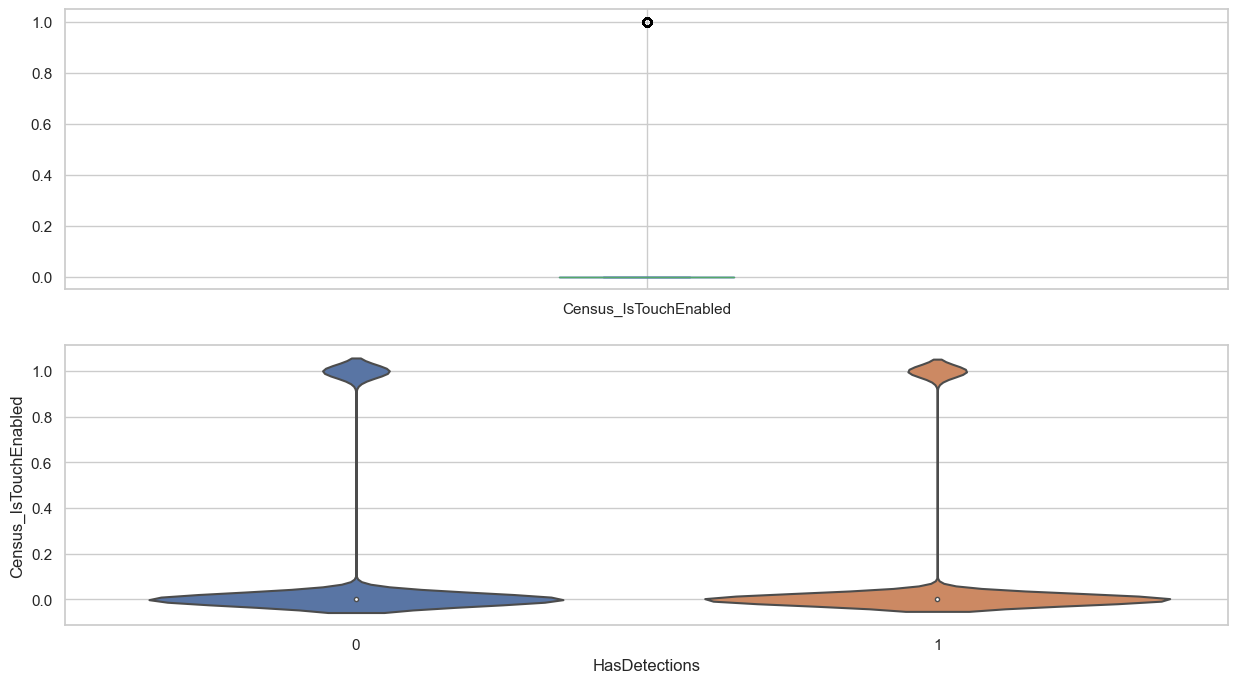

,Infections,Users,% Infections
Census_IsTouchEnabled,,,
0,221964,437283,50.760
1,27989,62717,44.627


In [93]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

####Wdft_IsGamer

In [94]:
V='Wdft_IsGamer'

explore_columns(df4,V)

Value_counts:
483050
Unique elements:
2
Total nulls:
16950
Column info:
count   483050.000
mean         0.284
std          0.451
min          0.000
25%          0.000
50%          0.000
75%          1.000
max          1.000
Name: Wdft_IsGamer, dtype: float64


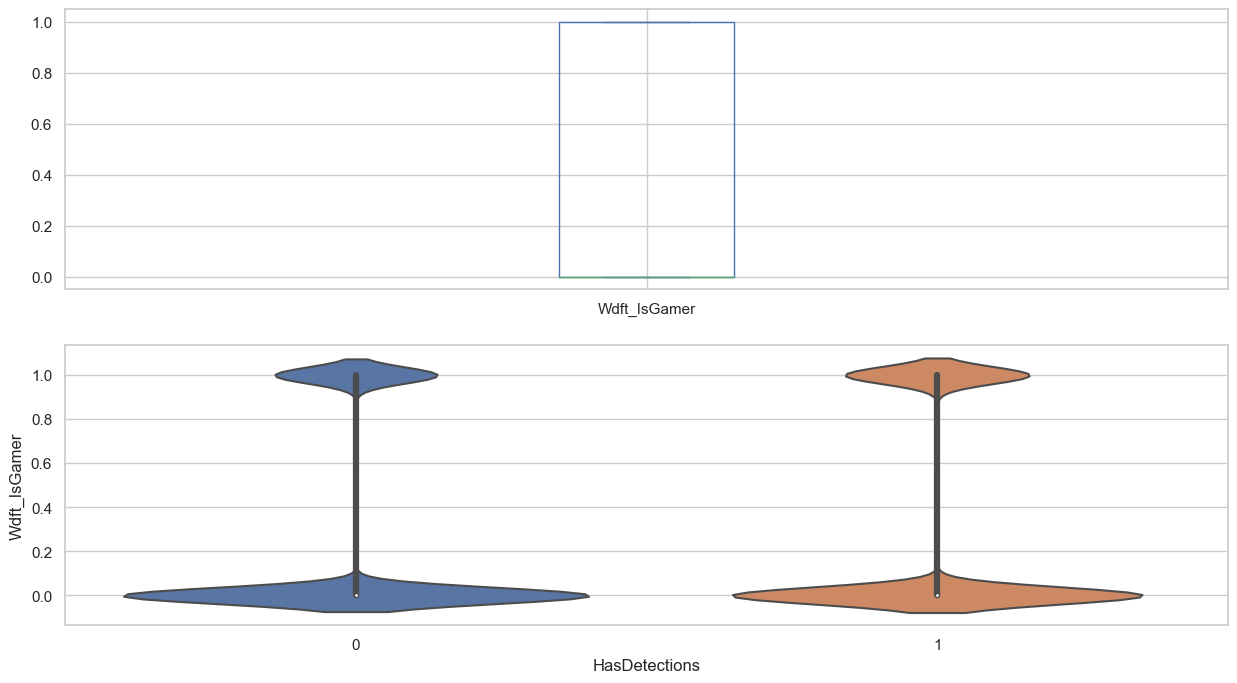

,Infections,Users,% Infections
Wdft_IsGamer,,,
0.000,166416,345835,48.120
1.000,74678,137215,54.424


In [95]:
plot_num(df4, V, TARGET)
analisis(df4, V, TARGET)

In [96]:
df4['Wdft_IsGamer'].fillna(value=-10 , inplace=True)

####Fin de la preparación de numéricas

In [97]:
df5=df4.copy()

###ANALISIS CATEGORICAS, PREPARACION Y CONVERSIÓN


Si en un parámetro concreto tipo object un valor no llega a un mínimo porcentaje de frecuencia es irrelevante

Para ajustar ese porcentaje a lo que queramos crearemos la variable min_perc

Crearemos la función setGrouped para agrupar según ese criterio



In [98]:
min_perc=0.01

In [99]:
def setGrouped(dataframe, column, num_values,nombre_grupo):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(nombre_grupo)
    dataframe[column]= np.where(~dataframe[column].isin(top_categories_list),nombre_grupo,dataframe[column])
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column]
#------------------------------------------------#
#def setGrouped(dataframe, column, num_values,column_group):
    #top_categories = dataframe[column].value_counts().head(num_values)
    #top_categories_list = top_categories.index.to_list()
    #top_categories_list.append(column_group)
    #dataframe[column]= np.where(~dataframe[column].isin(top_categories_list), column_group,dataframe[column])
    #dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    #return dataframe[column]

#min_inc=(df[Parametro].value_counts(normalize=True) > min_perc).sum()

In [100]:
df5.describe(exclude = np.number).T

,count,unique,top,freq
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
AVProductStatesIdentifier,498062.000,5516.000,53447.000,326463.000
CountryIdentifier,500000,222,43,22339
CityIdentifier,481760.000,37157.000,130775.000,5271.000
OrganizationIdentifier,345437.000,44.000,27.000,234885.000
GeoNameIdentifier,499984.000,268.000,277.000,86080.000
LocaleEnglishNameIdentifier,500000,233,75,117818
OsPlatformSubRelease,500000,9,rs4,220779


####EngineVersion

In [101]:
df5['EngineVersion'].value_counts(normalize=True) 

1.1.15200.1   0.433
1.1.15100.1   0.411
1.1.15000.2   0.030
1.1.14901.4   0.024
1.1.14600.4   0.018
1.1.14800.3   0.015
1.1.15300.6   0.014
1.1.14104.0   0.010
1.1.15300.5   0.008
1.1.13504.0   0.008
1.1.14700.5   0.005
1.1.14500.5   0.005
1.1.14405.2   0.004
1.1.14306.0   0.003
1.1.14202.0   0.002
1.1.14003.0   0.002
1.1.13303.0   0.001
1.1.13903.0   0.001
1.1.13804.0   0.001
1.1.13407.0   0.001
1.1.13601.0   0.001
1.1.12902.0   0.001
1.1.14305.0   0.001
1.1.13701.0   0.001
1.1.13704.0   0.001
1.1.13202.0   0.000
1.1.13103.0   0.000
1.1.13000.0   0.000
1.1.15000.1   0.000
1.1.12805.0   0.000
1.1.14901.3   0.000
1.1.14700.4   0.000
1.1.14700.3   0.000
1.1.14800.1   0.000
1.1.14500.2   0.000
1.1.14201.0   0.000
1.1.14303.0   0.000
1.1.12101.0   0.000
1.1.14103.0   0.000
1.1.12804.0   0.000
1.1.13802.0   0.000
1.1.13902.0   0.000
1.1.13803.0   0.000
1.1.12603.0   0.000
1.1.11701.0   0.000
1.1.14001.0   0.000
1.1.14002.0   0.000
1.1.14102.0   0.000
1.1.13406.0   0.000
1.1.12400.0   0.000


In [102]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='EngineVersion'
agrupado='Other'

In [103]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)


0         1.1.15100.1
1         1.1.15100.1
2         1.1.15100.1
3         1.1.15200.1
4         1.1.15200.1
             ...     
499995    1.1.15200.1
499996    1.1.15100.1
499997          Other
499998    1.1.15100.1
499999    1.1.15100.1
Name: EngineVersion, Length: 500000, dtype: category
Categories (9, object): ['1.1.15200.1', '1.1.15100.1', '1.1.15000.2', '1.1.14901.4', ..., '1.1.14800.3', '1.1.15300.6', '1.1.14104.0', 'Other']

In [104]:
explore_columns(df5,V)

Value_counts:
500000
Unique elements:
9
Total nulls:
0
Column info:
count          500000
unique              9
top       1.1.15200.1
freq           216491
Name: EngineVersion, dtype: object


,Infections,Users,% Infections
EngineVersion,,,
1.1.15200.1,106453,216491,49.172
1.1.15100.1,113557,205494,55.260
1.1.15000.2,5041,14752,34.172
1.1.14901.4,3670,11984,30.624
1.1.14600.4,3986,9005,44.264
1.1.14800.3,2306,7548,30.551
1.1.15300.6,3287,6769,48.560
1.1.14104.0,2298,5240,43.855
Other,9355,22717,41.181


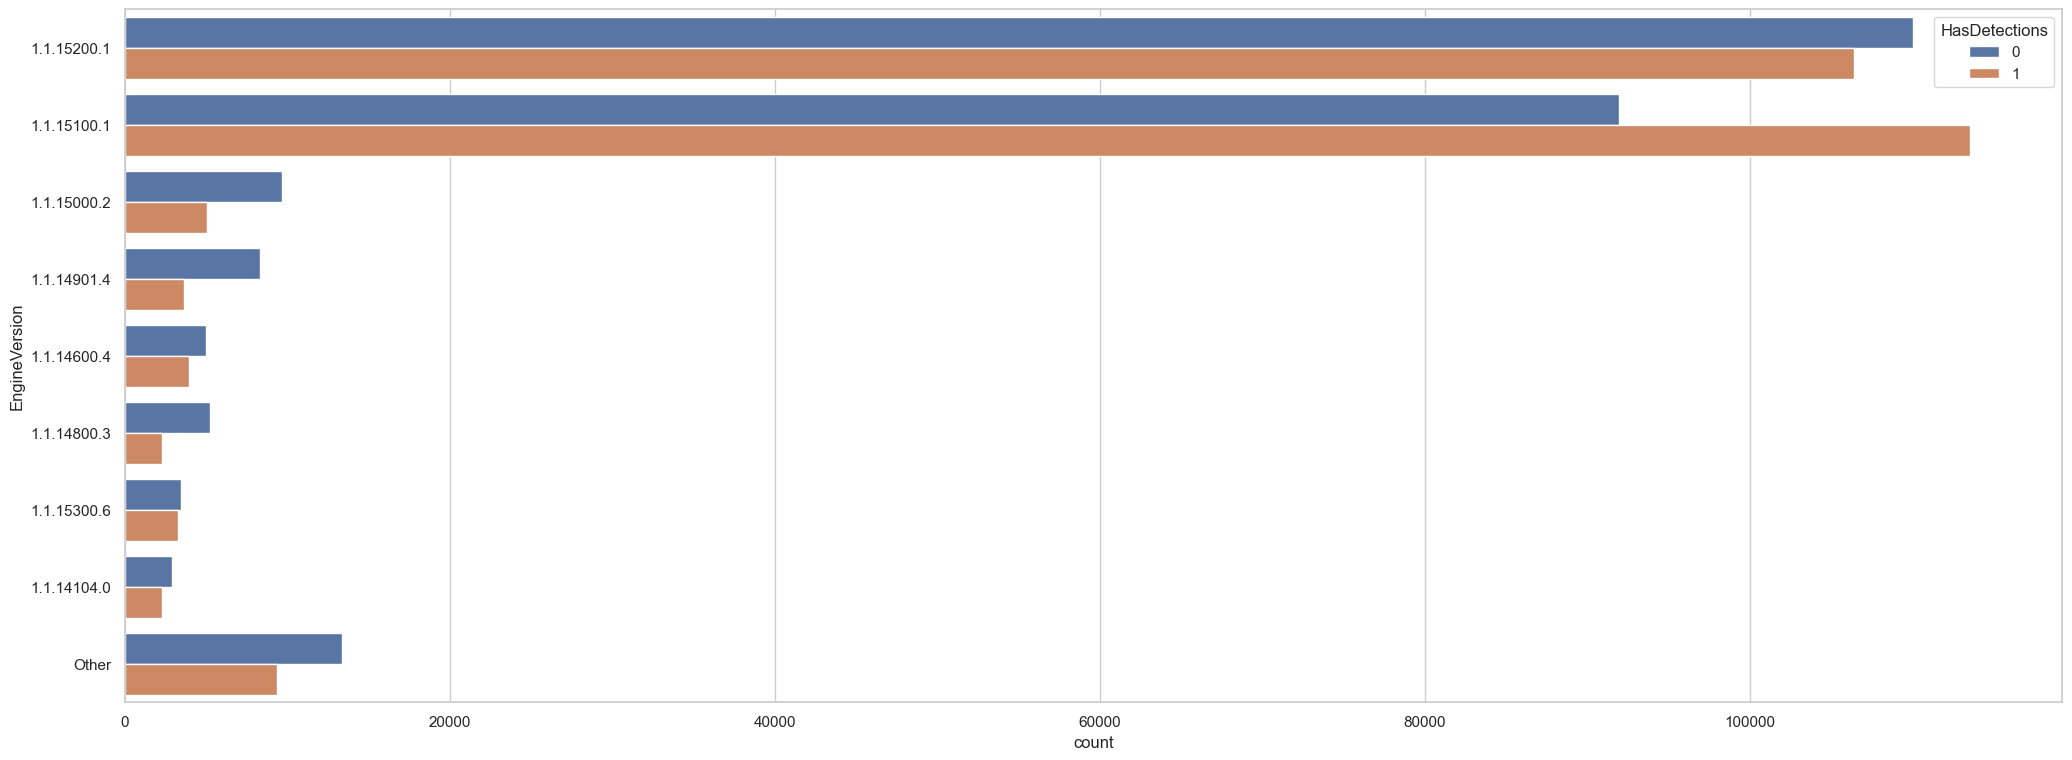

In [105]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)


####AppVersion

In [106]:
df5['AppVersion'].value_counts(normalize=True)

4.18.1807.18075    0.578
4.18.1806.18062    0.095
4.12.16299.15      0.040
4.10.209.0         0.031
4.13.17134.1       0.029
4.16.17656.18052   0.026
4.13.17134.228     0.025
4.9.10586.1106     0.023
4.8.10240.17443    0.023
4.14.17639.18041   0.021
4.12.17007.18022   0.013
4.9.10586.0        0.012
4.11.15063.447     0.010
4.10.14393.0       0.009
4.11.15063.0       0.008
4.12.17007.18011   0.007
4.14.17613.18039   0.006
4.8.10240.16384    0.005
4.11.15063.1155    0.005
4.10.14393.1794    0.005
4.9.10586.494      0.003
4.10.14393.1198    0.003
4.9.10586.672      0.002
4.13.17134.191     0.002
4.12.17007.17123   0.002
4.9.10586.589      0.002
4.10.14393.1613    0.002
4.18.1809.2        0.001
4.13.17134.112     0.001
4.9.10586.1045     0.001
4.10.14393.1593    0.001
4.10.14393.1066    0.001
4.10.14393.953     0.001
4.9.218.0          0.001
4.9.10586.916      0.001
4.9.10586.965      0.001
4.9.10586.962      0.001
4.8.10240.17946    0.001
4.9.10586.839      0.000
4.9.10586.873      0.000


In [107]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='AppVersion'
agrupado='Other'

In [108]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)


0          4.18.1807.18075
1          4.18.1807.18075
2           4.9.10586.1106
3          4.18.1807.18075
4          4.18.1807.18075
                ...       
499995     4.18.1807.18075
499996     4.18.1807.18075
499997               Other
499998    4.14.17639.18041
499999     4.18.1807.18075
Name: AppVersion, Length: 500000, dtype: category
Categories (14, object): ['4.18.1807.18075', '4.18.1806.18062', '4.12.16299.15', '4.10.209.0', ..., '4.12.17007.18022', '4.9.10586.0', '4.11.15063.447', 'Other']

In [109]:
explore_columns(df5,V)

Value_counts:
500000
Unique elements:
14
Total nulls:
0
Column info:
count              500000
unique                 14
top       4.18.1807.18075
freq               288809
Name: AppVersion, dtype: object


,Infections,Users,% Infections
AppVersion,,,
4.18.1807.18075,152973,288809,52.967
4.18.1806.18062,23108,47641,48.504
4.12.16299.15,9207,20197,45.586
4.10.209.0,7771,15292,50.817
4.13.17134.1,7579,14414,52.581
4.16.17656.18052,4310,13185,32.689
4.13.17134.228,5465,12729,42.933
4.9.10586.1106,5091,11432,44.533
4.8.10240.17443,5520,11385,48.485


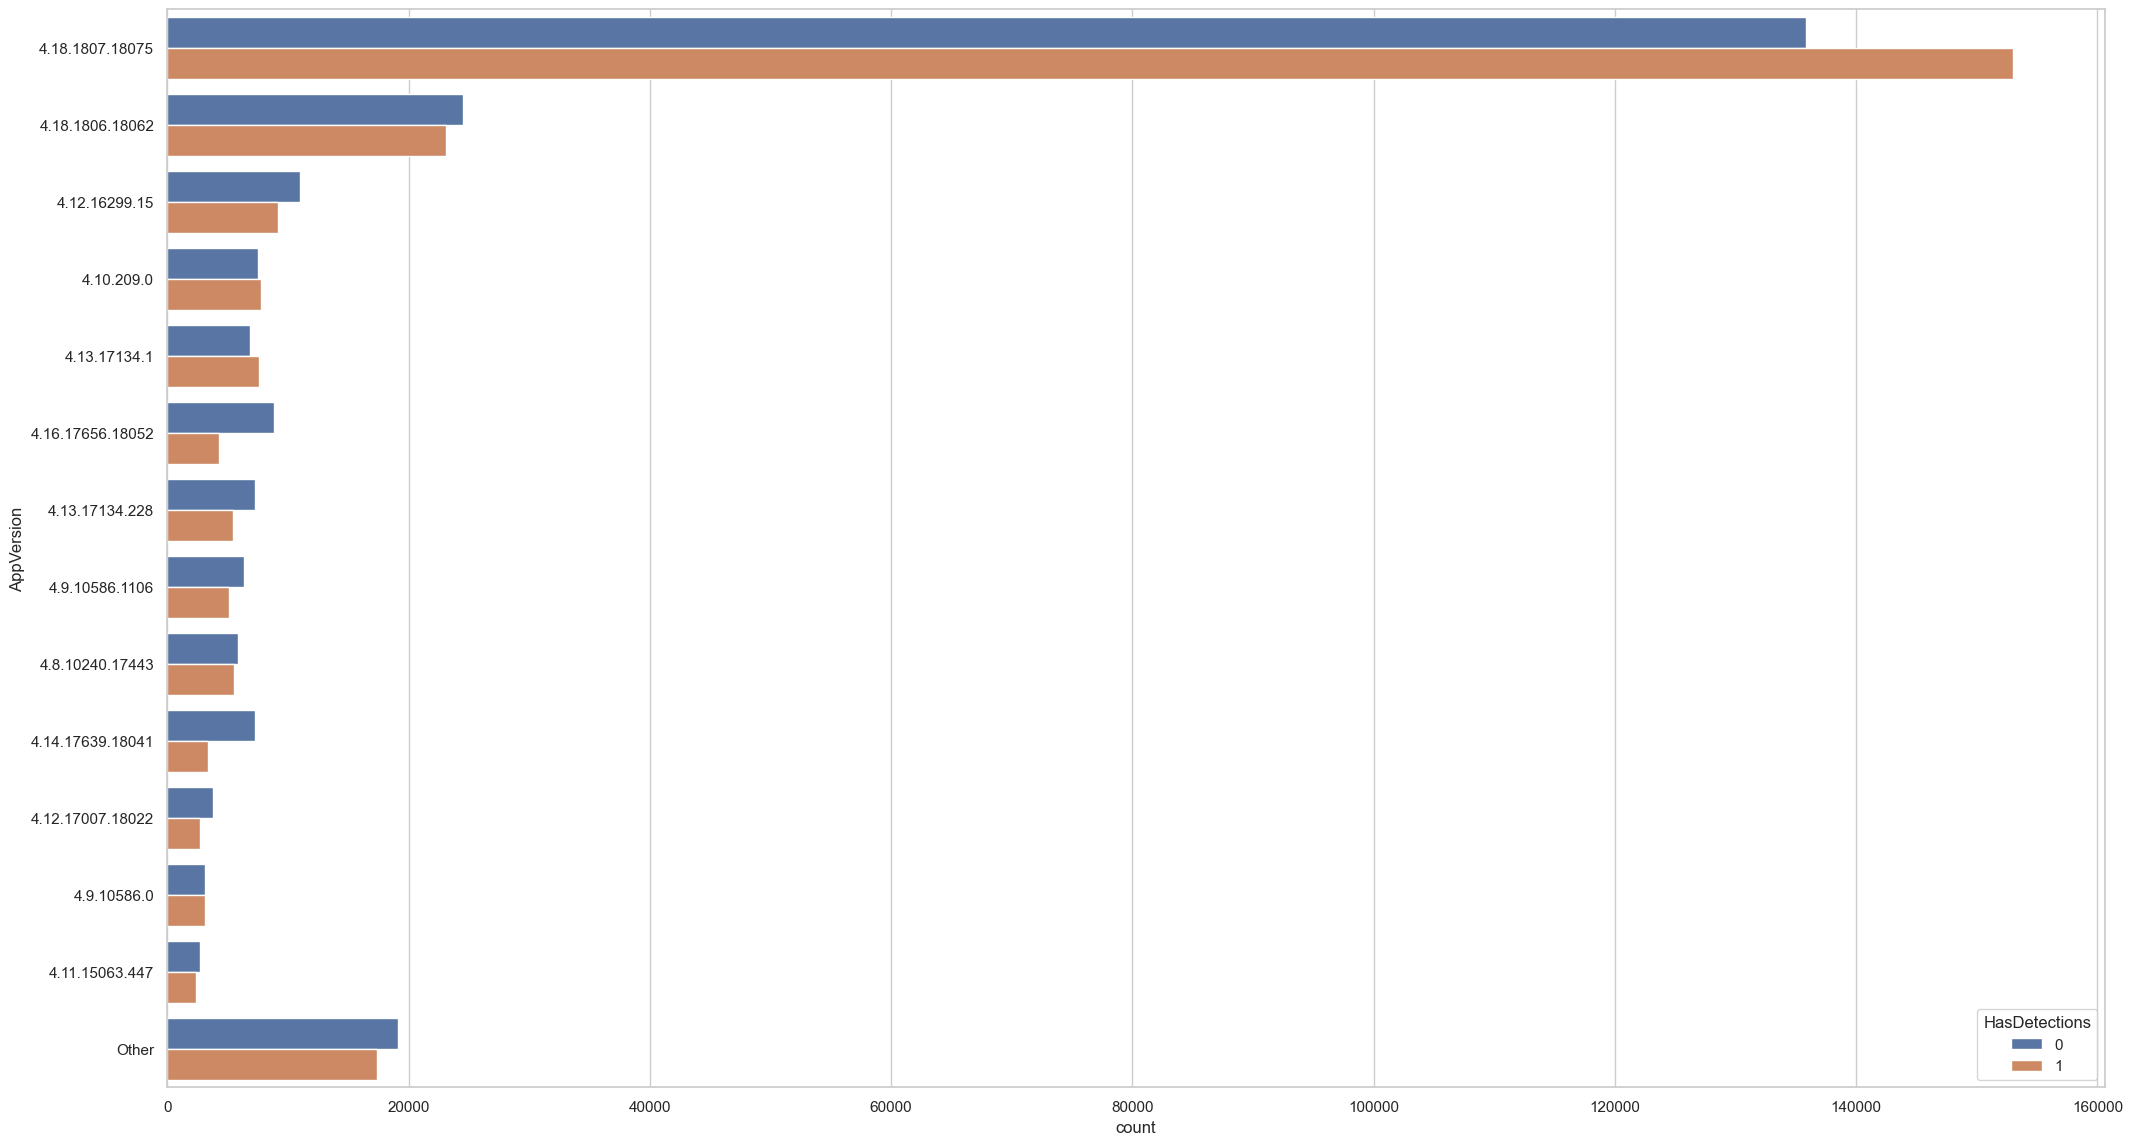

In [110]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)


####AvSigVersion

In [111]:
df5['AvSigVersion'].value_counts(normalize=True)

1.273.1420.0   0.012
1.263.48.0     0.011
1.275.1140.0   0.011
1.275.727.0    0.010
1.273.371.0    0.010
                ... 
1.235.450.0    0.000
1.225.3320.0   0.000
1.233.294.0    0.000
1.229.892.0    0.000
1.235.1538.0   0.000
Name: AvSigVersion, Length: 6455, dtype: float64

In [112]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='AvSigVersion'
agrupado='Other'

In [113]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

0         Other
1         Other
2         Other
3         Other
4         Other
          ...  
499995    Other
499996    Other
499997    Other
499998    Other
499999    Other
Name: AvSigVersion, Length: 500000, dtype: category
Categories (5, object): ['1.273.1420.0', '1.263.48.0', '1.275.1140.0', '1.275.727.0', 'Other']

In [114]:
explore_columns(df5,V)

Value_counts:
500000
Unique elements:
5
Total nulls:
0
Column info:
count     500000
unique         5
top        Other
freq      478161
Name: AvSigVersion, dtype: object


,Infections,Users,% Infections
AvSigVersion,,,
1.273.1420.0,3313,5771,57.408
1.263.48.0,2597,5537,46.903
1.275.1140.0,2423,5317,45.571
1.275.727.0,2619,5214,50.230
Other,239001,478161,49.983


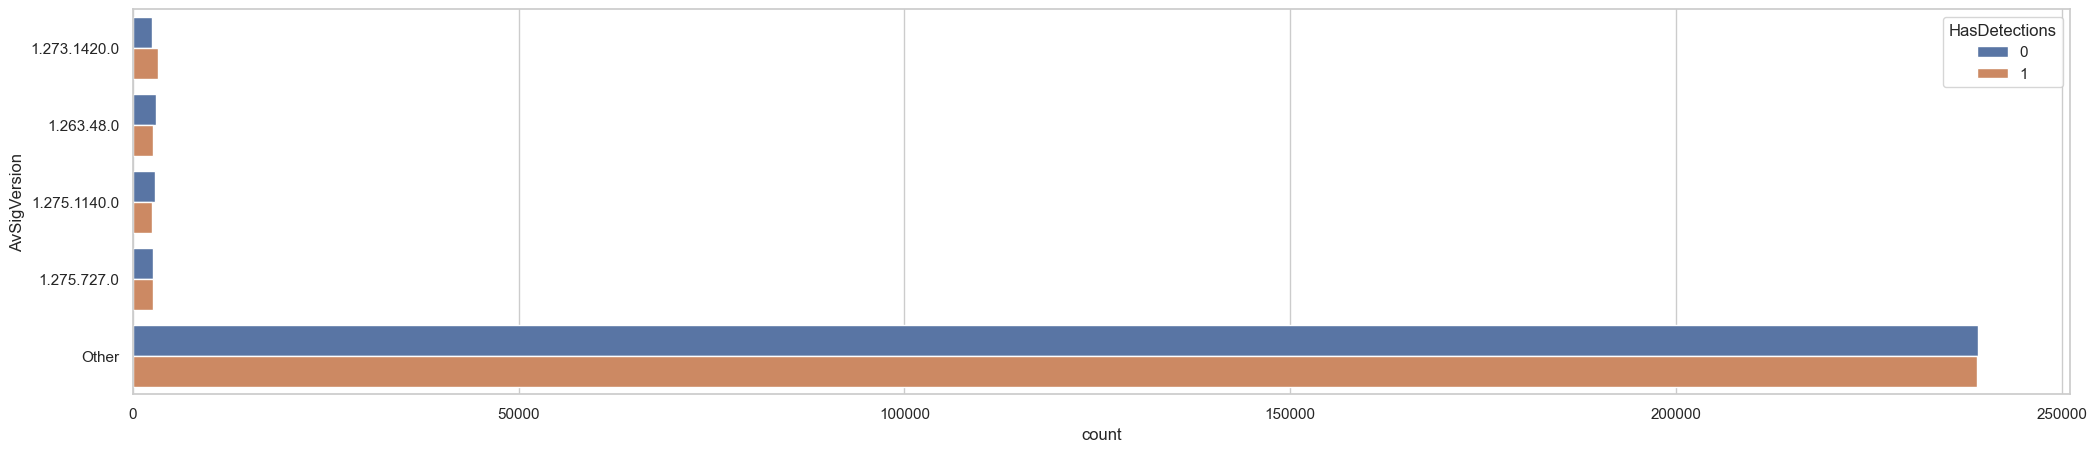

In [115]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

In [116]:
df5['AvSigVersion'].value_counts(normalize=True)

Other          0.956
1.273.1420.0   0.012
1.263.48.0     0.011
1.275.1140.0   0.011
1.275.727.0    0.010
Name: AvSigVersion, dtype: float64

El modelo probablement ignorará esta variable, ya después de agrupar los valores que no aparecían ni el 1% de las veces, estos suman el 96% y tienen una distribución respecto al target igual 

####AVProductStatesIdentifier

In [117]:
df5['AVProductStatesIdentifier'].value_counts(normalize=True) 

53447.000   0.655
7945.000    0.053
47238.000   0.037
62773.000   0.030
46413.000   0.013
             ... 
2451.000    0.000
19604.000   0.000
3193.000    0.000
26492.000   0.000
18324.000   0.000
Name: AVProductStatesIdentifier, Length: 5516, dtype: float64

In [118]:
df5['AVProductStatesIdentifier'].isnull().sum()

1938

In [119]:
df5['AVProductStatesIdentifier'].fillna(value='Unknown', inplace=True)

In [120]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='AVProductStatesIdentifier'
agrupado='Other'

In [121]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

0        53447.000
1        53447.000
2            Other
3        53447.000
4        47238.000
            ...   
499995   53447.000
499996   53447.000
499997   53447.000
499998       Other
499999   53447.000
Name: AVProductStatesIdentifier, Length: 500000, dtype: category
Categories (9, object): [53447.000, 7945.000, 47238.000, 62773.000, ..., 23657.000, 49480.000, 41571.000, 'Other']

In [122]:
explore_columns(df5,V)

Value_counts:
500000
Unique elements:
9
Total nulls:
0
Column info:
count    500000.000
unique        9.000
top       53447.000
freq     326463.000
Name: AVProductStatesIdentifier, dtype: float64


,Infections,Users,% Infections
AVProductStatesIdentifier,,,
53447.0,181517,326463,55.601
7945.0,9356,26642,35.117
47238.0,8525,18436,46.241
62773.0,5672,14931,37.988
46413.0,3109,6343,49.015
23657.0,2382,5717,41.665
49480.0,2298,5684,40.429
41571.0,1643,5472,30.026
Other,35451,90312,39.254


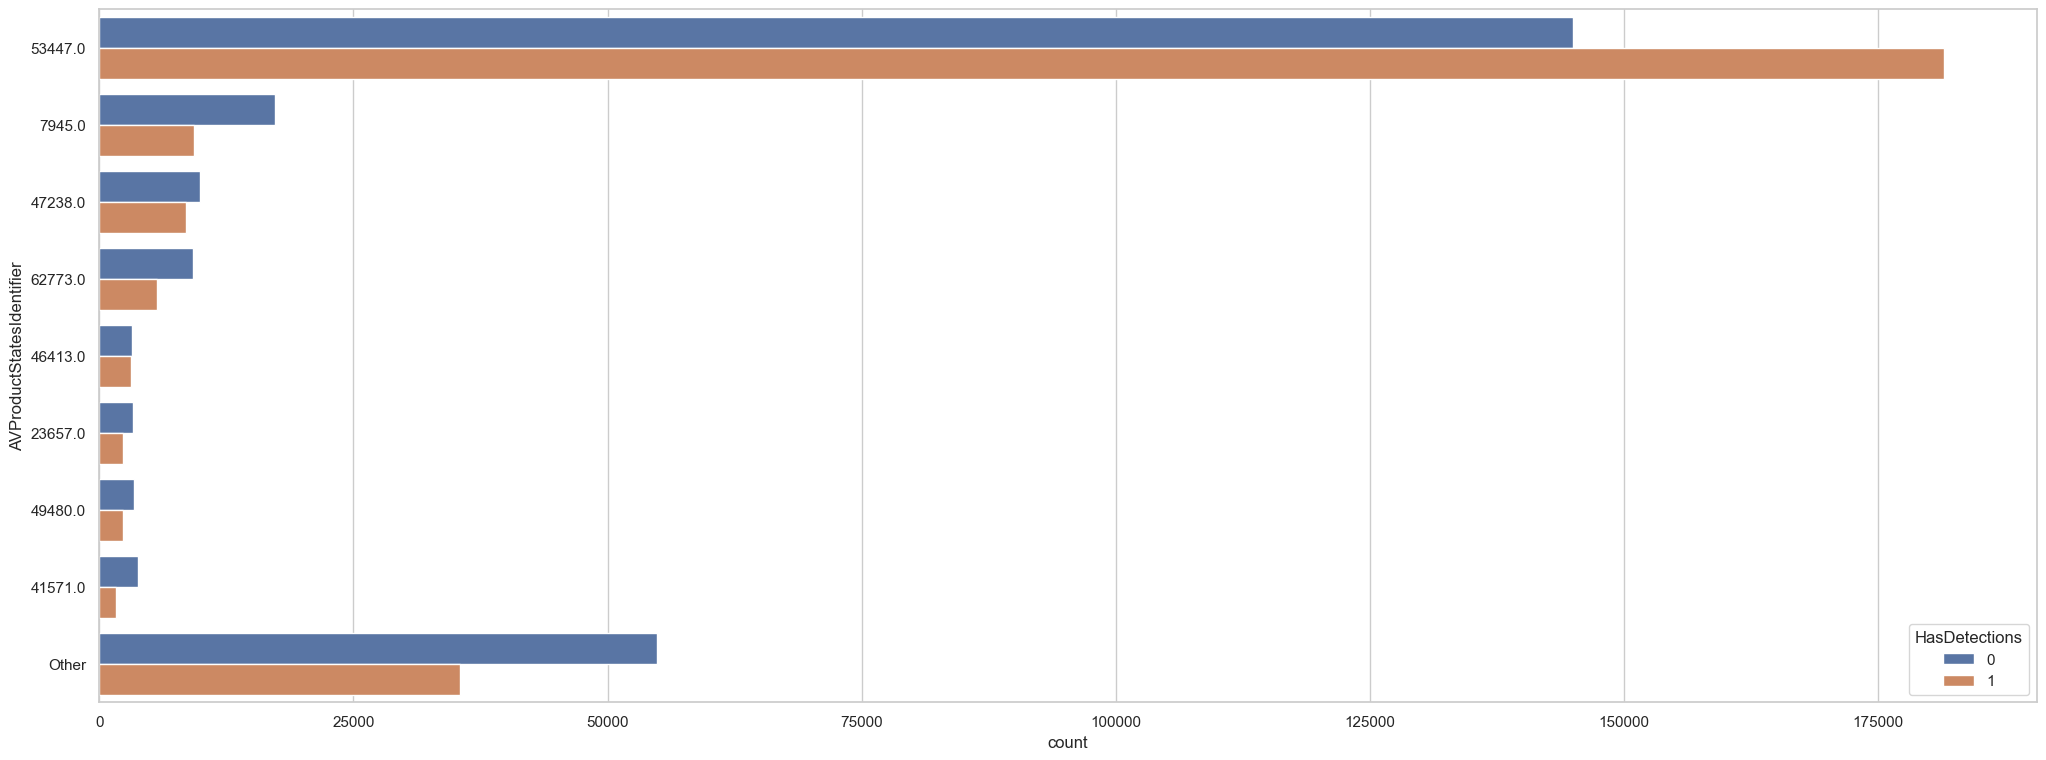

In [123]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####CountryIdentifier

In [124]:
df5['CountryIdentifier'].value_counts(normalize=True)

43    0.045
29    0.039
141   0.037
93    0.032
171   0.031
       ... 
212   0.000
37    0.000
165   0.000
217   0.000
193   0.000
Name: CountryIdentifier, Length: 222, dtype: float64

In [125]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='CountryIdentifier'
agrupado='Other'

In [126]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

0         Other
1         Other
2           149
3           164
4           207
          ...  
499995    Other
499996      149
499997       93
499998      195
499999       35
Name: CountryIdentifier, Length: 500000, dtype: category
Categories (32, object): [43, 29, 141, 93, ..., 173, 88, 159, 'Other']

In [127]:
explore_columns(df5,V)

Value_counts:
500000
Unique elements:
32
Total nulls:
0
Column info:
count     500000
unique        32
top        Other
freq      179435
Name: CountryIdentifier, dtype: object


,Infections,Users,% Infections
CountryIdentifier,,,
43,11511,22339,51.529
29,9775,19273,50.719
141,9598,18420,52.106
93,7947,16205,49.040
171,7881,15743,50.060
60,6440,13118,49.093
201,6363,12405,51.294
207,5734,11981,47.859
66,5608,11607,48.316


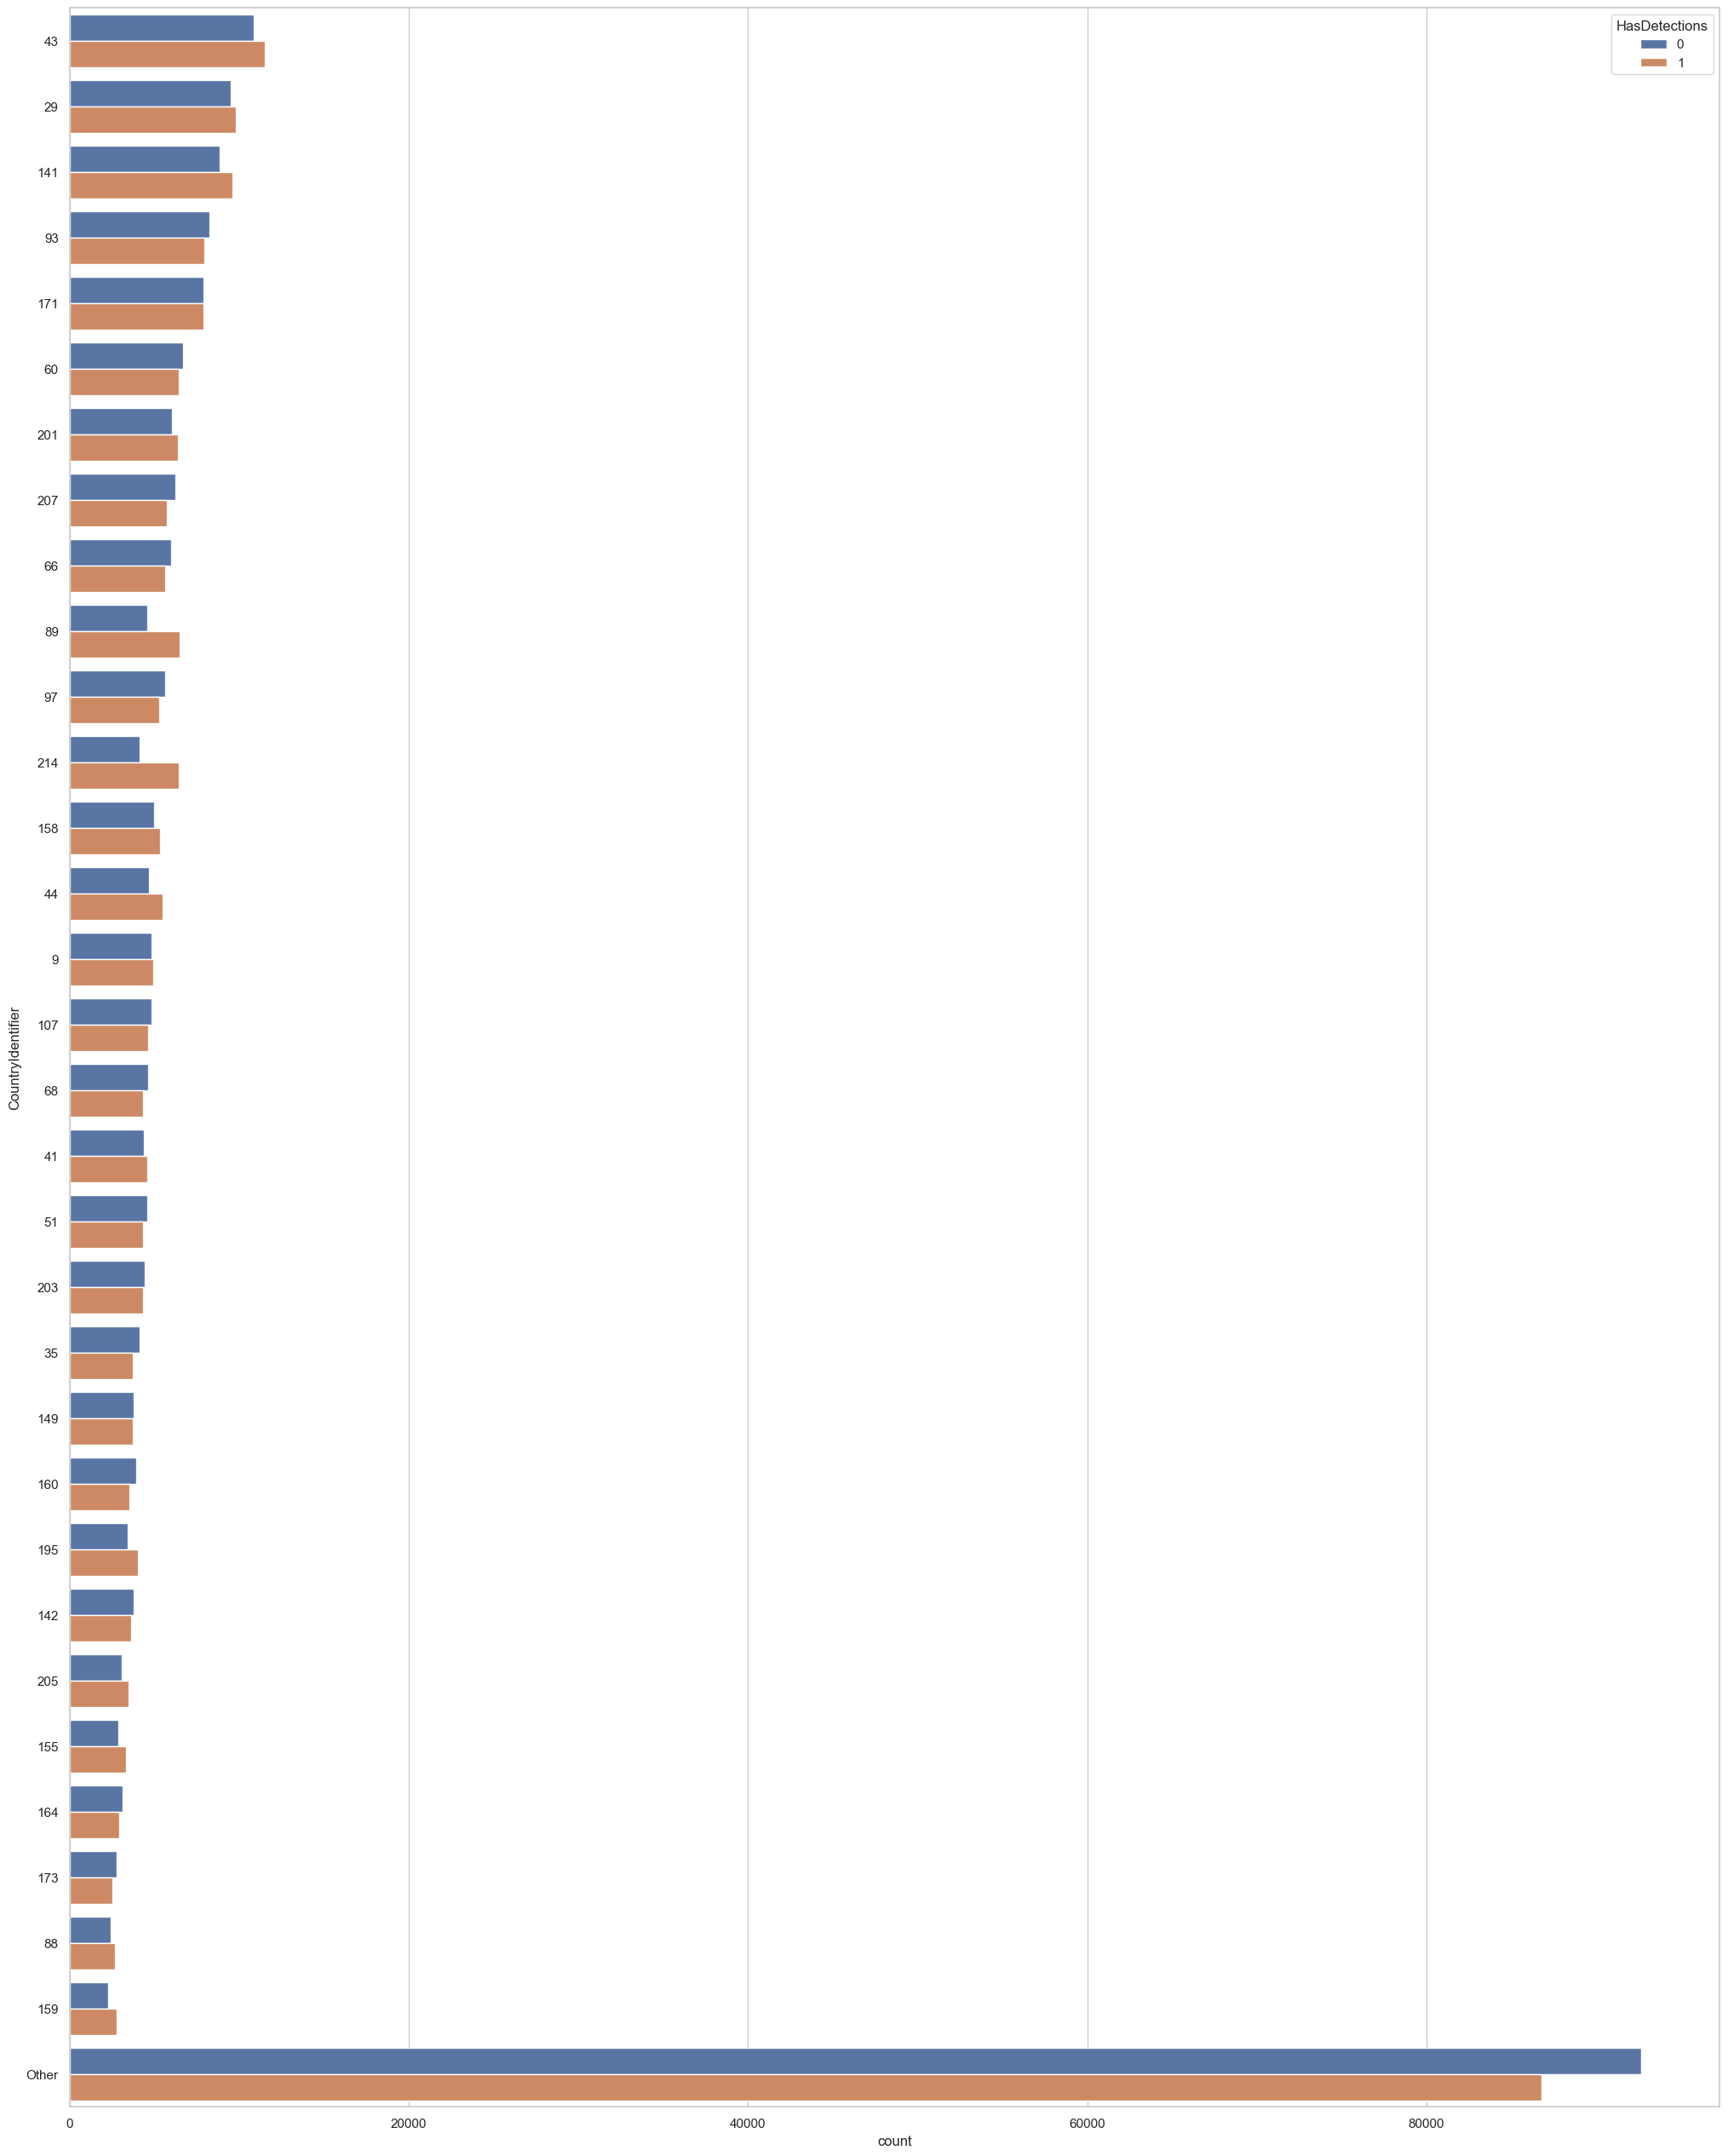

In [128]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####CityIdentifier

In [129]:
df5['CityIdentifier'].value_counts(normalize=True)

130775.000   0.011
16668.000    0.010
82373.000    0.010
10222.000    0.008
61668.000    0.008
              ... 
151632.000   0.000
41727.000    0.000
83230.000    0.000
131294.000   0.000
148194.000   0.000
Name: CityIdentifier, Length: 37157, dtype: float64

In [130]:
df5['CityIdentifier'].fillna(value='Nulos', inplace=True)

In [131]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='CityIdentifier'
agrupado='Other'

In [132]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
3
Total nulls:
0
Column info:
count     500000
unique         3
top        Other
freq      476489
Name: CityIdentifier, dtype: object


,Infections,Users,% Infections
CityIdentifier,,,
Nulos,8929,18240,48.953
130775.0,2633,5271,49.953
Other,238391,476489,50.031


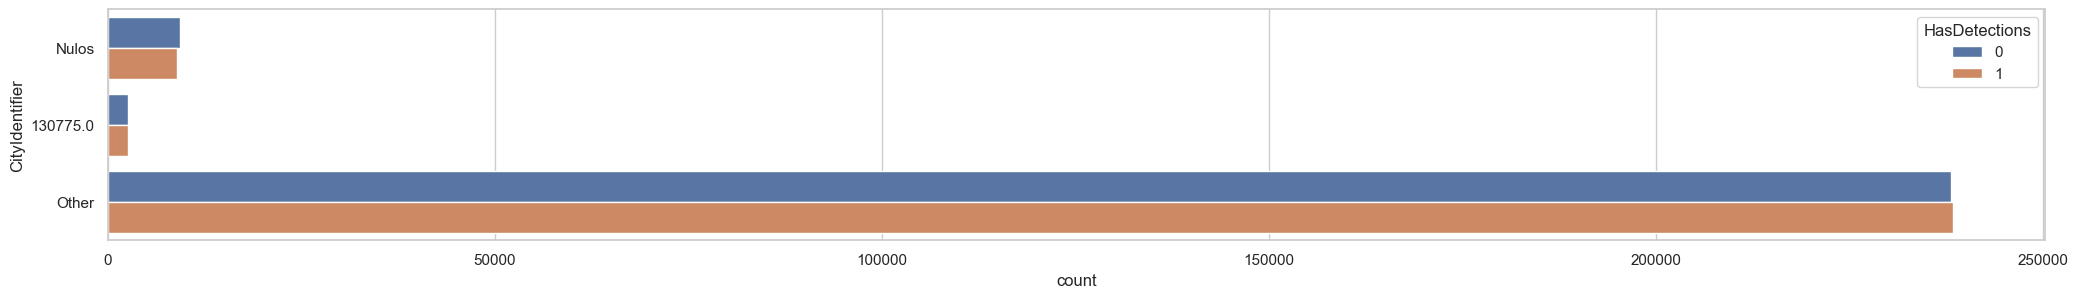

In [133]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

Variable irrelevante, drop

In [134]:
df5.drop('CityIdentifier', axis=1, inplace=True)

####OrganizationIdentifier

In [135]:
df5['OrganizationIdentifier'].value_counts(normalize=True)

27.000   0.680
18.000   0.286
48.000   0.011
50.000   0.007
37.000   0.003
11.000   0.003
49.000   0.002
46.000   0.002
14.000   0.001
32.000   0.001
36.000   0.001
52.000   0.001
33.000   0.000
2.000    0.000
5.000    0.000
40.000   0.000
28.000   0.000
4.000    0.000
10.000   0.000
51.000   0.000
1.000    0.000
20.000   0.000
8.000    0.000
6.000    0.000
31.000   0.000
47.000   0.000
22.000   0.000
39.000   0.000
3.000    0.000
21.000   0.000
16.000   0.000
19.000   0.000
29.000   0.000
42.000   0.000
7.000    0.000
44.000   0.000
26.000   0.000
43.000   0.000
45.000   0.000
41.000   0.000
35.000   0.000
23.000   0.000
25.000   0.000
17.000   0.000
Name: OrganizationIdentifier, dtype: float64

In [136]:
df5['OrganizationIdentifier'].isnull().sum()

154563

In [137]:
df5['OrganizationIdentifier'].fillna(value='Unspecified', inplace=True)

In [138]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='OrganizationIdentifier'
agrupado='Minors'

In [139]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
4
Total nulls:
0
Column info:
count    500000.000
unique        4.000
top          27.000
freq     234885.000
Name: OrganizationIdentifier, dtype: float64


,Infections,Users,% Infections
OrganizationIdentifier,,,
27.0,117224,234885,49.907
Unspecified,76762,154563,49.664
18.0,49863,98842,50.447
Minors,6104,11710,52.126


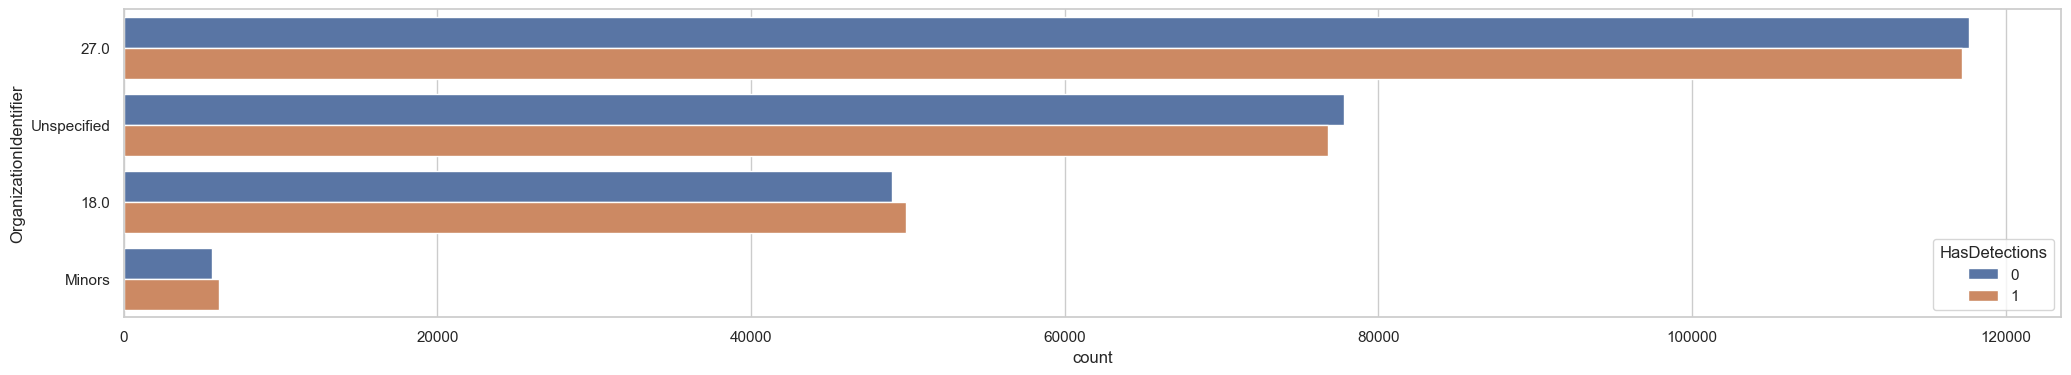

In [140]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####GeoNameIdentifier

In [141]:
df5['GeoNameIdentifier'].value_counts(normalize=True)

277.000   0.172
211.000   0.047
53.000    0.046
89.000    0.040
240.000   0.039
           ... 
280.000   0.000
231.000   0.000
113.000   0.000
221.000   0.000
132.000   0.000
Name: GeoNameIdentifier, Length: 268, dtype: float64

In [142]:
df5['GeoNameIdentifier'].fillna(value='Unspecified', inplace=True)

In [143]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='GeoNameIdentifier'
agrupado='Other'

In [144]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
28
Total nulls:
0
Column info:
count     500000
unique        28
top        Other
freq      123382
Name: GeoNameIdentifier, dtype: object


,Infections,Users,% Infections
GeoNameIdentifier,,,
277.0,43944,86080,51.050
211.0,11840,23593,50.184
53.0,11994,22977,52.200
89.0,9486,20174,47.021
240.0,9772,19489,50.141
35.0,9762,19144,50.992
167.0,9827,18845,52.146
276.0,7758,16600,46.735
267.0,6284,12106,51.908


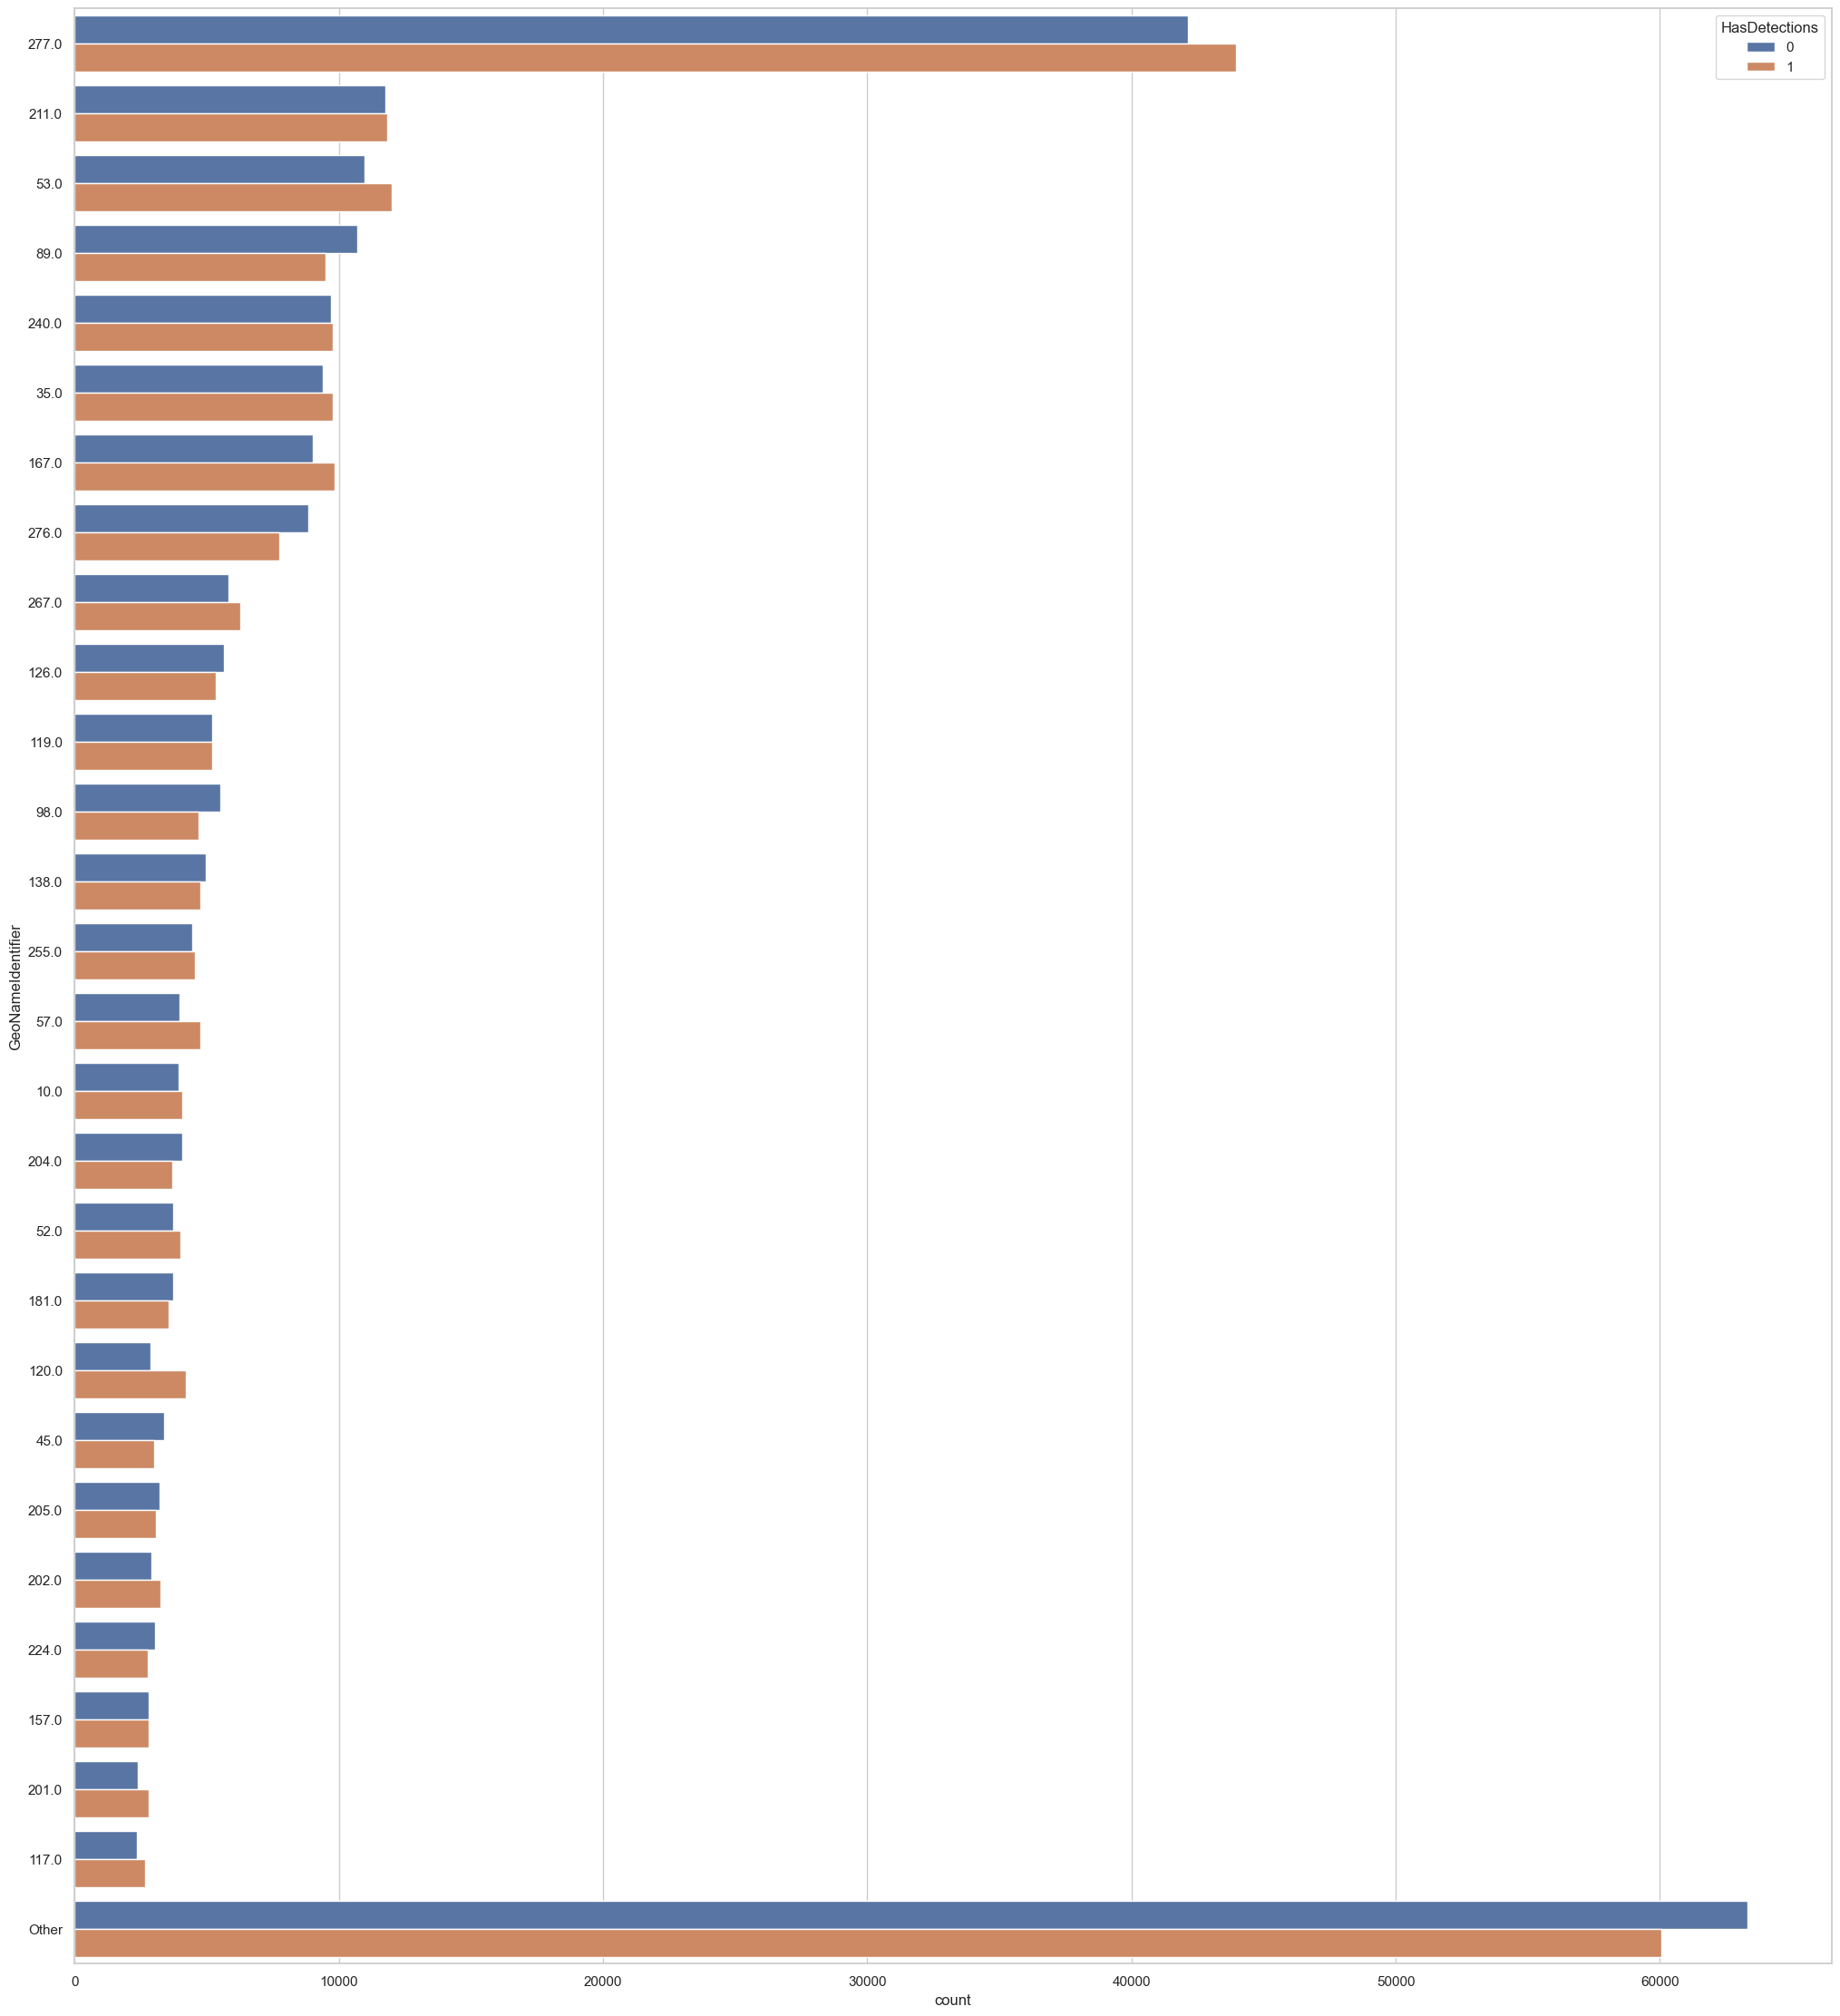

In [145]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####LocaleEnglishNameIdentifier

In [146]:
df5['LocaleEnglishNameIdentifier'].value_counts(normalize=True)

75    0.236
182   0.050
42    0.046
74    0.046
88    0.042
       ... 
152   0.000
155   0.000
165   0.000
190   0.000
127   0.000
Name: LocaleEnglishNameIdentifier, Length: 233, dtype: float64

In [147]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='LocaleEnglishNameIdentifier'
agrupado='Other'

In [148]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
25
Total nulls:
0
Column info:
count     500000
unique        25
top           75
freq      117818
Name: LocaleEnglishNameIdentifier, dtype: int64


,Infections,Users,% Infections
LocaleEnglishNameIdentifier,,,
75,60664,117818,51.490
182,12718,25187,50.494
42,12036,23007,52.315
74,10720,22894,46.824
88,9802,20988,46.703
233,9662,19225,50.257
171,9719,19027,51.080
227,9626,18427,52.239
251,6194,11889,52.099


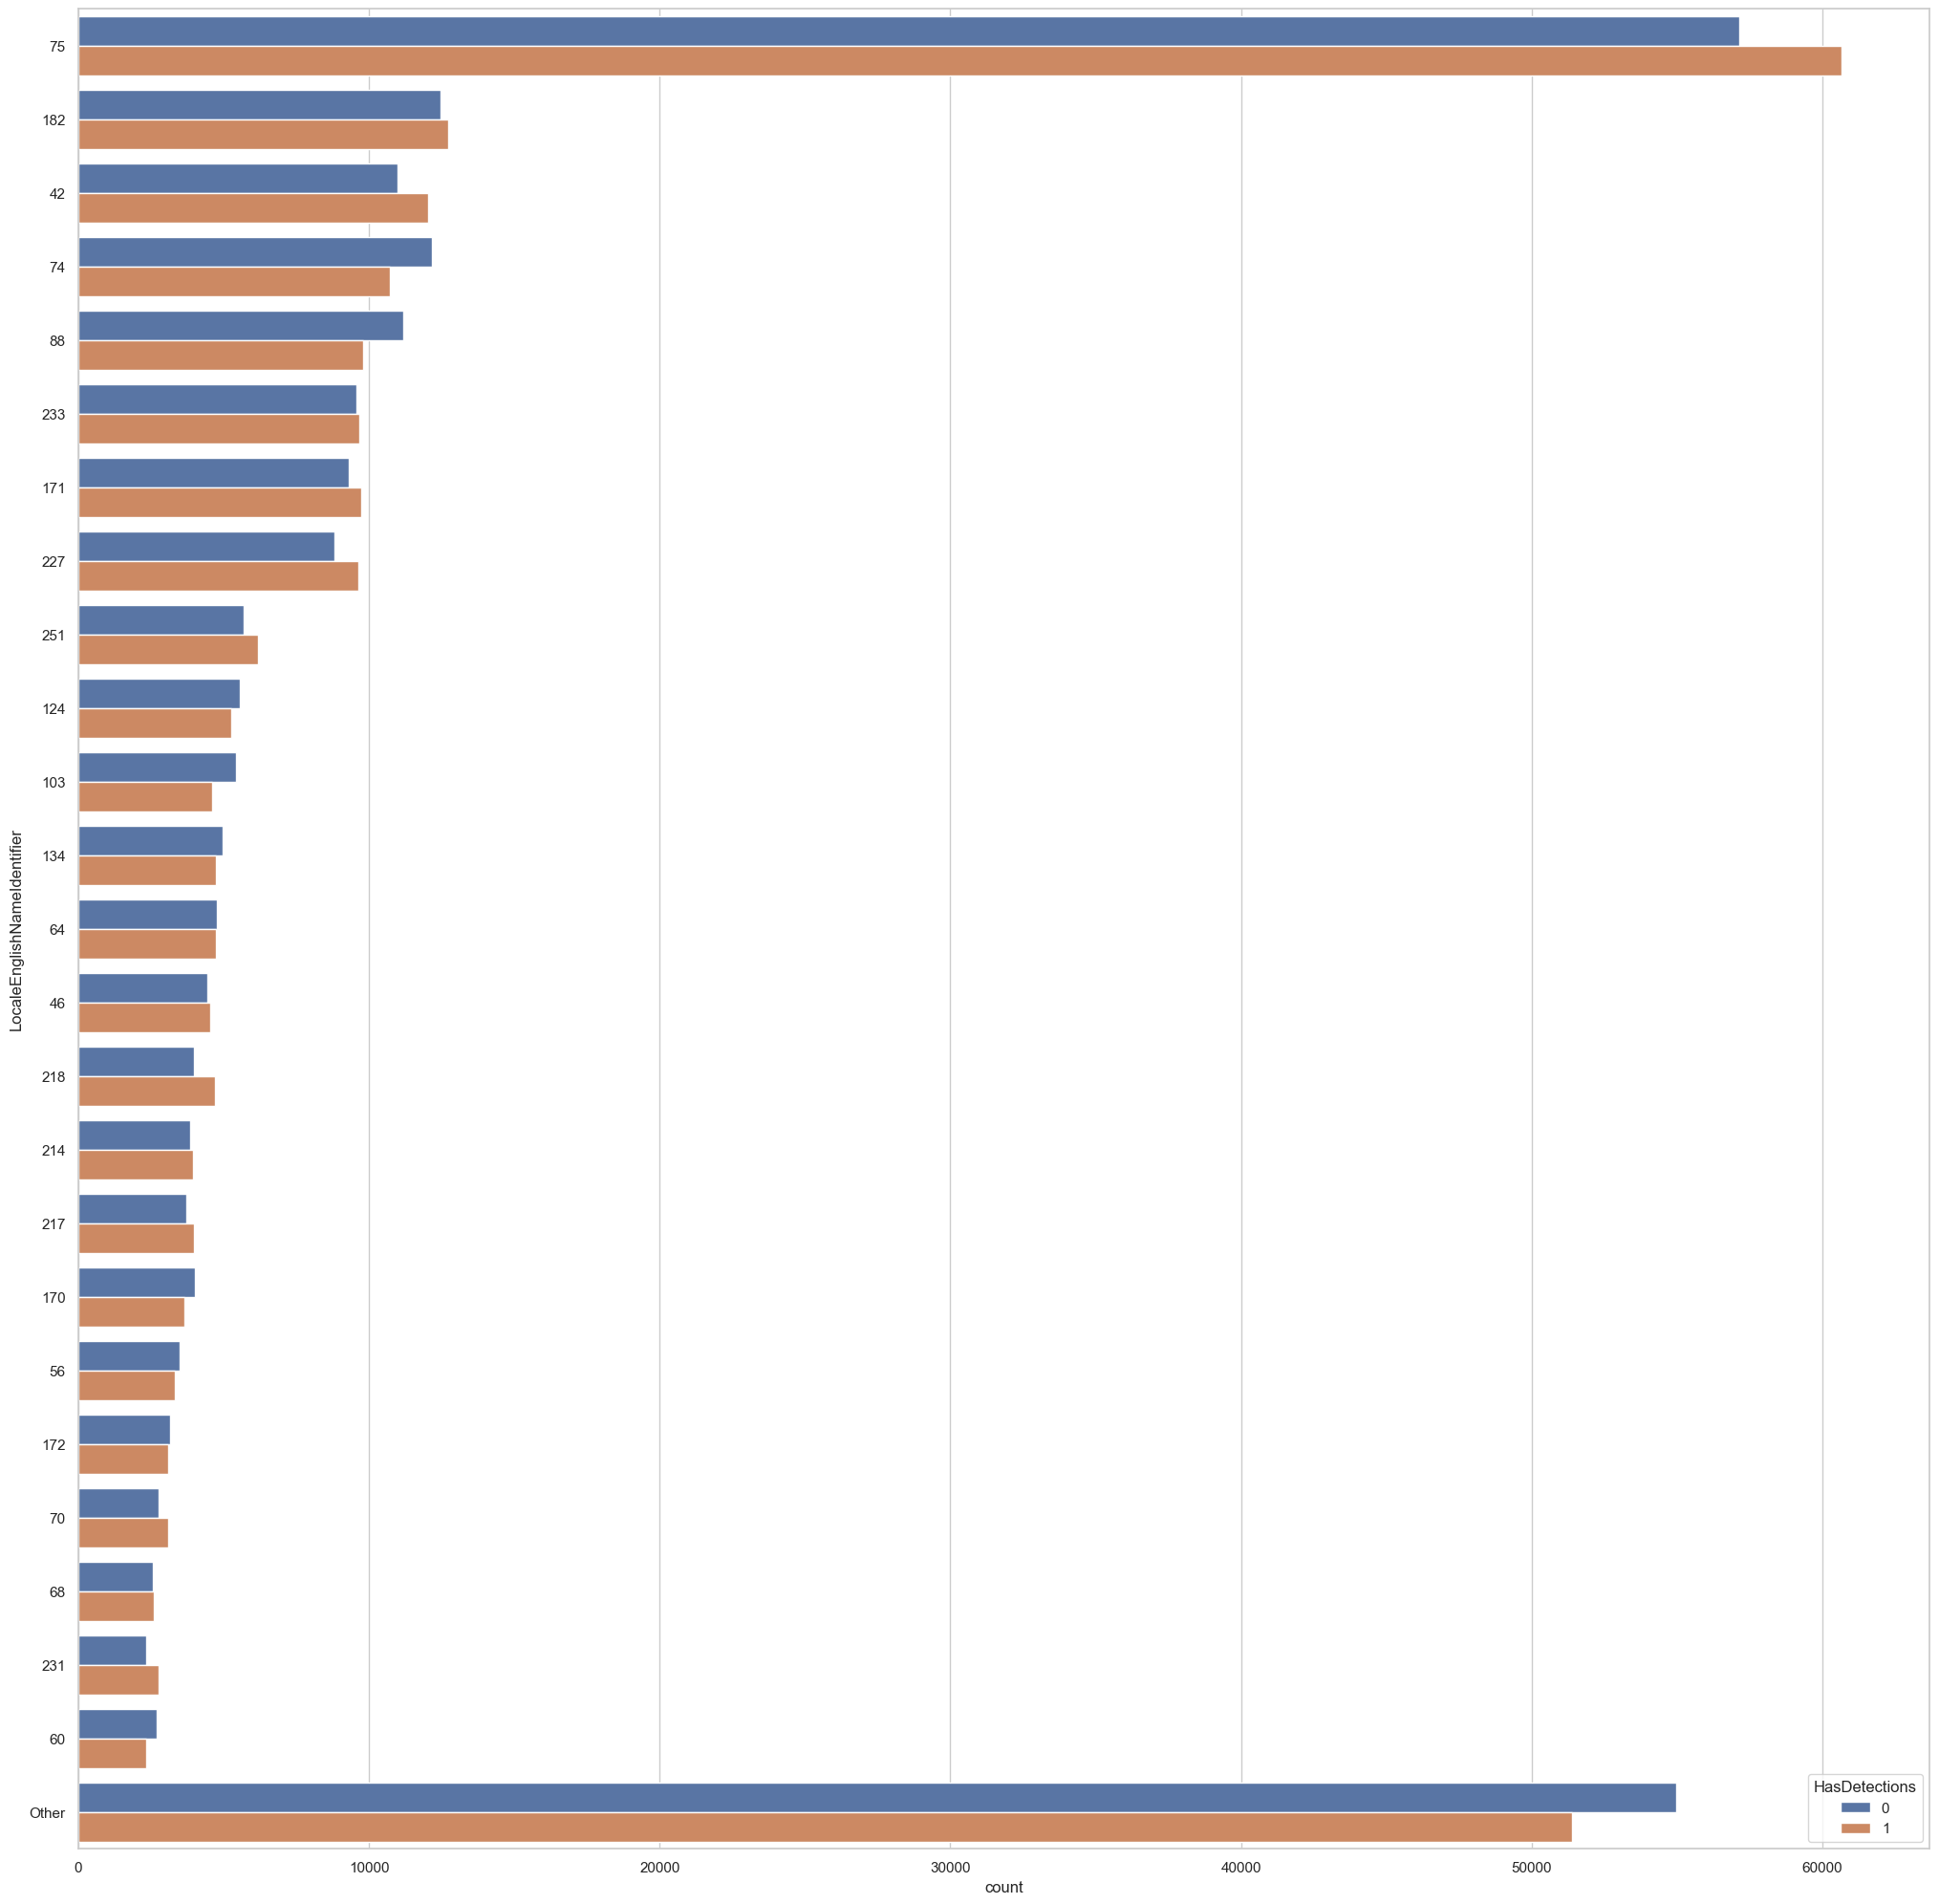

In [149]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####OsPlatformSubRelease

In [150]:
df5['OsPlatformSubRelease'].value_counts(normalize=True)

rs4          0.442
rs3          0.280
rs2          0.087
rs1          0.081
th2          0.046
th1          0.030
windows8.1   0.022
windows7     0.011
prers5       0.002
Name: OsPlatformSubRelease, dtype: float64

In [151]:
#darle a V el valor de la variable que estamos trabajando
V='OsPlatformSubRelease'
agrupado='Other'

#en este caso solo hay un valor con freq < 1% por lo que no llamamos la función para agrupar

,Infections,Users,% Infections
OsPlatformSubRelease,,,
prers5,503,1143,44.007
rs1,18848,40717,46.290
rs2,20778,43352,47.929
rs3,68735,139901,49.131
rs4,114996,220779,52.086
th1,7309,15014,48.681
th2,10608,22955,46.212
windows7,2562,5314,48.212
windows8.1,5614,10825,51.861


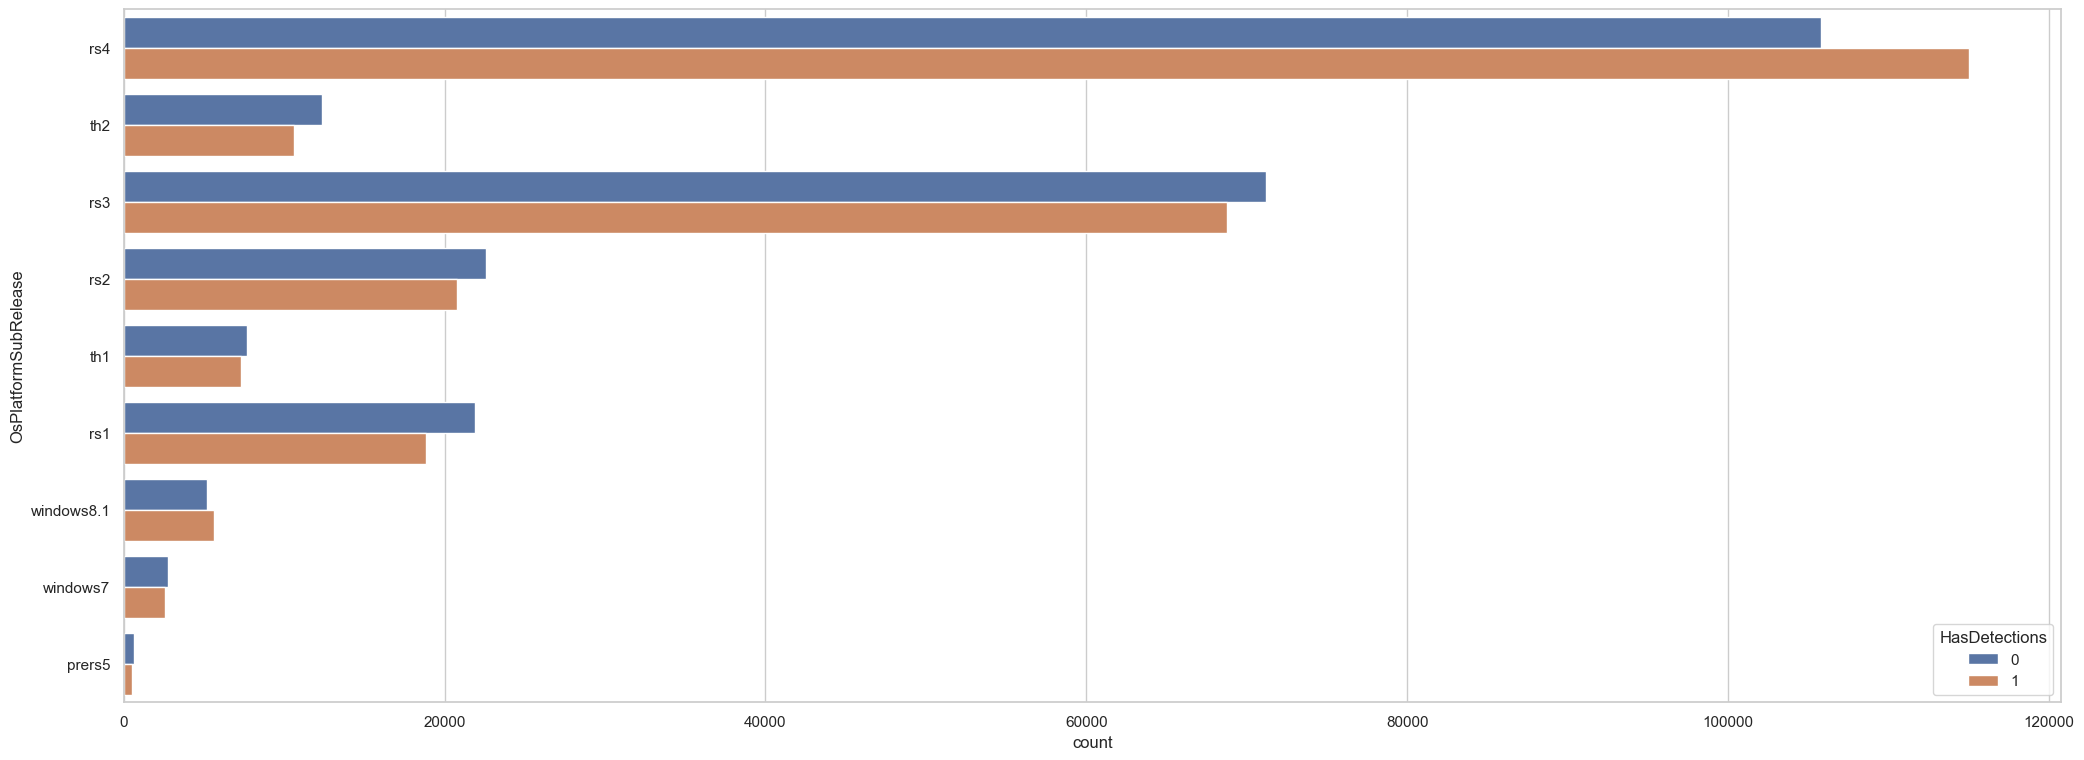

In [152]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####OsBuildLab



In [153]:
df5['OsBuildLab'].value_counts(normalize=True)

17134.1.amd64fre.rs4_release.180410-1804                0.413
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908   0.140
16299.15.amd64fre.rs3_release.170928-1534               0.108
15063.0.amd64fre.rs2_release.170317-1834                0.080
17134.1.x86fre.rs4_release.180410-1804                  0.029
                                                         ... 
17604.1000.amd64fre.rs_prerelease.180209-1422           0.000
9600.17041.amd64fre.winblue_gdr.140305-1710             0.000
9600.18146.x86fre.winblue_ltsb.151121-0600              0.000
18214.1000.amd64fre.rs_prerelease.180803-1553           0.000
9600.18007.amd64fre.winblue_ltsb.150807-0612            0.000
Name: OsBuildLab, Length: 453, dtype: float64

In [154]:
df5['OsBuildLab'].fillna(value='Unspecified', inplace=True)

In [155]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='OsBuildLab'
agrupado='Other'

In [156]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
10
Total nulls:
0
Column info:
count                                       500000
unique                                          10
top       17134.1.amd64fre.rs4_release.180410-1804
freq                                        206436
Name: OsBuildLab, dtype: object


,Infections,Users,% Infections
OsBuildLab,,,
17134.1.amd64fre.rs4_release.180410-1804,109335,206436,52.963
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908,36047,69884,51.581
16299.15.amd64fre.rs3_release.170928-1534,26378,53826,49.006
15063.0.amd64fre.rs2_release.170317-1834,19454,39908,48.747
17134.1.x86fre.rs4_release.180410-1804,5661,14334,39.494
16299.15.x86fre.rs3_release.170928-1534,4810,13105,36.704
14393.2189.amd64fre.rs1_release.180329-1711,5393,10724,50.289
10240.17443.amd64fre.th1.170602-2340,4758,9538,49.885
10586.1176.amd64fre.th2_release_sec.170913-1848,3778,8385,45.057


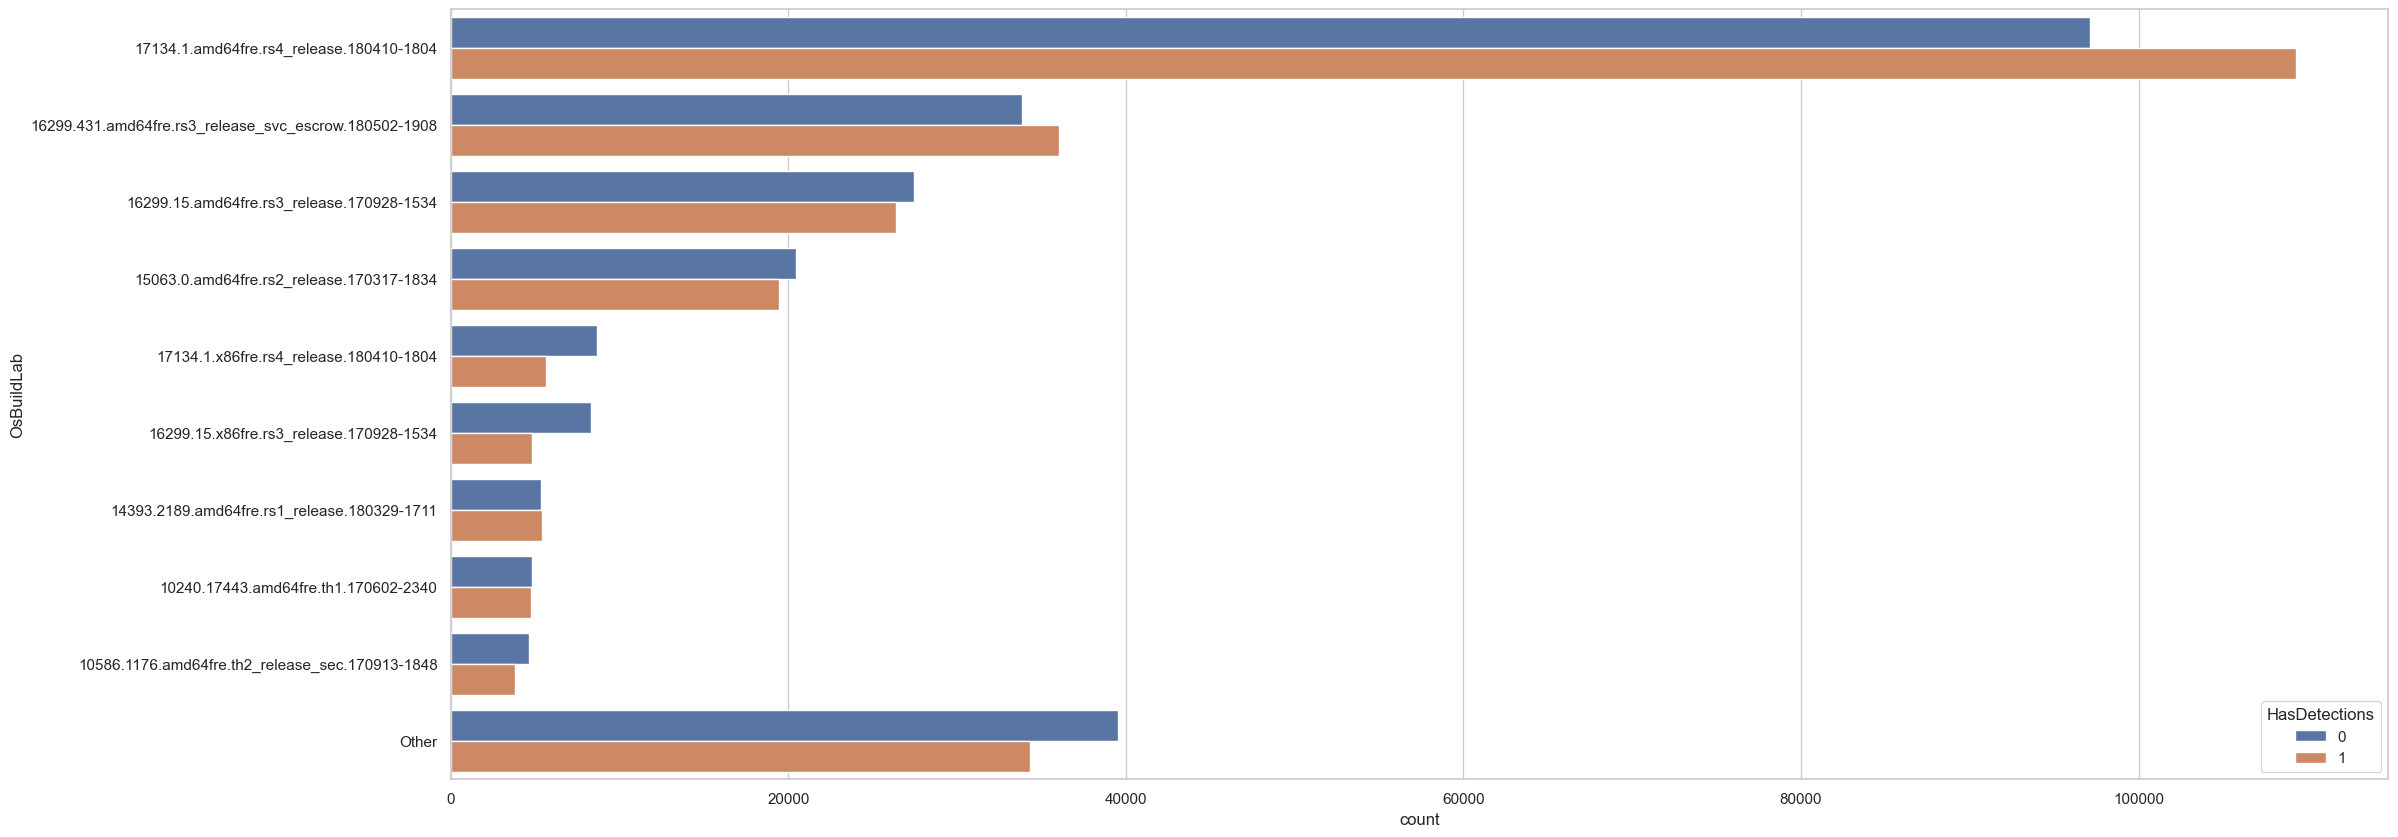

In [157]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####SkuEdition

In [158]:
df5['SkuEdition'].value_counts(normalize=True)

Home              0.617
Pro               0.362
Invalid           0.009
Education         0.005
Enterprise        0.004
Enterprise LTSB   0.002
Cloud             0.001
Server            0.000
Name: SkuEdition, dtype: float64

In [159]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='SkuEdition'
agrupado='Other'

In [160]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
3
Total nulls:
0
Column info:
count     500000
unique         3
top         Home
freq      308567
Name: SkuEdition, dtype: object


,Infections,Users,% Infections
SkuEdition,,,
Home,152007,308567,49.262
Pro,92853,181042,51.288
Other,5093,10391,49.014


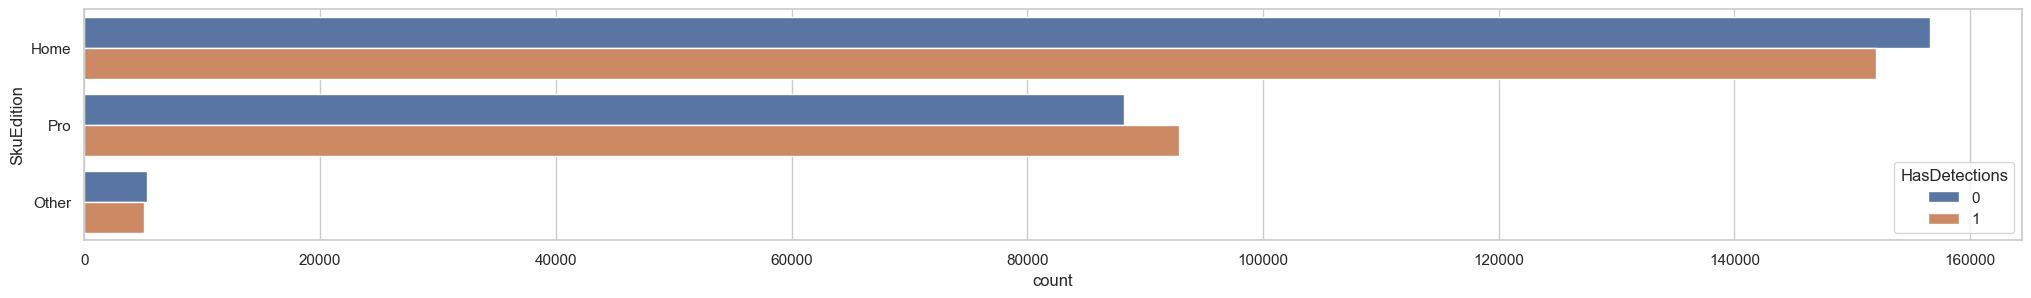

In [161]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####SmartScreen


In [162]:
df5['SmartScreen'].value_counts(normalize=True)

RequireAdmin   0.752
ExistsNotSet   0.182
Off            0.032
Warn           0.023
Prompt         0.006
Block          0.004
off            0.000
On             0.000
&#x02;         0.000
&#x01;         0.000
on             0.000
requireadmin   0.000
Name: SmartScreen, dtype: float64

In [163]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='SmartScreen'
agrupado='Other'

In [164]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
5
Total nulls:
0
Column info:
count           500000
unique               5
top       RequireAdmin
freq            241594
Name: SmartScreen, dtype: object


,Infections,Users,% Infections
SmartScreen,,,
RequireAdmin,105890,241594,43.830
ExistsNotSet,47115,58497,80.543
Off,5055,10388,48.662
Warn,4306,7530,57.185
Other,87587,181991,48.127


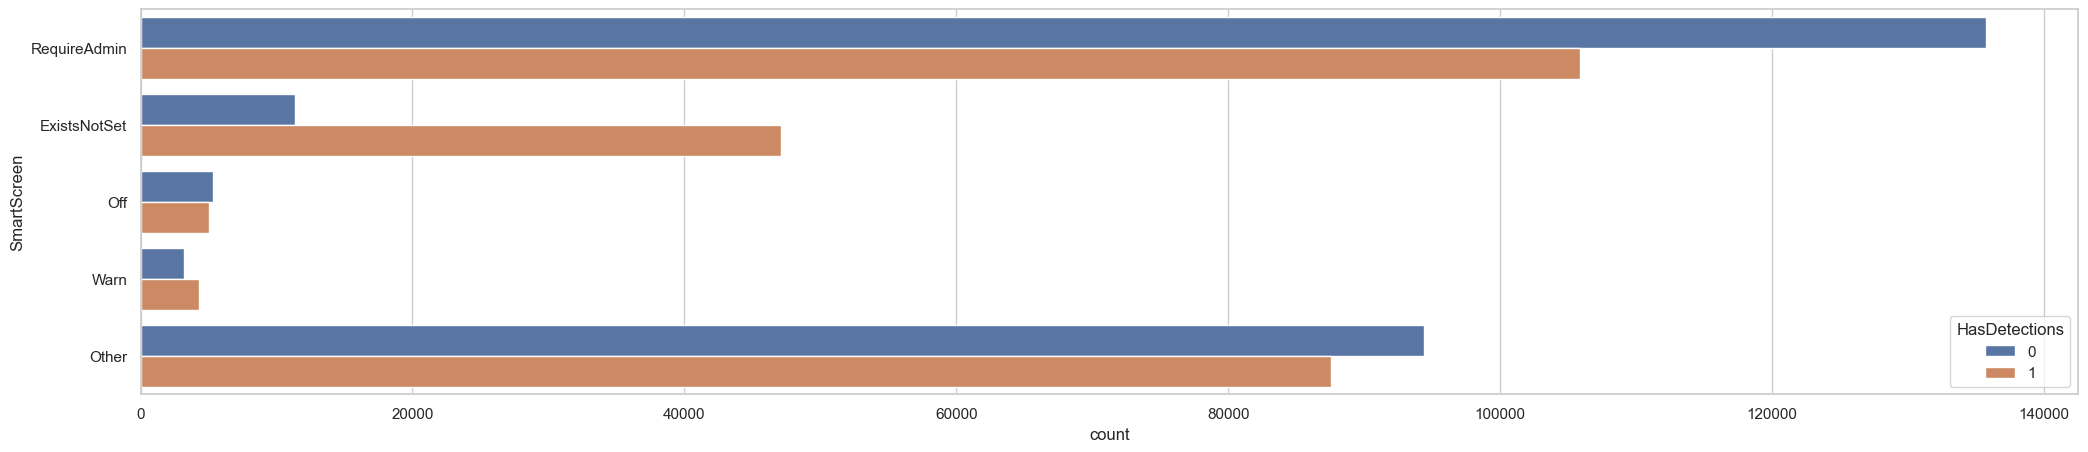

In [165]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_MDC2FormFactor

In [166]:
df5['Census_MDC2FormFactor'].value_counts(normalize=True)

Notebook       0.642
Desktop        0.219
Convertible    0.045
Detachable     0.034
AllInOne       0.033
PCOther        0.016
LargeTablet    0.007
SmallTablet    0.004
SmallServer    0.001
MediumServer   0.000
LargeServer    0.000
ServerOther    0.000
Name: Census_MDC2FormFactor, dtype: float64

In [167]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_MDC2FormFactor'
agrupado='Other'

In [168]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
7
Total nulls:
0
Column info:
count       500000
unique           7
top       Notebook
freq        320948
Name: Census_MDC2FormFactor, dtype: object


,Infections,Users,% Infections
Census_MDC2FormFactor,,,
Notebook,161411,320948,50.292
Desktop,57306,109527,52.321
Convertible,11025,22369,49.287
Detachable,6351,16802,37.799
AllInOne,8384,16372,51.209
PCOther,3715,7800,47.628
Other,1761,6182,28.486


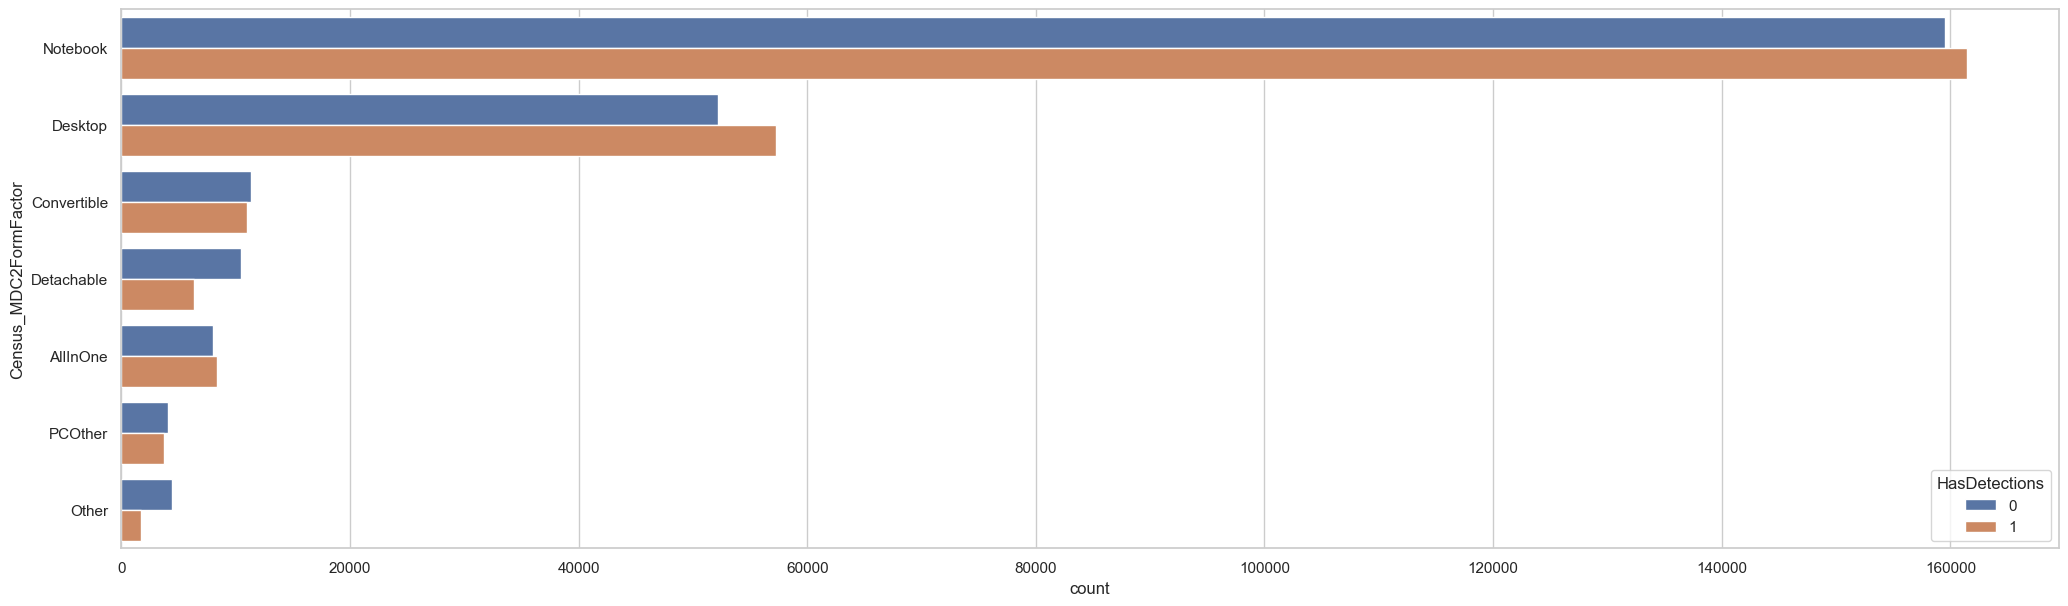

In [169]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_PrimaryDiskTypeName

In [170]:
df5['Census_PrimaryDiskTypeName'].value_counts(normalize=True)

HDD           0.652
SSD           0.277
UNKNOWN       0.040
Unspecified   0.031
Name: Census_PrimaryDiskTypeName, dtype: float64

In [171]:
df5['Census_PrimaryDiskTypeName'].fillna(value='Unknown', inplace=True)

In [172]:
df5['Census_PrimaryDiskTypeName']= np.where(df5['Census_PrimaryDiskTypeName'] == 'UNKNOWN', 'Unknown',df5['Census_PrimaryDiskTypeName'])
df5['Census_PrimaryDiskTypeName']= np.where(df5['Census_PrimaryDiskTypeName'] == 'Unspecified', 'Unknown',df5['Census_PrimaryDiskTypeName'])


In [173]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_PrimaryDiskTypeName'
agrupado='Other'

,Infections,Users,% Infections
Census_PrimaryDiskTypeName,,,
HDD,164762,325429,50.629
SSD,68821,138155,49.814
Unknown,16370,36416,44.953


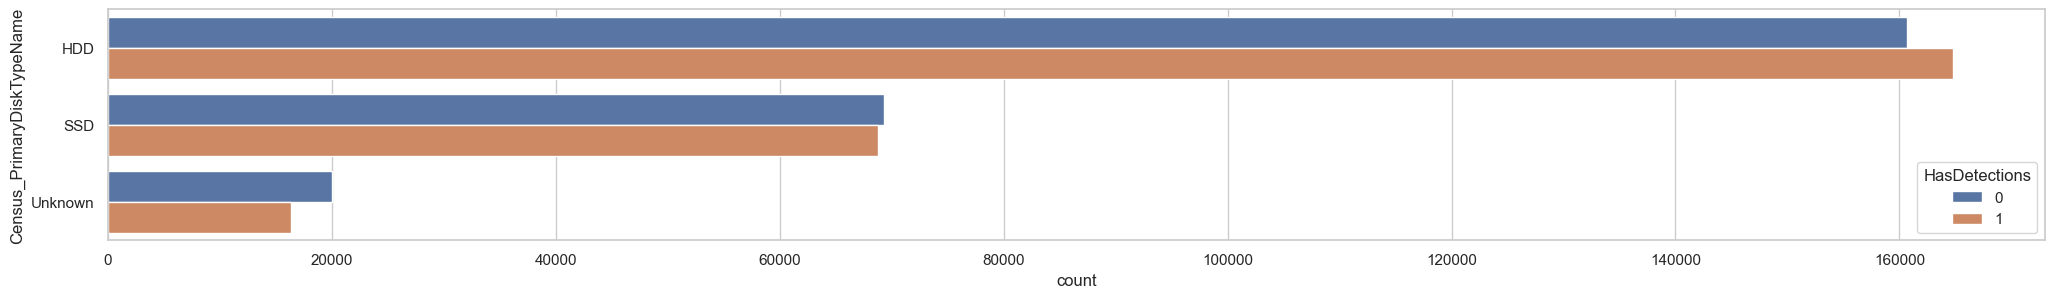

In [174]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_ChassisTypeName

In [175]:
df5['Census_ChassisTypeName'].value_counts(normalize=True)

Notebook              0.589
Desktop               0.210
Laptop                0.077
Portable              0.040
AllinOne              0.023
MiniTower             0.010
Convertible           0.009
Other                 0.008
UNKNOWN               0.007
Detachable            0.006
LowProfileDesktop     0.006
HandHeld              0.005
SpaceSaving           0.003
Tablet                0.001
Tower                 0.001
Unknown               0.001
MainServerChassis     0.001
MiniPC                0.001
LunchBox              0.000
RackMountChassis      0.000
SubNotebook           0.000
BusExpansionChassis   0.000
30                    0.000
StickPC               0.000
0                     0.000
MultisystemChassis    0.000
35                    0.000
PizzaBox              0.000
Blade                 0.000
31                    0.000
SubChassis            0.000
32                    0.000
ExpansionChassis      0.000
25                    0.000
Name: Census_ChassisTypeName, dtype: float64

In [176]:
df5['Census_ChassisTypeName'].fillna(value='Unknown', inplace=True)

In [177]:
df5['Census_ChassisTypeName']= np.where(df5['Census_ChassisTypeName'] == 'UNKNOWN', 'Unknown',df5['Census_ChassisTypeName'])

In [178]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_ChassisTypeName'
agrupado='Other'

In [179]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
6
Total nulls:
0
Column info:
count       500000
unique           6
top       Notebook
freq        294232
Name: Census_ChassisTypeName, dtype: object


,Infections,Users,% Infections
Census_ChassisTypeName,,,
Notebook,147270,294232,50.052
Desktop,55150,104979,52.534
Laptop,18864,38261,49.303
Portable,9696,20181,48.045
AllinOne,5831,11407,51.118
Other,13142,30940,42.476


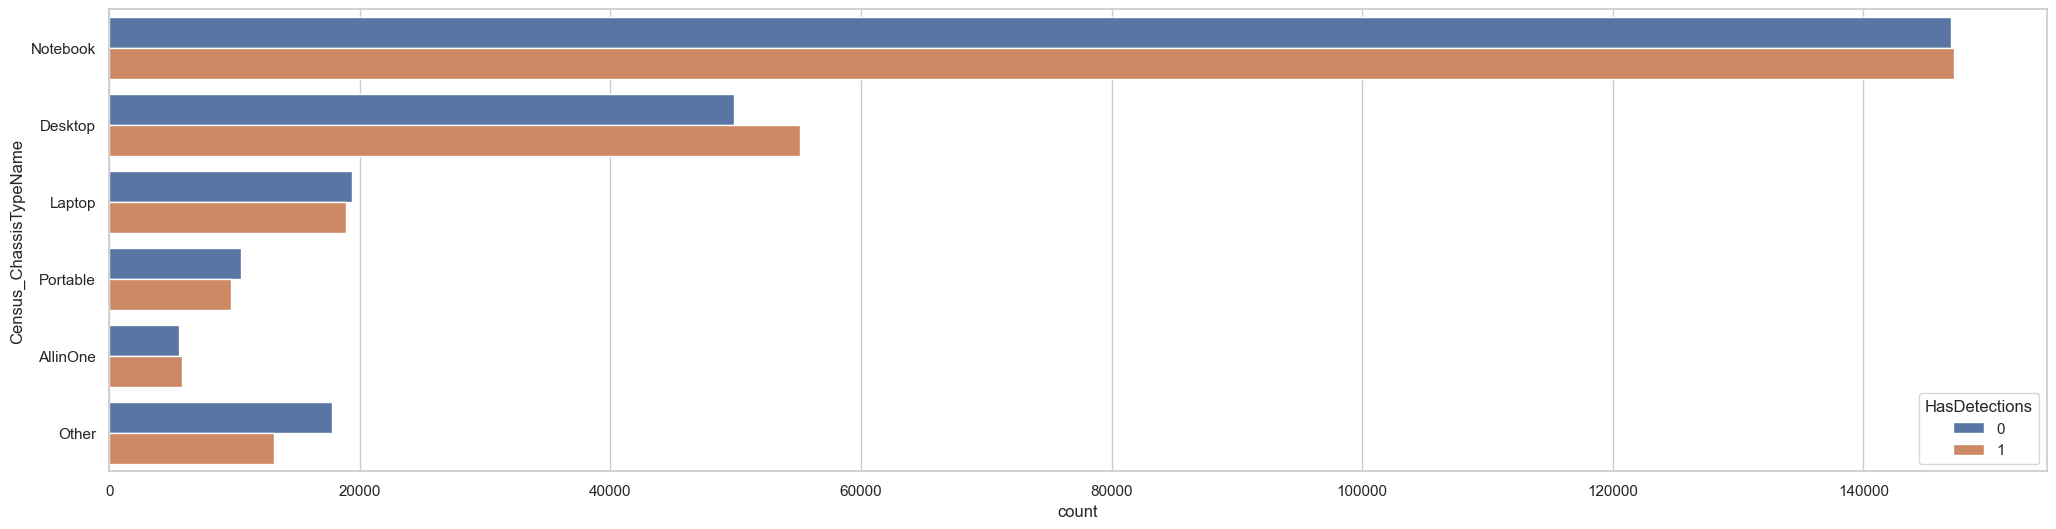

In [180]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_PowerPlatformRoleName

In [181]:
df5['Census_PowerPlatformRoleName'].value_counts(normalize=True)

Mobile              0.693
Desktop             0.232
Slate               0.055
Workstation         0.012
SOHOServer          0.004
UNKNOWN             0.002
EnterpriseServer    0.001
AppliancePC         0.000
PerformanceServer   0.000
Name: Census_PowerPlatformRoleName, dtype: float64

In [182]:
df5['Census_PowerPlatformRoleName'].fillna(value='Unknown', inplace=True)
df5['Census_PowerPlatformRoleName']= np.where(df5['Census_PowerPlatformRoleName'] == 'UNKNOWN', 'Unknown',df5['Census_PowerPlatformRoleName'])

In [183]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_PowerPlatformRoleName'
agrupado='Other'

In [184]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
5
Total nulls:
0
Column info:
count     500000
unique         5
top       Mobile
freq      346378
Name: Census_PowerPlatformRoleName, dtype: object


,Infections,Users,% Infections
Census_PowerPlatformRoleName,,,
Mobile,173910,346378,50.208
Desktop,60942,116054,52.512
Slate,10082,27475,36.695
Workstation,3198,6235,51.291
Other,1821,3858,47.201


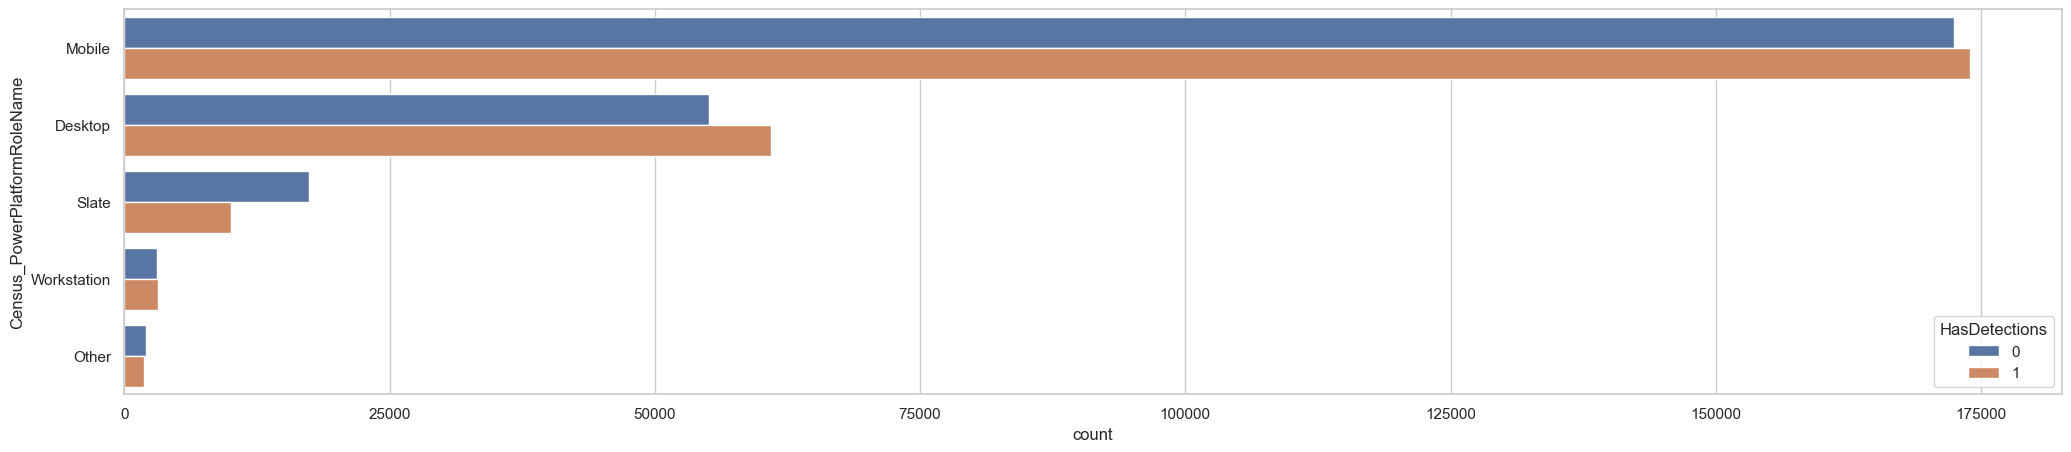

In [185]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_OSVersion

In [186]:
df5['Census_OSVersion'].value_counts(normalize=True)

10.0.17134.228    0.160
10.0.17134.165    0.101
10.0.16299.431    0.061
10.0.17134.285    0.053
10.0.17134.112    0.039
                   ... 
10.0.18214.1000   0.000
10.0.15019.1000   0.000
10.0.14328.1000   0.000
10.0.10586.601    0.000
10.0.15048.0      0.000
Name: Census_OSVersion, Length: 305, dtype: float64

In [187]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_OSVersion'
agrupado='Other'

In [188]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
23
Total nulls:
0
Column info:
count     500000
unique        23
top        Other
freq      123224
Name: Census_OSVersion, dtype: object


,Infections,Users,% Infections
Census_OSVersion,,,
10.0.17134.228,42726,79975,53.424
10.0.17134.165,28404,50511,56.233
10.0.16299.431,15207,30519,49.828
10.0.17134.285,13265,26289,50.458
10.0.17134.112,9661,19501,49.541
10.0.16299.547,10065,19179,52.479
10.0.16299.371,8274,18195,45.474
10.0.17134.191,6257,12990,48.168
10.0.14393.2189,6031,12409,48.602


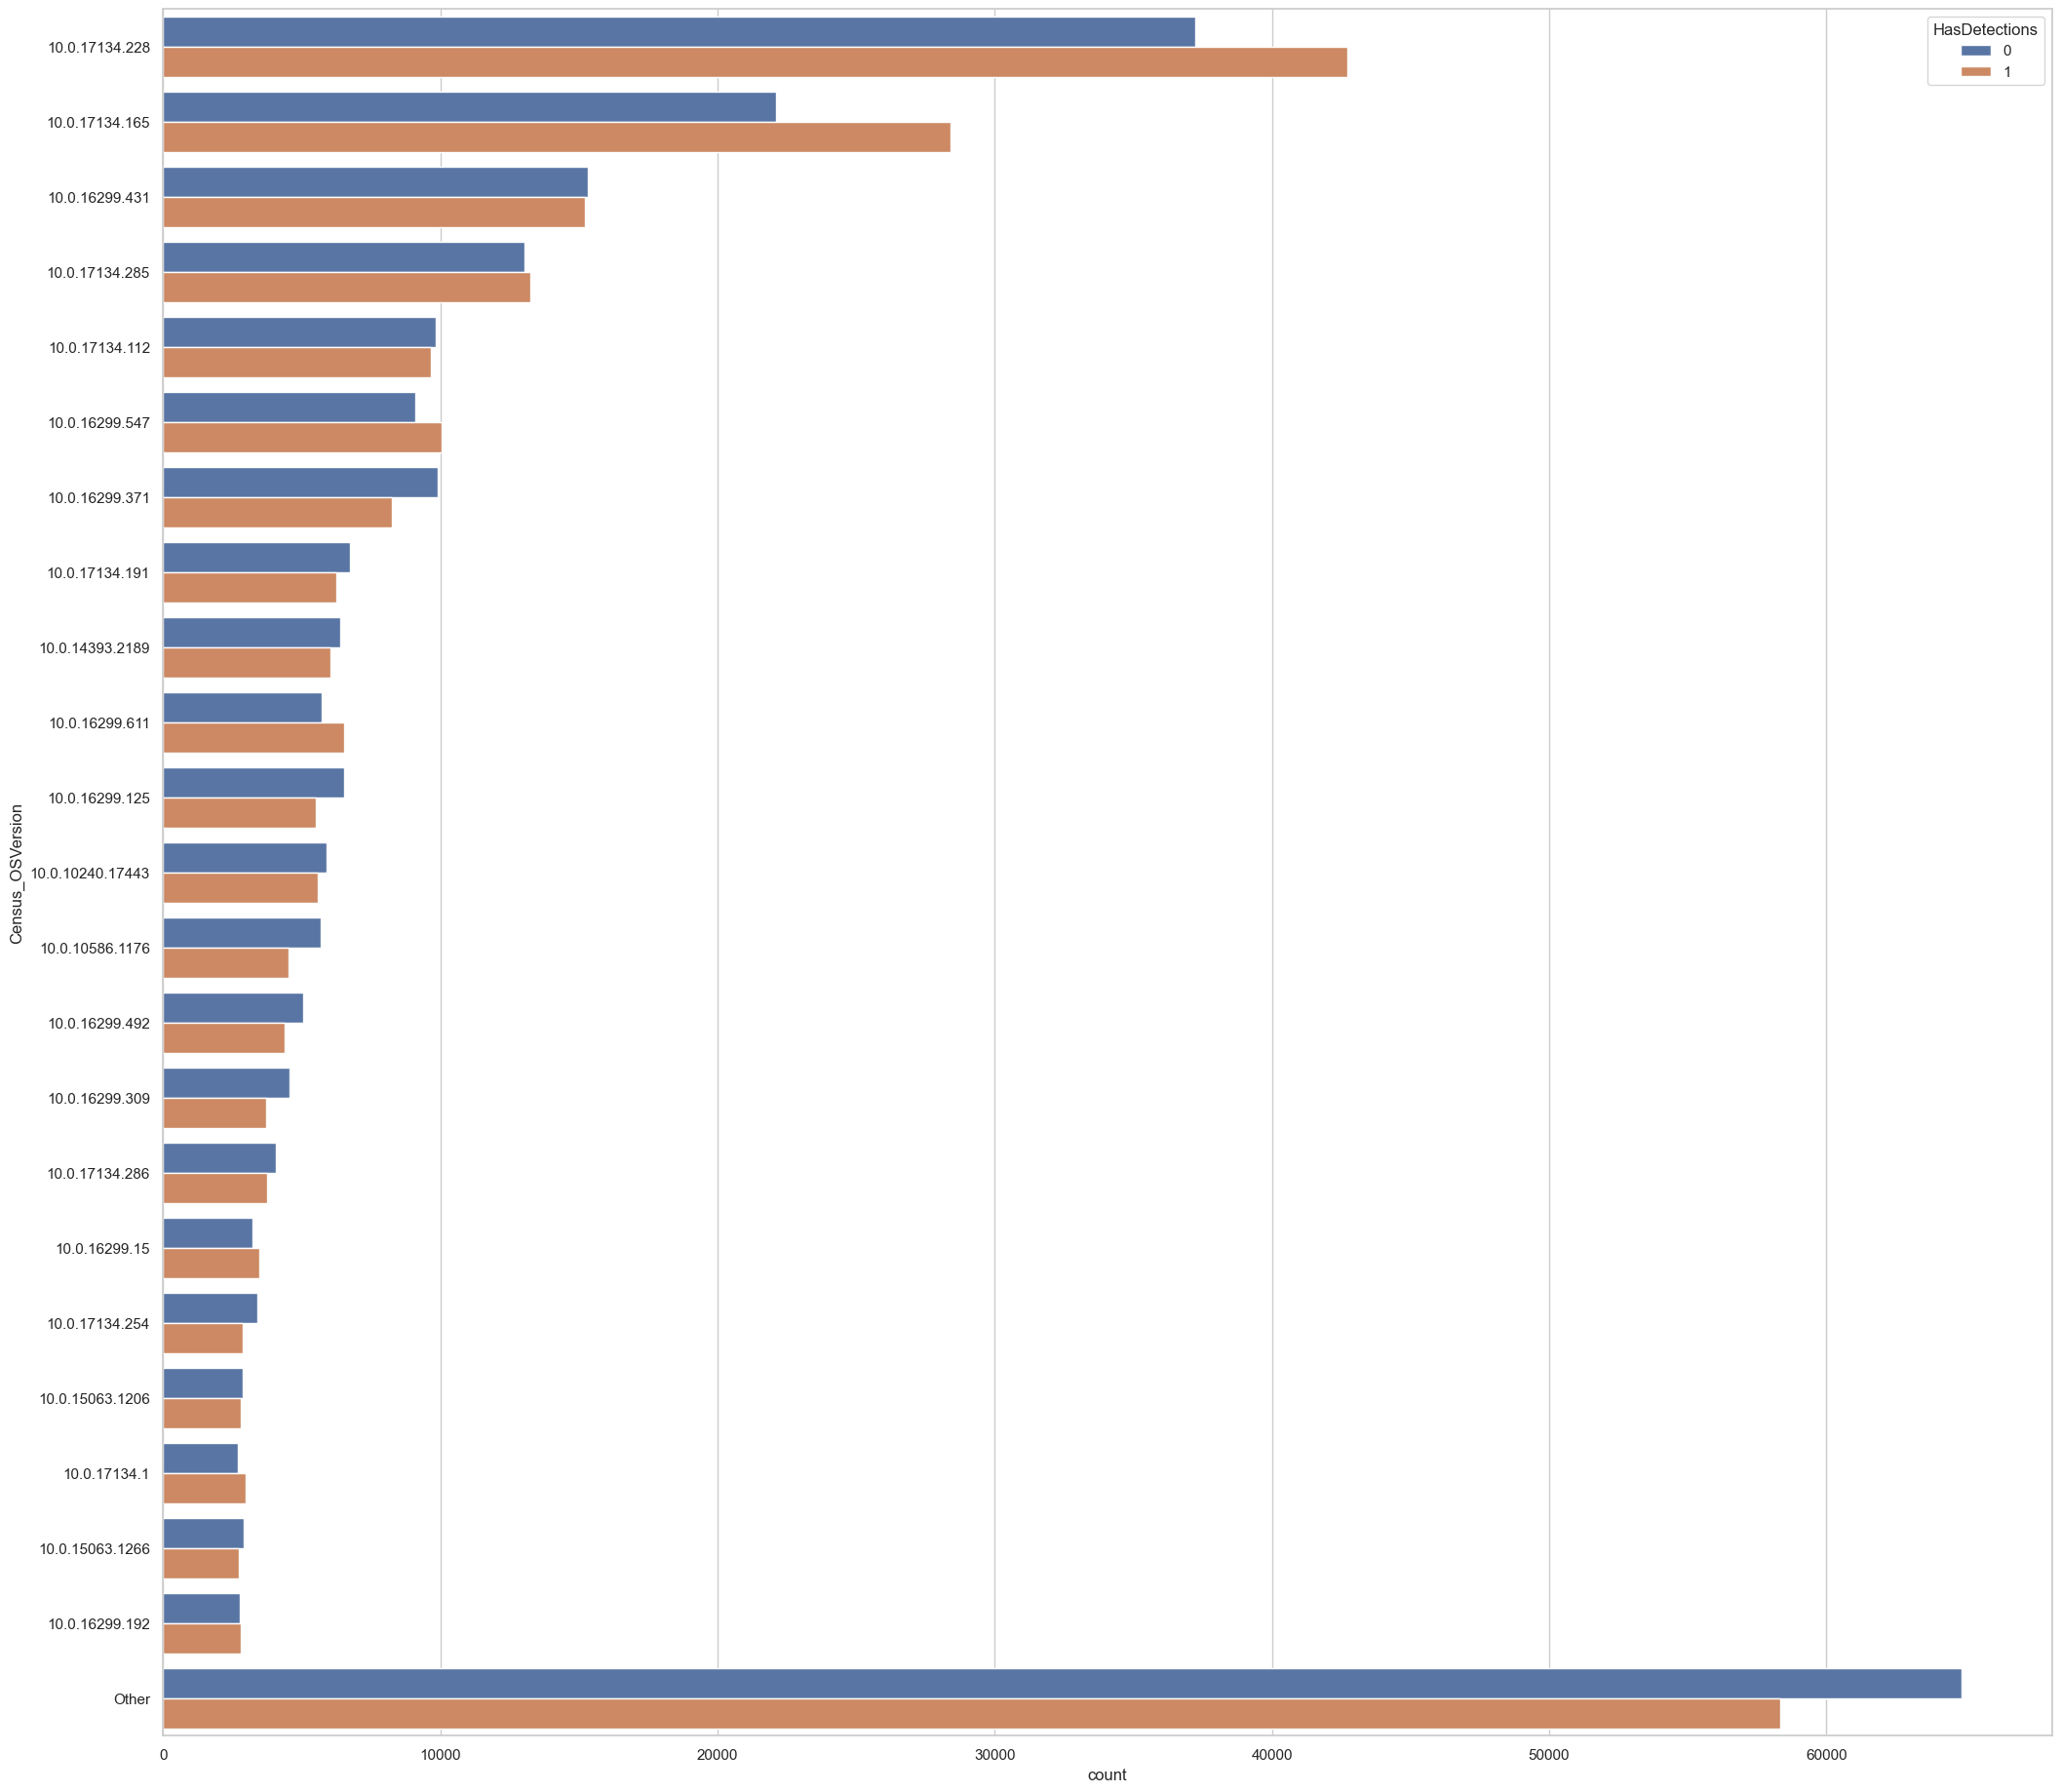

In [189]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_OSBranch

In [190]:
df5['Census_OSBranch'].value_counts(normalize=True)

rs4_release                 0.452
rs3_release                 0.138
rs3_release_svc_escrow      0.134
rs2_release                 0.089
rs1_release                 0.087
th2_release                 0.037
th2_release_sec             0.030
th1_st1                     0.022
th1                         0.009
rs5_release                 0.002
rs3_release_svc_escrow_im   0.001
rs_prerelease               0.000
rs_prerelease_flt           0.000
rs5_release_sigma           0.000
winblue_ltsb_escrow         0.000
Name: Census_OSBranch, dtype: float64

In [191]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_OSBranch'
agrupado='Other'

In [192]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
9
Total nulls:
0
Column info:
count          500000
unique              9
top       rs4_release
freq           226001
Name: Census_OSBranch, dtype: object


,Infections,Users,% Infections
Census_OSBranch,,,
rs4_release,118008,226001,52.216
rs3_release,32176,69216,46.486
rs3_release_svc_escrow,34572,67027,51.579
rs2_release,21230,44264,47.962
rs1_release,20322,43705,46.498
th2_release,9022,18298,49.306
th2_release_sec,6638,14895,44.565
th1_st1,5451,10822,50.370
Other,2534,5772,43.902


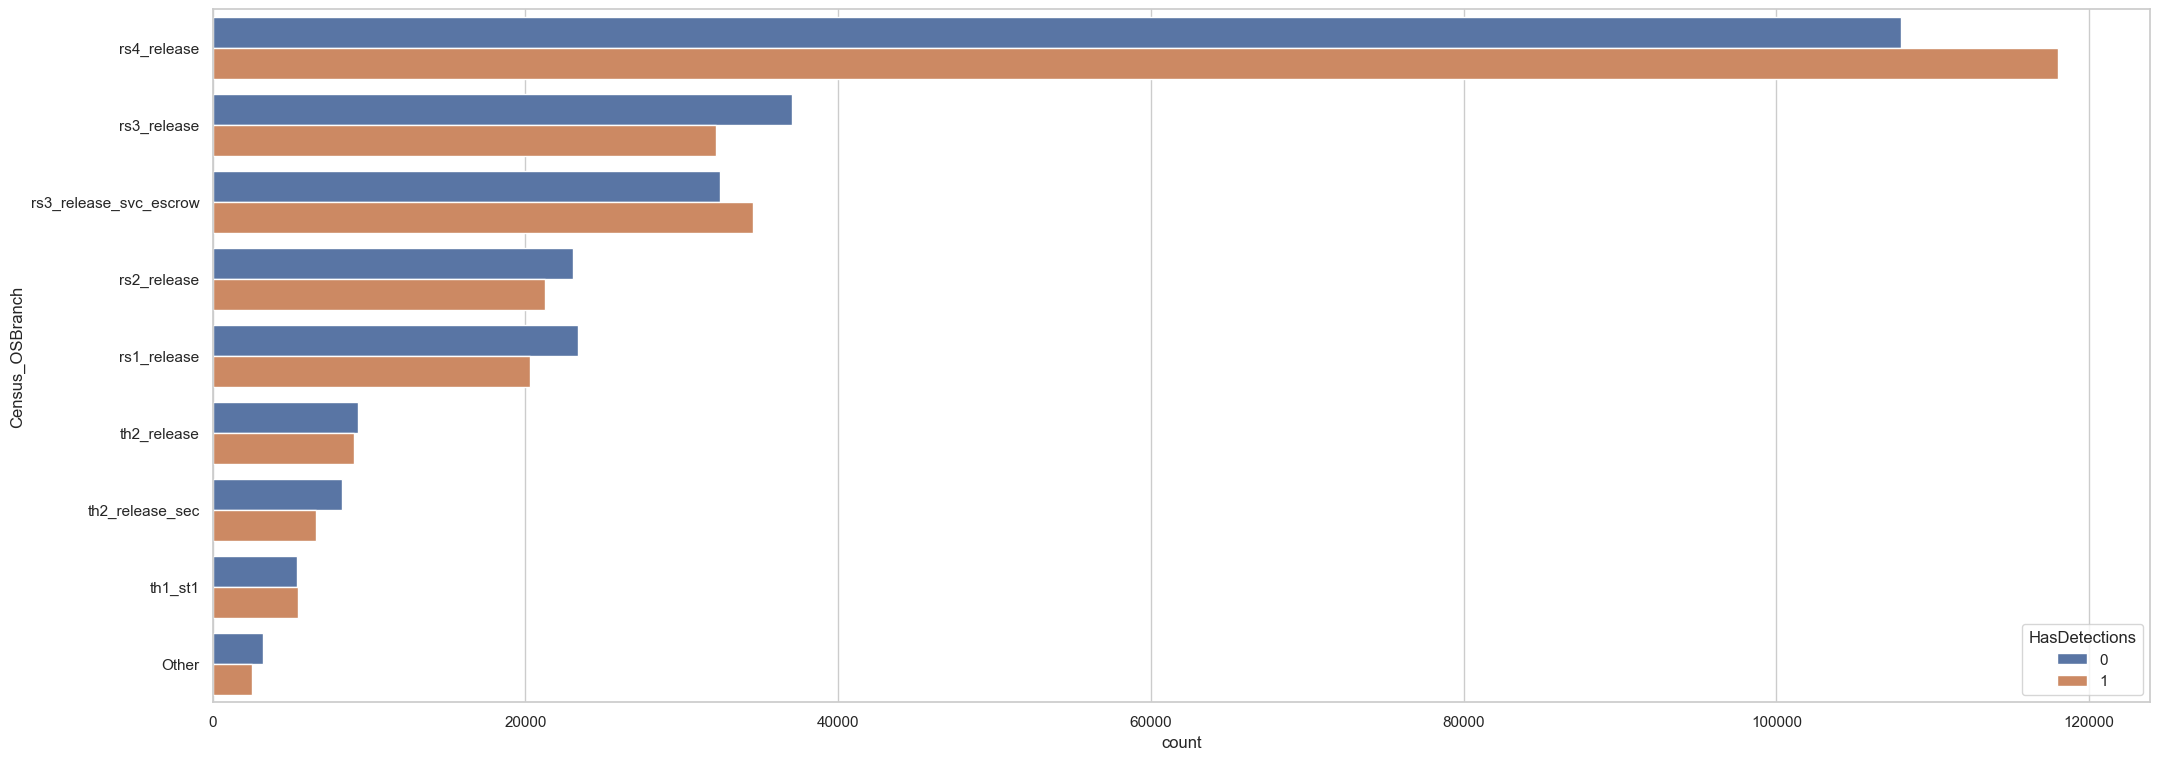

In [193]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_OSEdition

In [194]:
df5['Census_OSEdition'].value_counts(normalize=True)

Core                       0.389
Professional               0.352
CoreSingleLanguage         0.217
CoreCountrySpecific        0.019
ProfessionalEducation      0.006
Education                  0.005
Enterprise                 0.004
ProfessionalN              0.003
EnterpriseS                0.002
ServerStandard             0.001
Cloud                      0.001
CoreN                      0.001
ServerStandardEval         0.000
EducationN                 0.000
ServerDatacenterEval       0.000
EnterpriseSN               0.000
ServerSolution             0.000
EnterpriseN                0.000
ProfessionalEducationN     0.000
ProfessionalWorkstation    0.000
CloudN                     0.000
ProfessionalWorkstationN   0.000
Name: Census_OSEdition, dtype: float64

In [195]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_OSEdition'
agrupado='Other'

In [196]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
5
Total nulls:
0
Column info:
count     500000
unique         5
top         Core
freq      194469
Name: Census_OSEdition, dtype: object


,Infections,Users,% Infections
Census_OSEdition,,,
Core,91666,194469,47.137
Professional,89889,175808,51.129
CoreSingleLanguage,57588,108696,52.981
CoreCountrySpecific,4755,9275,51.267
Other,6055,11752,51.523


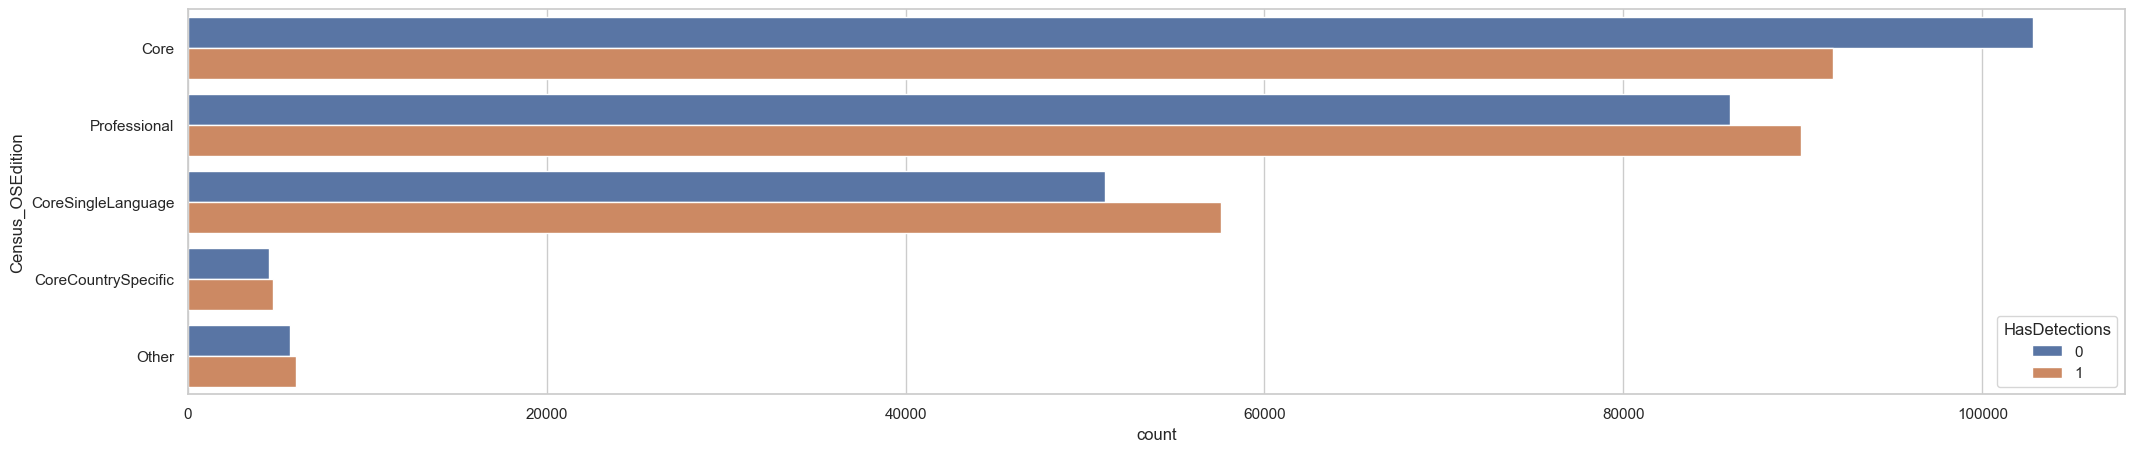

In [197]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

Leyendo la info del data engineer, Census_OSSkuName es una versión "friendly" de esta misma variable, así que drop

In [198]:
df5.drop('Census_OSSkuName', axis=1, inplace=True)

####Census_OSInstallTypeName

In [199]:
df5['Census_OSInstallTypeName'].value_counts(normalize=True)

UUPUpgrade       0.294
IBSClean         0.185
Update           0.178
Upgrade          0.140
Other            0.094
Reset            0.073
Refresh          0.023
Clean            0.008
CleanPCRefresh   0.006
Name: Census_OSInstallTypeName, dtype: float64

In [200]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_OSInstallTypeName'
agrupado='Others'

In [201]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
8
Total nulls:
0
Column info:
count         500000
unique             8
top       UUPUpgrade
freq          146780
Name: Census_OSInstallTypeName, dtype: object


,Infections,Users,% Infections
Census_OSInstallTypeName,,,
UUPUpgrade,77129,146780,52.547
IBSClean,48304,92403,52.275
Update,42499,88892,47.810
Upgrade,33254,70013,47.497
Other,22409,46960,47.719
Reset,17605,36510,48.220
Refresh,5326,11540,46.153
Others,3427,6902,49.652


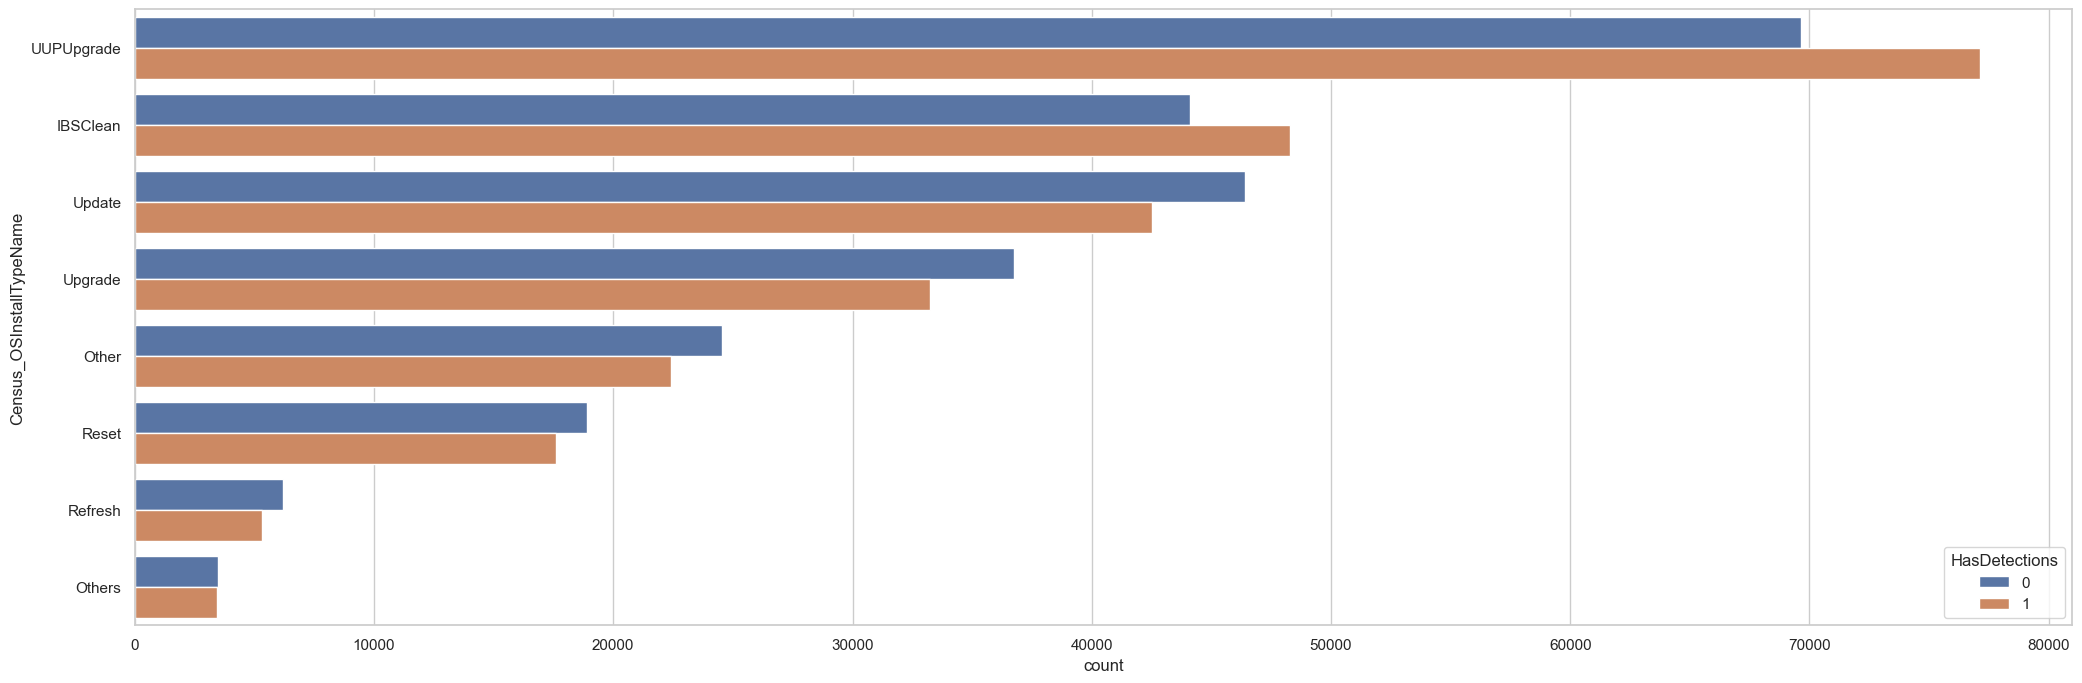

In [202]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_OSWUAutoUpdateOptionsName

In [203]:
df5['Census_OSWUAutoUpdateOptionsName'].value_counts(normalize=True)

FullAuto                                0.445
UNKNOWN                                 0.282
Notify                                  0.227
AutoInstallAndRebootAtMaintenanceTime   0.041
Off                                     0.003
DownloadNotify                          0.002
Name: Census_OSWUAutoUpdateOptionsName, dtype: float64

In [204]:
df5['Census_OSWUAutoUpdateOptionsName']= np.where(df5['Census_OSWUAutoUpdateOptionsName'] == 'UNKNOWN', 'Unknown',df5['Census_OSWUAutoUpdateOptionsName'])

In [205]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_OSWUAutoUpdateOptionsName'
agrupado='Other'

In [206]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
5
Total nulls:
0
Column info:
count       500000
unique           5
top       FullAuto
freq        222482
Name: Census_OSWUAutoUpdateOptionsName, dtype: object


,Infections,Users,% Infections
Census_OSWUAutoUpdateOptionsName,,,
FullAuto,114807,222482,51.603
Unknown,70190,140961,49.794
Notify,53867,113507,47.457
AutoInstallAndRebootAtMaintenanceTime,10056,20731,48.507
Other,1033,2319,44.545


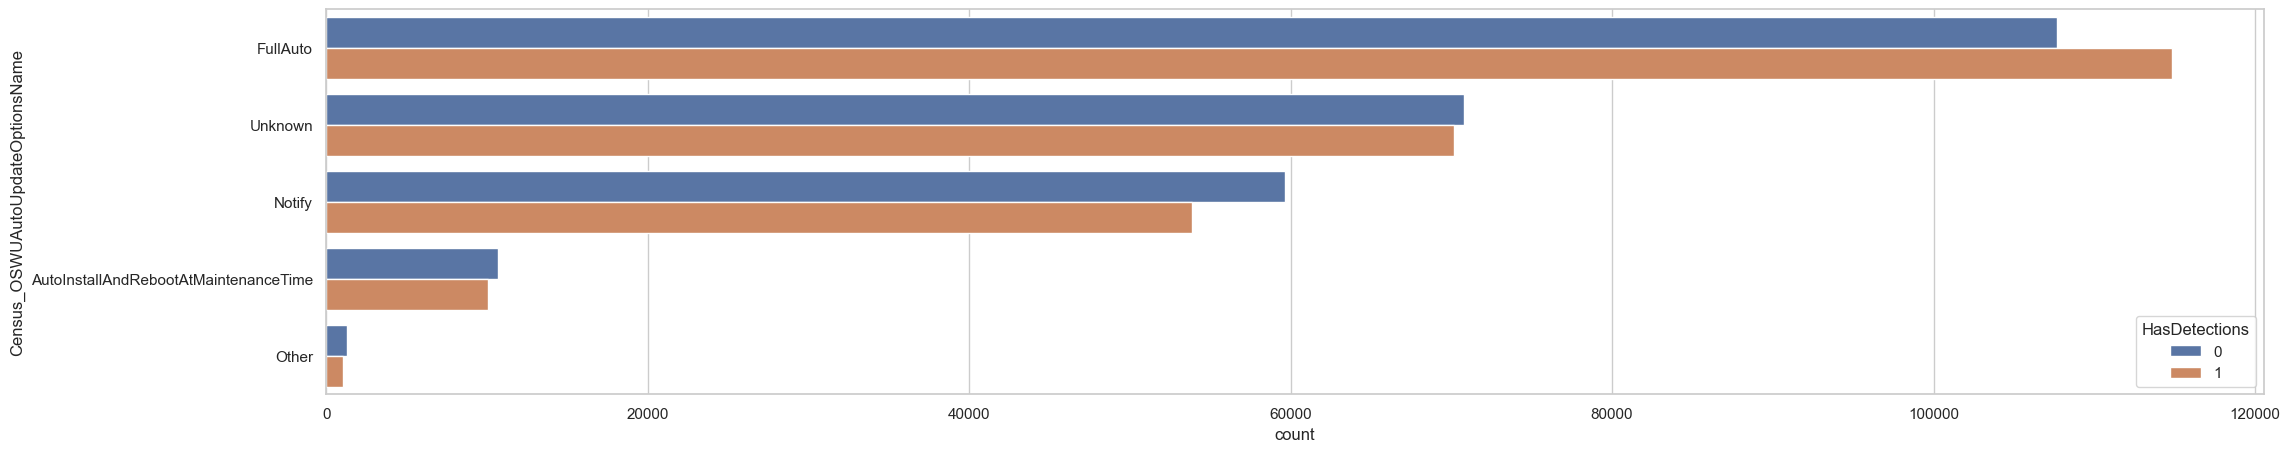

In [207]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_GenuineStateName

In [208]:
df5['Census_GenuineStateName'].value_counts(normalize=True)

IS_GENUINE        0.883
INVALID_LICENSE   0.090
OFFLINE           0.026
UNKNOWN           0.002
Name: Census_GenuineStateName, dtype: float64

In [209]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_GenuineStateName'
agrupado='Other'

,Infections,Users,% Infections
Census_GenuineStateName,,,
INVALID_LICENSE,22236,44990,49.424
IS_GENUINE,220477,441402,49.949
OFFLINE,6994,12834,54.496
UNKNOWN,246,774,31.783


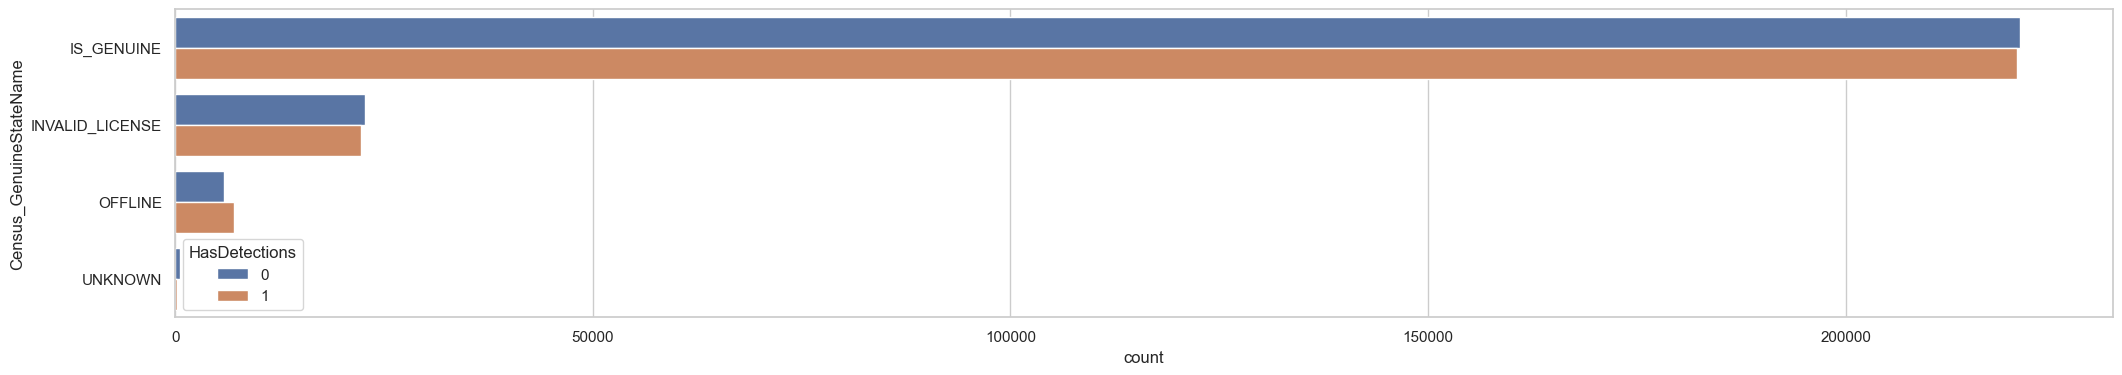

In [210]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Census_ActivationChannel

In [211]:
df5['Census_ActivationChannel'].value_counts(normalize=True)

Retail           0.530
OEM:DM           0.383
Volume:GVLK      0.050
OEM:NONSLP       0.036
Volume:MAK       0.001
Retail:TB:Eval   0.000
Name: Census_ActivationChannel, dtype: float64

In [212]:
#darle a V el valor de la variable que estamos trabajando
#darle a agrupado la etiqueta que queremos para los valores agrupados
V='Census_ActivationChannel'
agrupado='Other'

In [213]:
min_inc=(df5[V].value_counts(normalize=True) > min_perc ).sum()

setGrouped(df5, V, min_inc,agrupado)

explore_columns(df5,V)

Value_counts:
500000
Unique elements:
5
Total nulls:
0
Column info:
count     500000
unique         5
top       Retail
freq      264932
Name: Census_ActivationChannel, dtype: object


,Infections,Users,% Infections
Census_ActivationChannel,,,
Retail,130532,264932,49.270
OEM:DM,94880,191350,49.585
Volume:GVLK,14963,25109,59.592
OEM:NONSLP,9314,17943,51.909
Other,264,666,39.640


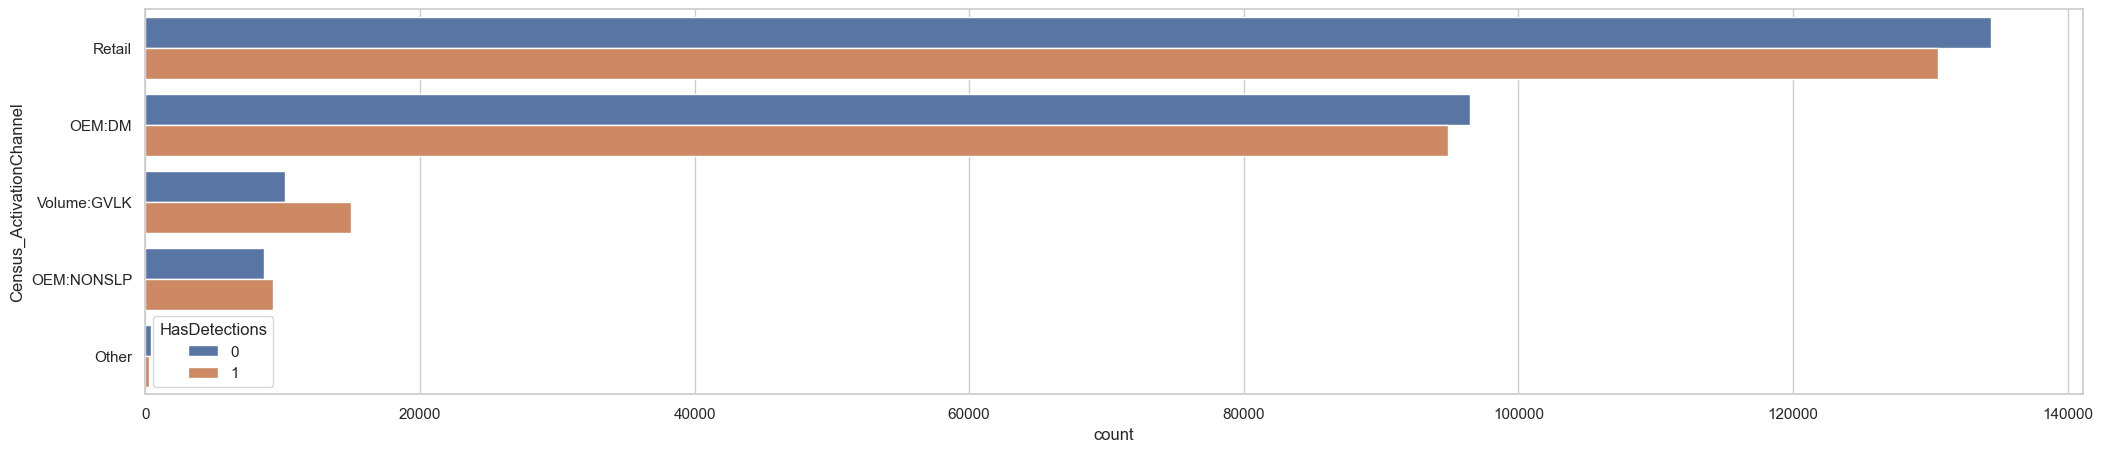

In [214]:
plot(df5, V, TARGET)
analisis(df5, V, TARGET)

####Fin de la preparación de categóricas

####Comprobaciones finales

In [215]:
df5.isnull().sum()

EngineVersion                       0
AppVersion                          0
AvSigVersion                        0
AVProductStatesIdentifier           0
CountryIdentifier                   0
OrganizationIdentifier              0
GeoNameIdentifier                   0
LocaleEnglishNameIdentifier         0
OsBuild                             0
OsSuite                             0
OsPlatformSubRelease                0
OsBuildLab                          0
SkuEdition                          0
SmartScreen                         0
Census_MDC2FormFactor               0
Census_ProcessorCoreCount           0
Census_PrimaryDiskTotalCapacity     0
Census_PrimaryDiskTypeName          0
Census_SystemVolumeTotalCapacity    0
Census_TotalPhysicalRAM             0
Census_ChassisTypeName              0
Census_PowerPlatformRoleName        0
Census_OSVersion                    0
Census_OSBranch                     0
Census_OSBuildNumber                0
Census_OSBuildRevision              0
Census_OSEdi

In [216]:
df_final=df5.copy()

In [217]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   EngineVersion                     500000 non-null  category
 1   AppVersion                        500000 non-null  category
 2   AvSigVersion                      500000 non-null  category
 3   AVProductStatesIdentifier         500000 non-null  category
 4   CountryIdentifier                 500000 non-null  category
 5   OrganizationIdentifier            500000 non-null  category
 6   GeoNameIdentifier                 500000 non-null  category
 7   LocaleEnglishNameIdentifier       500000 non-null  category
 8   OsBuild                           500000 non-null  int64   
 9   OsSuite                           500000 non-null  int64   
 10  OsPlatformSubRelease              500000 non-null  object  
 11  OsBuildLab                        50000

####Listo para OHE

In [218]:
df_final.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 35 entries, EngineVersion to HasDetections
dtypes: category(20), float64(5), int64(7), object(3)
memory usage: 66.8+ MB


In [219]:
df_final.describe(exclude=np.number).T

,count,unique,top,freq
EngineVersion,500000,9,1.1.15200.1,216491
AppVersion,500000,14,4.18.1807.18075,288809
AvSigVersion,500000,5,Other,478161
AVProductStatesIdentifier,500000.000,9.000,53447.000,326463.000
CountryIdentifier,500000,32,Other,179435
OrganizationIdentifier,500000.000,4.000,27.000,234885.000
GeoNameIdentifier,500000,28,Other,123382
LocaleEnglishNameIdentifier,500000,25,75,117818
OsPlatformSubRelease,500000,9,rs4,220779
OsBuildLab,500000,10,17134.1.amd64fre.rs4_release.180410-1804,206436


In [220]:
def OHE(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

In [221]:
#for column in df_finalv2.select_dtypes(exclude=np.number).columns:
#    df_finalv2 = OHE(df_finalv2, column)

In [222]:
df_final.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 35 entries, EngineVersion to HasDetections
dtypes: category(20), float64(5), int64(7), object(3)
memory usage: 66.8+ MB


In [223]:
pd.options.display.max_columns = 100


In [224]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   EngineVersion                     500000 non-null  category
 1   AppVersion                        500000 non-null  category
 2   AvSigVersion                      500000 non-null  category
 3   AVProductStatesIdentifier         500000 non-null  category
 4   CountryIdentifier                 500000 non-null  category
 5   OrganizationIdentifier            500000 non-null  category
 6   GeoNameIdentifier                 500000 non-null  category
 7   LocaleEnglishNameIdentifier       500000 non-null  category
 8   OsBuild                           500000 non-null  int64   
 9   OsSuite                           500000 non-null  int64   
 10  OsPlatformSubRelease              500000 non-null  object  
 11  OsBuildLab                        50000

In [225]:
df_final=df5.copy()

In [226]:
df_finalv2 = df_final.copy()

In [227]:
to_drop = ["CountryIdentifier","OrganizationIdentifier","GeoNameIdentifier","LocaleEnglishNameIdentifier","OsBuildLab","Census_PrimaryDiskTotalCapacity","Census_SystemVolumeTotalCapacity","Census_OSVersion","Census_OSBranch","Census_OSEdition"]

#df = df.drop('column_name', axis=1)

In [228]:
df_finalv2.drop(to_drop, axis=1,inplace=True)

In [229]:
for column in df_finalv2.select_dtypes(exclude=np.number).columns:
    df_finalv2 = OHE(df_finalv2, column)

In [230]:
df_finalv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 107 entries, OsBuild to Census_ActivationChannel_Other
dtypes: float64(3), int64(7), uint8(97)
memory usage: 84.4 MB


##MODELLING

In [231]:
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

In [232]:
#model_selection??

###DIVIDIR EN TRAIN / TEST / VAL

No tenemos una referencia temporal, las entradas están mezcladas pero para más seguridad haremos un sample() 

In [233]:
df_finalv2=df_finalv2.sample(frac=1)

Dividiremos el dataset al 80% - 20% 

In [234]:
dev_df = df_finalv2.head(400000) # development = train + test
val_df = df_finalv2.head(100000) # validation

In [235]:
dev_df.shape

(400000, 107)

In [236]:
val_df.shape

(100000, 107)

Creamos los valores X e Y para el desarrollo

In [237]:
dev_df_X = dev_df.drop(TARGET, axis=1)
dev_df_y = dev_df[[TARGET]]

In [238]:
dev_df_X.head().T

,304695,347963,487965,25290,187446
OsBuild,17134.000,10586.000,17134.000,17134.000,17134.000
OsSuite,256.000,256.000,256.000,768.000,768.000
Census_ProcessorCoreCount,8.000,4.000,12.000,4.000,4.000
Census_TotalPhysicalRAM,16384.000,4096.000,32768.000,8192.000,4096.000
Census_OSBuildNumber,17134.000,10586.000,17134.000,17134.000,17134.000
...,...,...,...,...,...
Census_ActivationChannel_Retail,1.000,0.000,0.000,0.000,1.000
Census_ActivationChannel_OEM:DM,0.000,0.000,1.000,1.000,0.000
Census_ActivationChannel_Volume:GVLK,0.000,1.000,0.000,0.000,0.000
Census_ActivationChannel_OEM:NONSLP,0.000,0.000,0.000,0.000,0.000


In [239]:
dev_df_y.head().T

,304695,347963,487965,25290,187446
HasDetections,1,0,0,0,1


Creamos los valores X e Y para validación

In [240]:
val_df_X = val_df.drop(TARGET, axis=1)
val_df_y = val_df[[TARGET]]

####Random holdout

In [336]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [337]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280000 entries, 210263 to 303635
Columns: 106 entries, OsBuild to Census_ActivationChannel_Other
dtypes: float64(3), int64(6), uint8(97)
memory usage: 47.3 MB


In [330]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 137301 to 162238
Columns: 106 entries, OsBuild to Census_ActivationChannel_Other
dtypes: float64(3), int64(6), uint8(97)
memory usage: 16.9 MB


In [244]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
OsBuild,280000.000,15728.954,2185.063,7600.000,15063.000,16299.000,17134.000,18242.000
OsSuite,280000.000,574.673,248.214,16.000,256.000,768.000,768.000,784.000
Census_ProcessorCoreCount,280000.000,4.281,4.631,1.000,2.000,4.000,4.000,80.000
Census_TotalPhysicalRAM,280000.000,9693.430,37628.908,512.000,4096.000,4096.000,8192.000,400000.000
Census_OSBuildNumber,280000.000,15842.528,1957.915,9600.000,15063.000,16299.000,17134.000,18242.000


In [245]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
OsBuild,120000.000,15730.313,2184.296,7600.000,15063.000,16299.000,17134.000,18242.000
OsSuite,120000.000,574.617,248.230,16.000,256.000,768.000,768.000,784.000
Census_ProcessorCoreCount,120000.000,4.277,4.677,1.000,2.000,4.000,4.000,88.000
Census_TotalPhysicalRAM,120000.000,9620.858,37211.630,768.000,4096.000,4096.000,8192.000,400000.000
Census_OSBuildNumber,120000.000,15843.457,1957.520,10240.000,15063.000,16299.000,17134.000,18242.000


In [246]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
HasDetections,280000.000,0.500,0.500,0.000,0.000,1.000,1.000,1.000


In [247]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
HasDetections,120000.000,0.499,0.500,0.000,0.000,0.000,1.000,1.000


###DEFINICION

In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

In [249]:
#DecisionTreeClassifier?

In [250]:
dt = (
                        # criterion='gini',
                        # splitter='best',
                        max_depth=16, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3473202488.py, line 4)

In [ ]:
#dt.fit?

In [ ]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=16, random_state=42)

###VISUALIZACIÓN

In [ ]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['No infect', 'Infect'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

In [ ]:
import pydotplus
graph2 = pydotplus.graph_from_dot_data(dot_data)  

In [ ]:
graph2.write_png("tree.png")

In [ ]:
graphviz.Source(dot_data, format = 'png')

###EVALUACIÓN

In [ ]:
dt.score(X_test, y_test)

0.6172333333333333

###PRUEBA A MAS PROFUNDIDAD

In [345]:
#n_estimators= 100, max_features= 2,  n_jobs= 2, verbose= True, min_samples_split= 2, random_state= 42,n_estimators=100,
clf = RandomForestClassifier(criterion='gini',
                          max_depth=20,
                           min_samples_split=4,
                            min_samples_leaf=3,
                             min_weight_fraction_leaf=0.0,
                              max_features='sqrt', 
                              max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, 
                              bootstrap=False, 
                              oob_score=False, 
                              n_jobs=None, 
                              random_state=None, 
                              verbose=0, 
                              warm_start=False, 
                              class_weight=None, 
                              ccp_alpha=0.0, 
                              max_samples=None
                        )

In [351]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, n_features=8,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf.fit(X=X_train, 
    y=y_train,)

K:\TEMP\ipykernel_5948\3817966390.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X=X_train,


RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=3,
                       min_samples_split=4)

In [ ]:
#dt.fit(
 #   X=X_train, 
  #  y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

In [ ]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['No infect', 'Infect'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

In [352]:
clf.score(X_test, y_test)

0.6386083333333333

In [ ]:
0.6376583333333333

In [ ]:
0.6383583333333334
0.638291
0.63848
0.6386